<table class="table table-bordered"><a id= "Start"></a>
<tr>
<th style="text-align:center; vertical-align: middle; width:50%"><img src='https://www.np.edu.sg/images/default-source/default-album/img-logo.png'"></th>
        <th style="text-align:center;"><h1>Distributed Data Pipelines</h1><h2>Assignment 1 </h2><h3>Diploma in Data Science</h3></th>
    </tr>
</table>

Learning Objectives:
- Design PySpark Based Machine Learning
- Execute PySpark Syntax Correctly
- Evaluate and Select Final Model based on Metrics

You will be **graded on the use of PySpark**, so usage of **Pandas itself should be avoided as much as possible**, especially if a particular native method or function is already available in PySpark. **Penalties will be imposed in such cases.**

# Table of Contents

### 1. [Problem Statement Formulation](#part1)

#### 1.1 [Loading Data](#part1.1)

#### 1.2 [Exploring the Data](#part1.2)

#### 1.3 [Value Based Problem Statement Creation](#part1.3)

#### 1.4 [Report for Problem Statement Formulation](#part1.4)

#### 1.4 [Report for Problem Statement Formulation](#part1.4)

### 2. [Exploratory Data Analysis and Data Cleansing](#part2)

#### 2.1 [Functions for data exploration, data cleaning, and transformation](#part2.1)

#### 2.2 [Data Exploration & Cleansing of property_id (Unique ID)](#part2.2)

#### 2.3 [Data Exploration & Cleansing of currency (Categorical)](#part2.3)

#### 2.4 [Data Exploration & Cleansing of property_type (Categorical)](#part2.4)

#### 2.5 [Data Exploration & Cleansing of sub_property_type (Categorical)](#part2.5)

#### 2.6 [Data Exploration & Cleansing of state (Categorical)](#part2.6)

#### 2.7 [Data Exploration & Cleansing of city (Categorical)](#part2.7)

#### 2.8 [Data Exploration & Cleansing of listing_label (Categorical)](#part2.8)

#### 2.9 [Data Exploration & Cleansing of tenure (Categorical)](#part2.9)

#### 2.10 [Data Exploration & Cleansing of address (Categorical)](#part2.10)

#### 2.11 [Data Exploration & Cleansing of bedroom_number (Discrete Numerical)](#part2.11)

#### 2.12 [Data Exploration & Cleansing of bathroom_number (Discrete Numerical)](#part2.12)

#### 2.13 [Data Exploration & Cleansing of built_year (Discrete Numerical)](#part2.13)

#### 2.14 [Data Exploration & Cleansing of premium (Discrete Numerical)](#part2.14)

#### 2.15 [Data Exploration & Cleansing of living_space (Continuous Numerical)](#part2.15)

#### 2.16 [Data Exploration & Cleansing of floor level (Continuous Numerical)](#part2.16)

#### 2.17 [Data Exploration & Cleansing of latitude (Continuous Numerical)](#part2.17)

#### 2.18 [Data Exploration & Cleansing of longitude (Continuous Numerical)](#part2.18)

#### 2.19 [Data Exploration & Cleansing of price (Continuous Numerical)](#part2.19)

#### 2.20 [Report on Exploratory Data Analysis & Data Cleaning](#part2.20)


### 3. [Data Wrangling and Transformation](#part3)

#### 3.1 [Categorical Encoding](#part3.1)

#### 3.2 [Numerical Transformation](#part3.2)

##### 3.2.1 [living_space Transformation](#part3.2.1)

##### 3.2.2 [floor_level Transformation](#part3.2.2)

##### 3.2.3 [Applying the best transformations to the main dataframe](#part3.2.3)

#### 3.3 [Outlier Handling](#part3.3)

#### 3.4 [Report on Data Transformation](#part3.4)


### 4. [Machine Learning Modelling](#part4)

#### 4.1 [Train-Test Split / Scaling / Polynomial Expansion](#part4.1)

#### 4.2 [Tidying Up & Check](#part4.2)

#### 4.3 [Report on Machine Learning Modelling](#part4.3)


### 5. [Model Evaluation and Selection](#part5)

#### 5.1 [Applying Simple Linear Regression Predictive Algorithm Model](#part5.1)

#### 5.2 [Applying Random Forest Predictive Algorithm Model](#part5.2)

#### 5.3 [Predictions](#part5.3)

#### 5.4 [Metrics](#part5.4)

#### 5.5 [Final Model](#part5.5)

#### 5.6 [Report on Model Evaluation & Selection](#part5.6)


### 6. [Summary/ Further Improvements/ Reflection](#part6)



In [1]:
# import the packages
from pyspark.sql import SparkSession
spark = SparkSession.builder.getOrCreate()

from datetime import datetime, date
from pyspark.sql import Row
from pyspark.sql.functions import col, mean, expr
from pyspark.sql.functions import log
from pyspark.sql.window import Window
from pyspark.sql import functions as F
import numpy as np


import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.core.display import HTML
display(HTML("<style>pre { white-space: pre !important; }</style>"))


from pyspark.ml import Pipeline
from pyspark.ml.feature import OneHotEncoder, StringIndexer

# More packages imported later on

### Step 1: Problem Statement Formulation<a id="part1"></a>

[Go to Start](#Start)

#### 1.1 Loading Data<a id="part1.1"></a>

[Go to Start](#Start)

In [2]:
# Load data, inferSchema auto detects data type
ppty_df=spark.read.csv('./data/thailand_ppty_asg1.csv', header=True, inferSchema=True)

#### 1.2 Exploring the Data<a id="part1.2"></a>

[Go to Start](#Start)

In [3]:
# Display first 5 rows of dataframe
spark.conf.set('spark.sql.repl.eagerEval.enabled', True) # used to view the data more clearly
ppty_df.limit(5)

property_id,living_space,bathroom_number,currency,property_type,sub_property_type,city,floor_level,state,built_year,latitude,longitude,bedroom_number,address,listing_label,premium,tenure,price
9942777,76.86,2,Baht,Condo,For Sale,Dusit,6,Bangkok,2010,13.79101869,100.5162452,2,"Samsen Road, Dusi...",NORMAL,0,Freehold,5500000
9807686,42.0,1,Baht,Condo,For Sale,Dusit,4,Bangkok,2010,13.79101869,100.5162452,1,"Samsen Road, Dusi...",NORMAL,0,Freehold,4100000
8934387,123.0,2,Baht,Detached House,For Sale,Nong Chok,2,Bangkok,2012,13.85948084,100.8482369,3,"Mit Maitri Road, ...",CORPORATE,0,Freehold,1650000
9836450,180.0,2,Baht,Detached House,For Sale,Nong Chok,2,Bangkok,2011,13.859683,100.857774,4,"Soi Mitmaitri 2, ...",NORMAL,0,Freehold,3650000
9407447,35.35,1,Baht,Condo,For Sale,Bang Rak,56,Bangkok,2018,13.73158352,100.5311729,1,"- Rama 4 Road, Si...",CORPORATE,0,Freehold,7850000


In [4]:
# Checking number of rows and columns
num_rows = ppty_df.count()
num_cols = len(ppty_df.columns)

# Display the shape
print(f"Number of rows: {num_rows}, Number of columns: {num_cols}")

Number of rows: 41360, Number of columns: 18


In [5]:
# Checking that data type of the columns are correct and presence of null values
ppty_df.printSchema()

root
 |-- property_id: integer (nullable = true)
 |-- living_space: double (nullable = true)
 |-- bathroom_number: integer (nullable = true)
 |-- currency: string (nullable = true)
 |-- property_type: string (nullable = true)
 |-- sub_property_type: string (nullable = true)
 |-- city: string (nullable = true)
 |-- floor_level: integer (nullable = true)
 |-- state: string (nullable = true)
 |-- built_year: integer (nullable = true)
 |-- latitude: double (nullable = true)
 |-- longitude: double (nullable = true)
 |-- bedroom_number: integer (nullable = true)
 |-- address: string (nullable = true)
 |-- listing_label: string (nullable = true)
 |-- premium: integer (nullable = true)
 |-- tenure: string (nullable = true)
 |-- price: integer (nullable = true)



In [6]:
# Checking summary of the columns to have a better understanding of the distribution of values
spark.conf.set('spark.sql.repl.eagerEval.enabled', True) # used to view the data more clearly
ppty_df.summary()

summary,property_id,living_space,bathroom_number,currency,property_type,sub_property_type,city,floor_level,state,built_year,latitude,longitude,bedroom_number,address,listing_label,premium,tenure,price
count,41360,41310,41360,41360,41360,41360,41360,41360,41360,41360,41360,41360,41360,41360,41360,41360,41360,41360
mean,9092960.425676983,131.2979258121521,1.2972678916827853,null,null,null,null,15504.037693423597,null,2014.3418036750484,13.754093207736465,100.5558954954391,1.2618471953578336,null,null,0.014192456479690523,null,6610496.336532882
stddev,1031147.7535168171,6444.044353131916,0.6902640101287385,null,null,null,null,3089664.398453431,null,4.0109587829731295,0.5574710897678714,0.2021853503546363,0.7700069673785545,null,null,0.11828511715924905,null,1.511423482610068E7
min,567195,16.0,0,Baht,Apartment,For Sale,Ban Bung,0,Bangkok,1985,6.028047,98.280468,0,#NAME?,CORPORATE,0,30-year Leasehold,0
25%,8510809,30.0,1,null,null,null,null,6,null,2012,13.712022,100.533843,1,null,null,0,null,2200000
50%,9506154,35.0,1,null,null,null,null,12,null,2014,13.73668627,100.571465,1,null,null,0,null,3600000
75%,9862199,54.0,1,null,null,null,null,26,null,2017,13.78071075,100.6012631,2,null,null,0,null,6500000
max,10081313,989898.0,9,Baht,Townhouse,Option To Buy,Yan Nawa,628266569,Surat Thani,2025,19.8936283,104.717648,11,"แพรกษา, Phraeksa,...",OWNER,1,Leasehold,1396396324


In [7]:
from pyspark.sql.functions import col

# Checking cardinality of columns
for col_name in ppty_df.columns:
    distinct_count = ppty_df.select(col_name).distinct().count()
    print(f"{col_name}: {distinct_count}")

property_id: 41338
living_space: 3029
bathroom_number: 10
currency: 1
property_type: 4
sub_property_type: 2
city: 89
floor_level: 220
state: 17
built_year: 38
latitude: 1961
longitude: 1956
bedroom_number: 12
address: 1686
listing_label: 3
premium: 2
tenure: 3
price: 3199


In [8]:
from pyspark.sql.functions import col, count, desc

# List of column names
columns_to_check = ppty_df.columns

# Find the mode for each column
modes = []
for column_name in columns_to_check:
    mode_value = ppty_df.groupBy(column_name).agg(count("*").alias("count")).orderBy(desc("count")).limit(1).collect()[0][column_name]
    modes.append((column_name, mode_value))

# Display the modes
for column_name, mode_value in modes:
    print(f"Mode for '{column_name}': {mode_value}")

Mode for 'property_id': 10004420
Mode for 'living_space': 30.0
Mode for 'bathroom_number': 1
Mode for 'currency': Baht
Mode for 'property_type': Condo
Mode for 'sub_property_type': For Sale
Mode for 'city': Huai Khwang
Mode for 'floor_level': 2
Mode for 'state': Bangkok
Mode for 'built_year': 2014
Mode for 'latitude': 13.75685419
Mode for 'longitude': 100.5603342
Mode for 'bedroom_number': 1
Mode for 'address': #NAME?
Mode for 'listing_label': CORPORATE
Mode for 'premium': 0
Mode for 'tenure': Freehold
Mode for 'price': 3200000


#### 1.3 Value Based Problem Statement Creation<a id="part1.3"></a>

[Go to Start](#Start)

In [9]:
# Display summary statistics for the "price" column
ppty_df.select("price").summary().show()

+-------+-------------------+
|summary|              price|
+-------+-------------------+
|  count|              41360|
|   mean|  6610496.336532882|
| stddev|1.511423482610068E7|
|    min|                  0|
|    25%|            2200000|
|    50%|            3600000|
|    75%|            6500000|
|    max|         1396396324|
+-------+-------------------+



- Count: There are 41,360 records in the dataset.

- Mean: The mean (average) price is approximately 6,610,496.34 Baht.

- Standard Deviation: The standard deviation is relatively high, indicating a wide range of prices.

- Minimum: The minimum price is 0 Baht, which might indicate missing or invalid values.

- 25th Percentile (Q1): 25% of the prices are below 2,200,000 Baht.

- 50th Percentile (Median): The median price is 3,600,000 Baht.

- 75th Percentile (Q3): 75% of the prices are below 6,500,000 Baht.

- Maximum: The maximum price is very high at 1,396,396,324 Baht.

#### 1.4 Report for Problem Statement  Formulation<a id="part1.4"></a>

[Go to Start](#Start)

<u>Objective<u>
    
This project endeavors to harness the power of PySpark to develop a predictive model for Thailand property prices, 
utilizing the dataset "thailand_ppty_asg1.csv". I kickstarted this project by briefly exploring the data to gain a 
foundational understanding of the dataset and have a better understanding of the problem statement I should create. 
A well-defined problem statement sets the direction and boundaries for your machine learning project, ensuring 
focused efforts and maximizing success.

<u>Preliminary Data Exploration<u>
    
As part of the preliminary data exploration, I took a look at the first 5 rows of the columns, re-checked the data types 
of the columns to make sure they were representative of the values in them, the cardinality, mode of the columns and the 
summary of the columns to have a better understanding of the distributions of the numerical variables.

Then, I understood the columns that were more useful for predicting price and created a problem statement. 

<u>Problem Statement<u>
    
Problem Statement: Build a price prediction model that helps property investors identify properties with a high likelihood of achieving a higher sale price and target lucrative opportunities in the real estate market. With the model, investors can make more informed decisions and have higher chances for positive returns.


[Go to Start](#Start)

### Step 2: Exploratory Data Analysis and Data Cleansing<a id="part2"></a>

[Go to Start](#Start)

#### 2.1 Functions for data exploration, data cleaning and transformation<a id="part2.1"></a>

[Go to Start](#Start)

In [10]:
# Function to display data type, cardinality and number of null values of specified column
def analyze_column(df, column_name):
    # Data type
    data_type = df.schema[column_name].dataType

    # Cardinality
    cardinality = df.select(column_name).distinct().count()

    # Number of null values
    null_count = df.filter(col(column_name).isNull()).count()

    # Percentage of null values
    total_rows = df.count()
    null_percentage = (null_count / total_rows)

    # Display results
    print(f"Column: {column_name}")
    print(f"Data Type: {data_type}")
    print(f"Cardinality: {cardinality}")
    print(f"Null Values: {null_count}")
    print(f"Percentage of Null Values: {null_percentage:.5f}%")

In [11]:
# Function to show rows with missing values to handle missing values
def show_top_rows_with_missing_values(df, column_name, num_rows=15):
    """
    Show the top rows with missing values in the specified column.
    
    Parameters:
        - df: PySpark DataFrame
        - column_name: Name of the column to check for missing values
        - num_rows: Number of rows to display (default is 15)
    """
    # Create a Spark session if it doesn't exist
    spark = SparkSession.builder.appName("example").getOrCreate()

    # Set the Spark SQL configuration for clearer data view
    spark.conf.set('spark.sql.repl.eagerEval.enabled', True)

    # Select rows with missing values in the specified column
    rows_with_missing_values = df.filter(col(column_name).isNull() | col(column_name).eqNullSafe(""))

   
    rows_with_missing_values.limit(num_rows)
    
    return rows_with_missing_values

In [12]:
# Function to show distribution of numerical continuous variables
def diagnostic_plots_spark(df, numerical_columns):
    for variable in numerical_columns:
        # define figure size
        plt.figure(figsize=(16, 4))

        # histogram
        plt.subplot(1, 2, 1)
        values = df.select(variable).collect()
        plt.hist([row[variable] for row in values], bins=30)
        plt.title(f'Histogram of {variable}')

        # boxplot
        plt.subplot(1, 2, 2)
        sns.boxplot(y=[row[variable] for row in values])
        plt.title(f'Boxplot of {variable}')

        plt.show()

In [13]:
# Function to generate scatterplot to explore relationship between numerical variables and price variable

def generate_scatterplot(df, x_column, y_column):
    """
    Generate a scatter plot with a correlation line for two columns in a PySpark DataFrame.
    
    Parameters:
        - df: PySpark DataFrame
        - x_column: Name of the column for the x-axis
        - y_column: Name of the column for the y-axis
    """
    # Filter out rows with null values in the specified columns
    filtered_df = df.filter(col(x_column).isNotNull() & col(y_column).isNotNull())

    # Collect the data from the filtered DataFrame
    data = filtered_df.select(x_column, y_column).collect()

    # Extract x and y values from the collected data
    x_values = [row[x_column] for row in data]
    y_values = [row[y_column] for row in data]

    # Calculate the correlation coefficient
    correlation_coefficient = np.corrcoef(x_values, y_values)[0, 1]

    # Create a scatter plot
    plt.scatter(x_values, y_values, alpha=0.5, label=f"Correlation: {correlation_coefficient:.4f}")
    plt.title(f"Scatter Plot: {x_column} vs {y_column}")
    plt.xlabel(x_column)
    plt.ylabel(y_column)

    # Add a correlation line
    fit = np.polyfit(x_values, y_values, 1)
    line = np.poly1d(fit)
    plt.plot(x_values, line(x_values), color='red', linewidth=2, label='Correlation Line')

    plt.legend()
    plt.show()

In [14]:
def explore_low_cardinality_categorical_relationship(df, categorical_column, target_column):
    """
    Explore the relationship between a categorical column and a target column using bar and box plots.

    Parameters:
        - df: PySpark DataFrame
        - categorical_column: Name of the categorical column
        - target_column: Name of the target column (e.g., "price")
    """
    # Filter out rows with null values in the specified columns
    filtered_df = df.filter(col(categorical_column).isNotNull() & col(target_column).isNotNull())

    # Collect data for plotting
    categories = [row[categorical_column] for row in filtered_df.select(categorical_column).distinct().collect()]
    category_count = filtered_df.groupBy(categorical_column).count().rdd.collectAsMap()

    # Bar plot
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    bar_plot = plt.bar(categories, [category_count.get(cat, 0) for cat in categories])
    plt.title(f"Count of {categorical_column}")
    plt.xlabel(categorical_column)
    plt.ylabel("Count")

    # Add annotations for the bar chart
    for i, rect in enumerate(bar_plot):
        height = rect.get_height()
        plt.text(rect.get_x() + rect.get_width() / 2, height, f"{height}", ha="center", va="bottom")

    # Box plot without mean annotations
    plt.subplot(1, 2, 2)
    box_plot_data = [filtered_df.filter(col(categorical_column) == cat).select(target_column).collect() for cat in categories]

    # Convert box_plot_data to a list of lists
    box_plot_data = [list(map(lambda x: x[0], values)) for values in box_plot_data]

    plt.boxplot(box_plot_data, labels=categories)

    plt.title(f"Box Plot of {target_column} by {categorical_column}")
    plt.xlabel(categorical_column)
    plt.ylabel(target_column)

    plt.tight_layout()
    plt.show()


#### 2.2 Data Exploration & Cleansing of property_id (Unique ID)<a id="part2.2"></a>

[Go to Start](#Start)


In [15]:
# Duplicate rows for same property
row_counts = ppty_df.groupBy(ppty_df.columns).count()

duplicate_rows = row_counts.filter(col('count') > 1)
duplicate_rows_count = duplicate_rows.count()
print("Number of Duplicate Rows:", duplicate_rows_count)
duplicate_rows.select('property_id', col('count').alias('duplicate_count')).limit(22)

Number of Duplicate Rows: 22


property_id,duplicate_count
10052217,2
6111715,2
10052220,2
10057548,2
9509139,2
10037170,2
9407447,2
9982524,2
9966803,2
3421250,2


In [16]:
# Drop duplicate rows based on property_id
ppty_df = ppty_df.dropDuplicates(['property_id'])

In [17]:
# Re-checking number of Duplicate rows for same property
row_counts = ppty_df.groupBy(ppty_df.columns).count()

duplicate_rows = row_counts.filter(col('count') > 1)
duplicate_rows_count = duplicate_rows.count()
print("Number of Duplicate Rows:", duplicate_rows_count)

Number of Duplicate Rows: 0


In [18]:
# Showing cardinality, data type and number of null values
analyze_column(ppty_df, 'property_id')

Column: property_id
Data Type: IntegerType
Cardinality: 41338
Null Values: 0
Percentage of Null Values: 0.00000%


In [19]:
# Dropping property_id
ppty_df = ppty_df.drop('property_id')
# Show resulting dataframe
ppty_df.columns

['living_space',
 'bathroom_number',
 'currency',
 'property_type',
 'sub_property_type',
 'city',
 'floor_level',
 'state',
 'built_year',
 'latitude',
 'longitude',
 'bedroom_number',
 'address',
 'listing_label',
 'premium',
 'tenure',
 'price']

- Found that there were duplicate rows of the same properties which had the same property_id
- Dropped duplicate rows as duplicates bias models, inflating performance and harming generalization.
- Dropped the property_id column
- Unique identifier with no useful information for price prediction 
- High cardinality of 41338 which can lead to model overfitting

#### 2.3 Data Exploration & Cleansing of currency (Categorical)<a id="part2.3"></a>

[Go to Start](#Start)


In [20]:
# Showing the number of values in each category
currency_counts = ppty_df.groupBy('currency').count().orderBy('count', ascending=False)

# Show the result
currency_counts.show()

+--------+-----+
|currency|count|
+--------+-----+
|    Baht|41338|
+--------+-----+



In [21]:
# Dropping currency due to lack of information
ppty_df = ppty_df.drop('currency')
# Show resulting dataframe
ppty_df.columns

['living_space',
 'bathroom_number',
 'property_type',
 'sub_property_type',
 'city',
 'floor_level',
 'state',
 'built_year',
 'latitude',
 'longitude',
 'bedroom_number',
 'address',
 'listing_label',
 'premium',
 'tenure',
 'price']

- Dropped the currency column 
- Only had one category which is Baht as this dataset is from Thailand
- Adds Little value to a model predicting properties based in Thailand

#### 2.4 Data Exploration & Cleansing of property_type (Categorical)<a id="part2.4"></a>

[Go to Start](#Start)


In [22]:
# Showing cardinality, data type and number of null values
analyze_column(ppty_df, 'property_type')

Column: property_type
Data Type: StringType
Cardinality: 4
Null Values: 0
Percentage of Null Values: 0.00000%


In [23]:
# Summary specific to see specific distribtuion 
summary_stats_df = ppty_df.groupBy("property_type").agg(
    F.count("price").alias("count"),
    F.mean("price").alias("mean_price"),
    F.stddev("price").alias("stddev_price"),
    F.min("price").alias("min_price"),
    F.max("price").alias("max_price")
).orderBy("property_type")

summary_stats_df

property_type,count,mean_price,stddev_price,min_price,max_price
Apartment,4,4.3825E7,3.1848430102596894E7,14300000,88000000
Condo,39851,6387516.960176658,1.48111778817125E7,0,1396396324
Detached House,833,1.6646798919567827E7,2.5417750083900165E7,0,250000000
Townhouse,650,6955077.844615385,8389041.459954951,15000,85000000


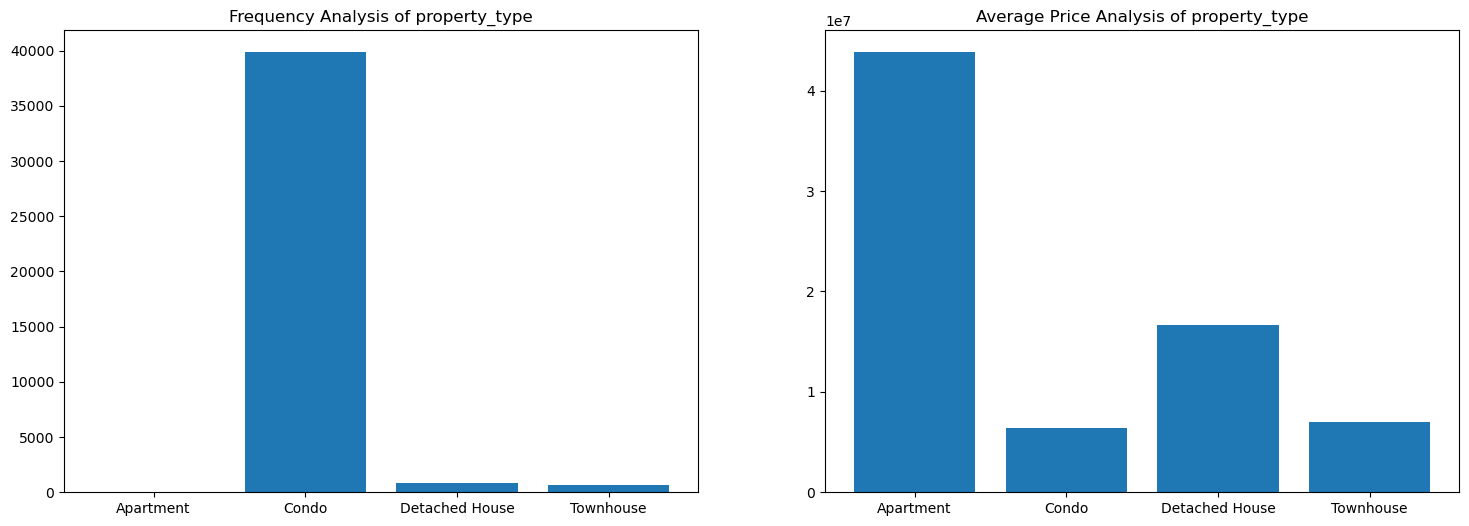

In [24]:
categorical_column = 'property_type'
price_column = 'price'
#Calculate frequency
frequency_df = ppty_df.groupBy(categorical_column).count().orderBy(categorical_column)

    # Calculate average price
avg_price_df = ppty_df.groupBy(categorical_column).avg(price_column).orderBy(categorical_column)

    # Check the number of unique values
unique_values_count = ppty_df.select(categorical_column).distinct().count()

#     # Set color palette
# sns.set_palette(color_palette)

    # Plot side-by-side subplots
fig, axes = plt.subplots(1, 2, figsize=(18, 6))
      
  # Plot bar chart for frequency using PySpark
data = frequency_df.collect()
labels = [row[categorical_column] for row in data]
counts = [row['count'] for row in data]
axes[0].bar(labels, counts)
axes[0].set_title(f'Frequency Analysis of {categorical_column}')

    # Plot bar chart for average price using PySpark
data = avg_price_df.collect()
labels = [row[categorical_column] for row in data]
avg_prices = [row['avg(' + price_column + ')'] for row in data]
axes[1].bar(labels, avg_prices)
axes[1].set_title(f'Average Price Analysis of {categorical_column}')

plt.show()

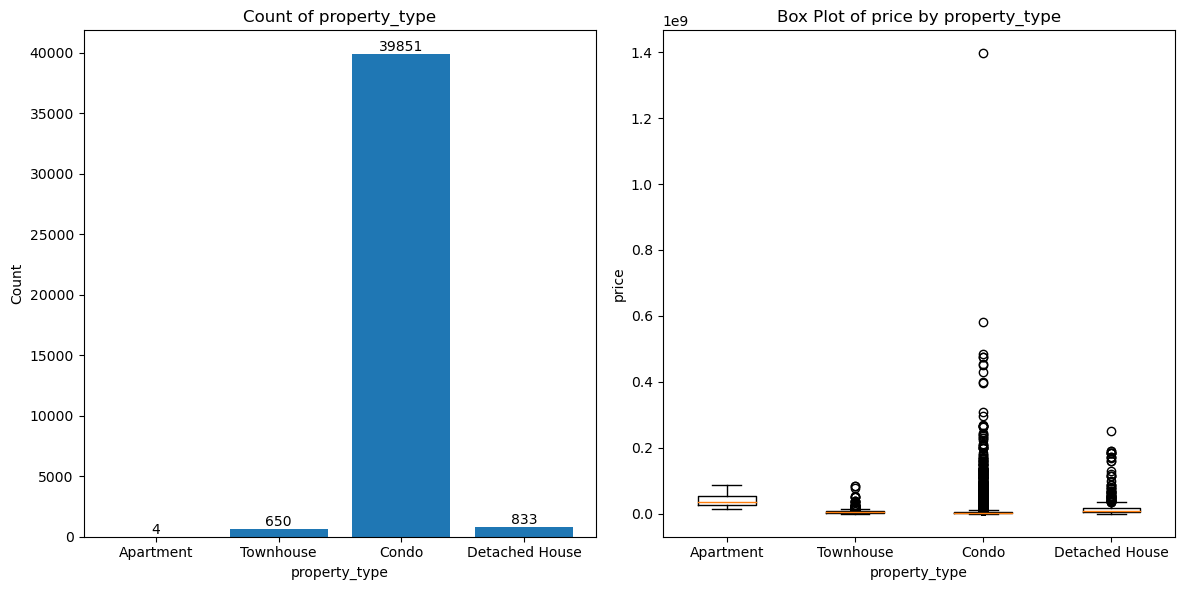

In [25]:
explore_low_cardinality_categorical_relationship(ppty_df, 'property_type', 'price')

- property_type column has values for the kind of house being sold
- property_type did not have any null or incorrect values that had to be imputed
- Used a bar chart to visualise the distribution of the number of listings across the different property types
- Found that a significant number of properties were condos with almost 40,000 of them being condos
- Compared the property_type with price and found the distribution of the price across the different types of properties using boxplots
  to better understand the difference in prices between the properties of different property_types
- Condos had a large distribution as condo prices varied the most which is also supported by the high standard deviation 
  of 1.48111778817125E7
- Used a bar chart to find the mean price across all the categories
- On average, prices for apartments were the highest by a significant amount

#### 2.5 Data Exploration & Cleansing of sub_property_type (Categorical)<a id="part2.5"></a>

[Go to Start](#Start)


In [26]:
# Showing cardinality, data type and number of null values
analyze_column(ppty_df, 'sub_property_type')

Column: sub_property_type
Data Type: StringType
Cardinality: 2
Null Values: 0
Percentage of Null Values: 0.00000%


In [27]:
# Summary specific to see specific distribtuion 
summary_stats_df = ppty_df.groupBy("sub_property_type").agg(
    F.count("price").alias("count"),
    F.mean("price").alias("mean_price"),
    F.stddev("price").alias("stddev_price"),
    F.min("price").alias("min_price"),
    F.max("price").alias("max_price")
).orderBy("sub_property_type")

summary_stats_df

sub_property_type,count,mean_price,stddev_price,min_price,max_price
For Sale,41105,6588046.026298503,1.5111852418367611E7,0,1396396324
Option To Buy,233,9914980.978540773,1.1422906603006681E7,13500,90000000


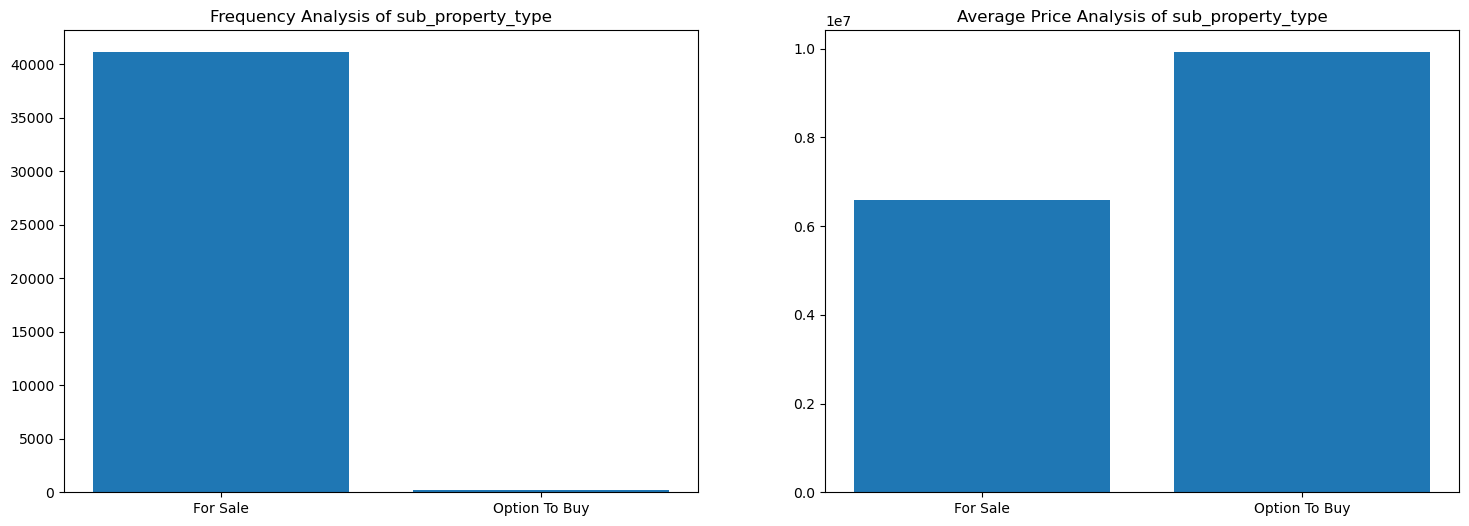

In [28]:
categorical_column = 'sub_property_type'
price_column = 'price'
#Calculate frequency
frequency_df = ppty_df.groupBy(categorical_column).count().orderBy(categorical_column)

    # Calculate average price
avg_price_df = ppty_df.groupBy(categorical_column).avg(price_column).orderBy(categorical_column)

    # Check the number of unique values
unique_values_count = ppty_df.select(categorical_column).distinct().count()

#     # Set color palette
# sns.set_palette(color_palette)

    # Plot side-by-side subplots
fig, axes = plt.subplots(1, 2, figsize=(18, 6))
      
  # Plot bar chart for frequency using PySpark
data = frequency_df.collect()
labels = [row[categorical_column] for row in data]
counts = [row['count'] for row in data]
axes[0].bar(labels, counts)
axes[0].set_title(f'Frequency Analysis of {categorical_column}')

    # Plot bar chart for average price using PySpark
data = avg_price_df.collect()
labels = [row[categorical_column] for row in data]
avg_prices = [row['avg(' + price_column + ')'] for row in data]
axes[1].bar(labels, avg_prices)
axes[1].set_title(f'Average Price Analysis of {categorical_column}')

plt.show()

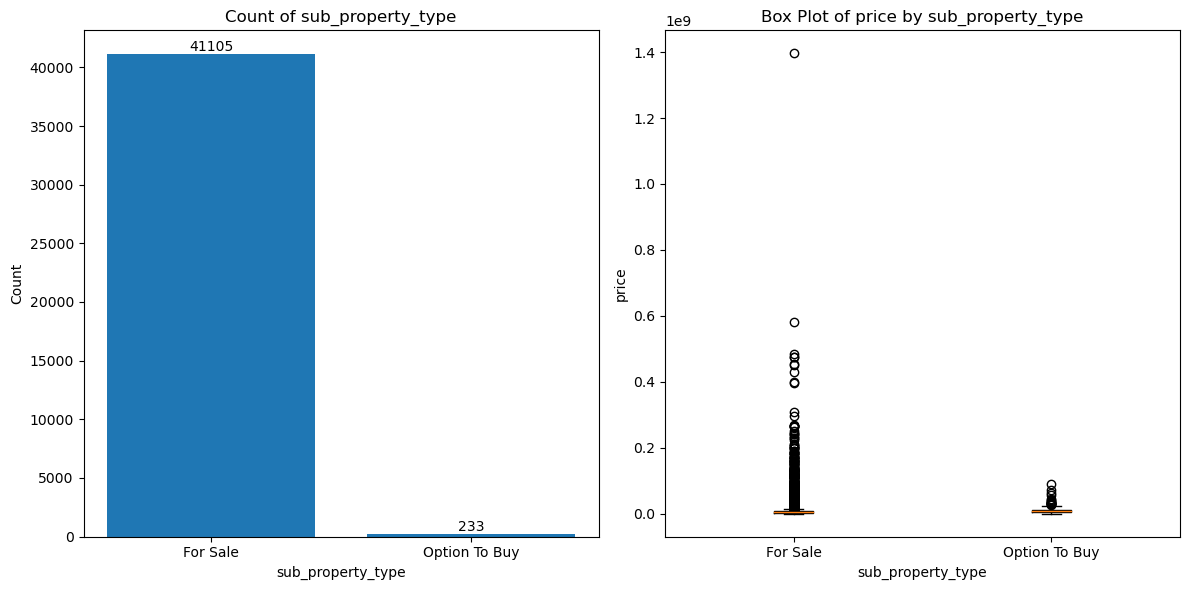

In [29]:
explore_low_cardinality_categorical_relationship(ppty_df, 'sub_property_type', 'price')

- sub_property_type has values for the activeness for the selling of the property which can relate to the time taken to 
  buy the property
- For Sale: Seller actively looking to sell
- Option to Buy: Reserving the property only
- sub_property_type did not have any null or incorrect values that had to be imputed
- Used a bar chart to visualise the distribution of the number of listings across the different sub_property_types
- Found that a significant number of properties were for sale with 41,005 properties out of around 43 000 properties for 
  sale
- Compared the sub_property_type with price and found the distribution of the price across the different types 
  of properties using boxplots to better understand the difference in prices between 
  the properties of different sub_property_types
- Properties that were for sale had a larger variety in terms of price as seen from the boxplot 
- Used a bar chart to find the mean price across all the categories
- On average, prices for option_to_buy properties were higher at 9914980.98 Baht

#### 2.6 Data Exploration & Cleansing of state (Categorical)<a id="part2.6"></a>

[Go to Start](#Start)


In [30]:
# Showing cardinality, data type and number of null values
analyze_column(ppty_df, 'state')

Column: state
Data Type: StringType
Cardinality: 17
Null Values: 0
Percentage of Null Values: 0.00000%


In [31]:
# Summary specific to see specific distribtuion 
summary_stats_df = ppty_df.groupBy("state").agg(
    F.count("price").alias("count"),
    F.mean("price").alias("mean_price"),
    F.stddev("price").alias("stddev_price"),
    F.min("price").alias("min_price"),
    F.max("price").alias("max_price")
).orderBy("state")

summary_stats_df

state,count,mean_price,stddev_price,min_price,max_price
Bangkok,36527,7022870.9818216665,1.590679546042353E7,0,1396396324
Chiang Mai,310,2554805.416129032,1017957.0279720777,199,8500000
Chon Buri,629,5459625.99682035,6983325.17300429,0,131000000
Khon Kaen,3,2013333.3333333333,693565.6662013578,1490000,2800000
Nakhon Pathom,38,4455865.52631579,6218470.584509006,450000,30360000
Nakhon Ratchasima,3,1.1166666666666666E7,7653975.002136689,2500000,17000000
Nonthaburi,1515,2783388.287128713,3500340.5768908123,0,75000000
Pathum Thani,190,2117528.4210526315,2380611.535330981,9500,18500000
Pattaya,49,1.0491358265306123E7,9079955.042452347,2590000,38570000
Phetchaburi,48,5990885.416666667,4565052.826754517,1350000,25000000


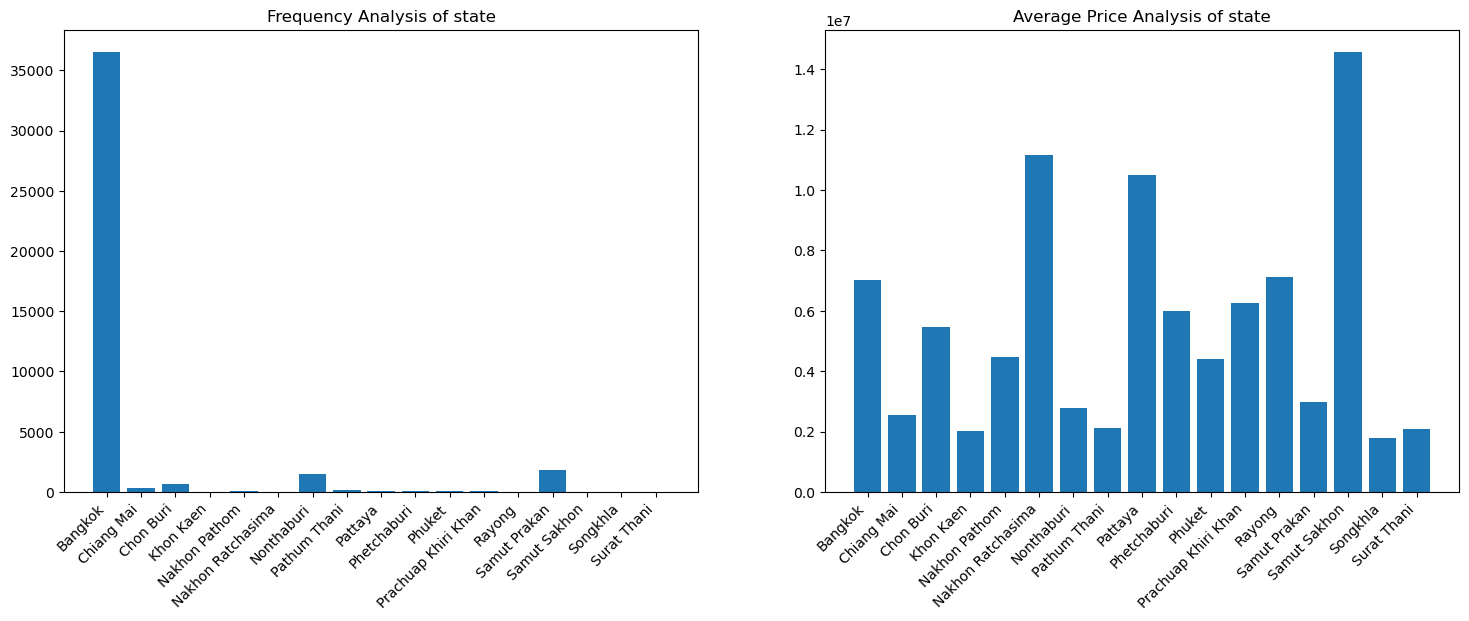

In [32]:
import matplotlib.pyplot as plt

categorical_column = 'state'
price_column = 'price'

# Calculate frequency
frequency_df = ppty_df.groupBy(categorical_column).count().orderBy(categorical_column)

# Calculate average price
avg_price_df = ppty_df.groupBy(categorical_column).avg(price_column).orderBy(categorical_column)

# Check the number of unique values
unique_values_count = ppty_df.select(categorical_column).distinct().count()

# Set color palette (if needed)
# sns.set_palette(color_palette)

# Plot side-by-side subplots
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# Plot bar chart for frequency using PySpark
data = frequency_df.collect()
labels = [row[categorical_column] for row in data]
counts = [row['count'] for row in data]
axes[0].bar(labels, counts)
axes[0].set_title(f'Frequency Analysis of {categorical_column}')

# Plot bar chart for average price using PySpark
data = avg_price_df.collect()
labels = [row[categorical_column] for row in data]
avg_prices = [row['avg(' + price_column + ')'] for row in data]
axes[1].bar(labels, avg_prices)
axes[1].set_title(f'Average Price Analysis of {categorical_column}')

# Rotate x-axis labels for better readability
for ax in axes:
    ax.set_xticks(range(len(labels)))
    ax.set_xticklabels(labels, rotation=45, ha="right")

plt.show()

- state has values for the state location where the property is based
- state did not have any null or incorrect values that had to be imputed
- Used a bar chart to visualise the distribution of the number of listings across the different states
- Found that a significant number of properties were in Bangkok with 36527 properties out of around 43 000 properties 
  listed in Bangkok
- Compared the average price across all the states and found that Samut Sakhon had the highest average 
  price of 1.4166969548582938E7	Baht but that could be beacuse one of the most expensive property is 
  there and only 21 properties based there

#### 2.7 Data Exploration & Cleansing of city (Categorical)<a id="part2.7"></a>

[Go to Start](#Start)


In [33]:
# Showing cardinality, data type and number of null values
analyze_column(ppty_df, 'city')

Column: city
Data Type: StringType
Cardinality: 89
Null Values: 0
Percentage of Null Values: 0.00000%


In [34]:
# Showing the number of values in top categories in descending order due to high 
city_counts_top = ppty_df.groupBy('city').count().orderBy('count', ascending=False).limit(20)

# Show the result
city_counts_top.show()

+-------------------+-----+
|               city|count|
+-------------------+-----+
|        Huai Khwang| 4695|
|           Watthana| 3833|
|          Chatuchak| 3043|
|        Khlong Toei| 2914|
|       Phra Khanong| 1900|
|        Ratchathewi| 1610|
|         Suan Luang| 1463|
|            Bang Na| 1293|
|           Bang Sue| 1288|
|         Khlong San| 1222|
|          Din Daeng| 1153|
|          Bang Kapi| 1131|
|Muang Samut Prakarn| 1102|
|          Thon Buri| 1044|
|           Yan Nawa| 1040|
|             Sathon| 1004|
|   Muang Nonthaburi|  963|
|           Bang Rak|  886|
|         Phaya Thai|  772|
|         Pathum Wan|  594|
+-------------------+-----+



In [35]:
from pyspark.sql import functions as F

# Calculate the summary statistics for city
summary_stats_by_city = ppty_df.groupBy("city").agg(
    F.count("price").alias("count"),
    F.mean("price").alias("mean_price"),
    F.stddev("price").alias("stddev_price"),
    F.min("price").alias("min_price"),
    F.max("price").alias("max_price")
)

# Order the result by mean price in descending order and select the top 20
top_cities_summary_stats = summary_stats_by_city.orderBy('mean_price', ascending=False).limit(20)

top_cities_summary_stats

city,count,mean_price,stddev_price,min_price,max_price
Pathum Wan,594,2.147149564814815E7,2.5608979420635678E7,18000,309470300
Khlong San,1222,2.0022607900163665E7,3.759774216333376E7,41,485000000
Bang Kho Laem,448,1.9494032933035713E7,5.280805747491551E7,14000,475000000
Klaeng,2,1.535E7,6293250.352560273,10900000,19800000
Muang Samut Sakhon,20,1.517945E7,1.425061966325823E7,1990000,55000000
Bang Rak,886,1.5020585038374718E7,2.4959938789578974E7,1000,295000000
Thalang,4,1.34225E7,8918484.082697762,8890000,26800000
Saphan Sung,49,1.225895918367347E7,8007191.51752344,2050000,47900000
Thawi Watthana,11,1.1967272636363637E7,7144864.1282837875,2850000,18000000
Watthana,3833,1.1889870985129142E7,1.5822597629472049E7,0,189000000


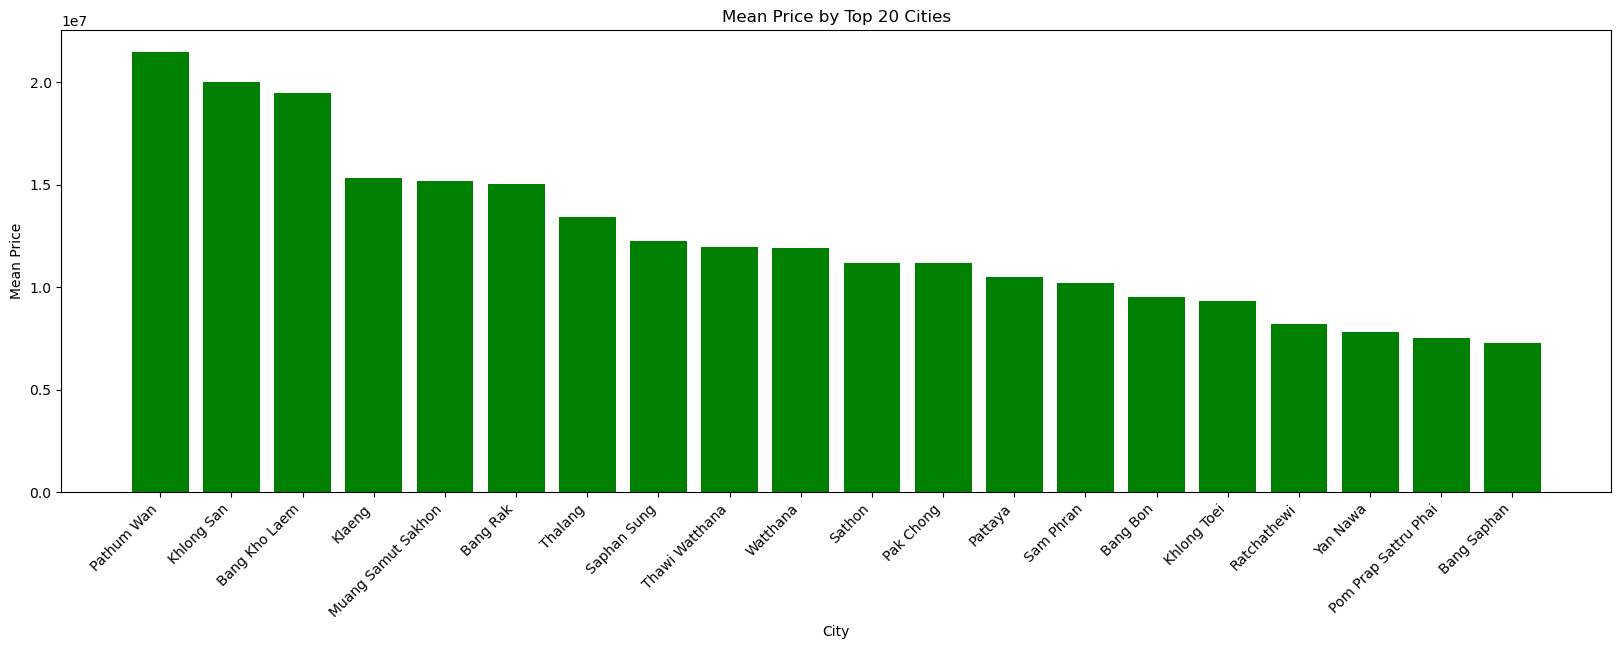

In [36]:
# Calculate the mean price for each city
mean_prices_by_city = ppty_df.groupBy('city').agg(expr('mean(price)').alias('mean_price'))

# Order the result by mean price in descending order and select the top 20
top_cities = mean_prices_by_city.orderBy('mean_price', ascending=False).limit(20)

# Collect data for plotting using a for loop
cities_data = top_cities.collect()
cities = [row['city'] for row in cities_data]
mean_prices = [row['mean_price'] for row in cities_data]

# Bar plot
plt.figure(figsize=(20, 6))
bar_plot = plt.bar(cities, mean_prices, color='green')
plt.title("Mean Price by Top 20 Cities")
plt.xlabel("City")
plt.ylabel("Mean Price")

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha="right")

plt.show()

- city has values for the more specific city location where the property is based
- city did not have any null or incorrect values that had to be imputed
- Used a bar chart to visualise the distribution of the number of listings across the different cities
- Since there city had 89 unique values, I decided to find more information about the cities with the 
  most expensive properties on average
- Found that Pathum wan had the highest average price of 2.147149564814815E7 Baht but a reason for this is due to
  the presence of the most expenive property listed there

#### 2.8 Data Exploration & Cleansing of listing_label (Categorical)<a id="part2.8"></a>

[Go to Start](#Start)


In [37]:
# Showing cardinality, data type and number of null values
analyze_column(ppty_df, 'listing_label')

Column: listing_label
Data Type: StringType
Cardinality: 3
Null Values: 0
Percentage of Null Values: 0.00000%


In [38]:
# Summary specific to see specific distribtuion 
summary_stats_df = ppty_df.groupBy("listing_label").agg(
    F.count("price").alias("count"),
    F.mean("price").alias("mean_price"),
    F.stddev("price").alias("stddev_price"),
    F.min("price").alias("min_price"),
    F.max("price").alias("max_price")
).orderBy("listing_label")

summary_stats_df

listing_label,count,mean_price,stddev_price,min_price,max_price
CORPORATE,38169,6600210.012811444,1.5042090758461757E7,0,1396396324
NORMAL,3151,6686045.112662647,1.576034188363971E7,0,395000000
OWNER,18,6704352.777777778,8295686.86190162,308350,35000000


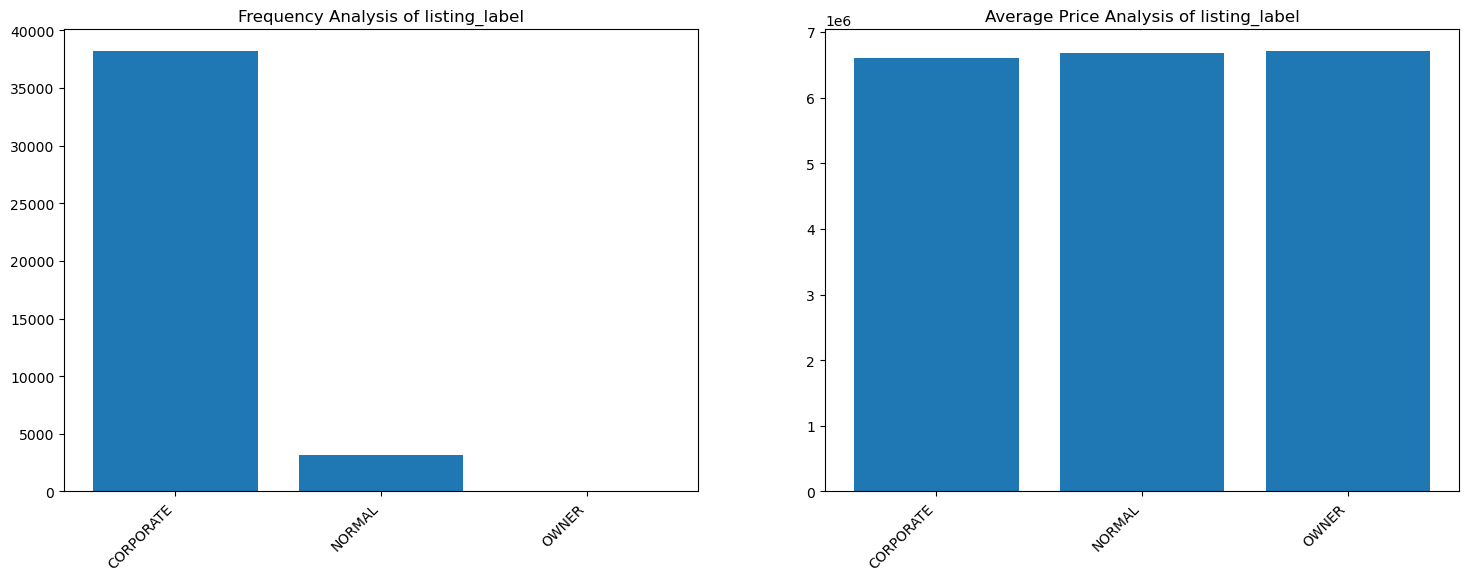

In [39]:
import matplotlib.pyplot as plt

categorical_column = 'listing_label'
price_column = 'price'

# Calculate frequency
frequency_df = ppty_df.groupBy(categorical_column).count().orderBy(categorical_column)

# Calculate average price
avg_price_df = ppty_df.groupBy(categorical_column).avg(price_column).orderBy(categorical_column)

# Check the number of unique values
unique_values_count = ppty_df.select(categorical_column).distinct().count()

# Set color palette (if needed)
# sns.set_palette(color_palette)

# Plot side-by-side subplots
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# Plot bar chart for frequency using PySpark
data = frequency_df.collect()
labels = [row[categorical_column] for row in data]
counts = [row['count'] for row in data]
axes[0].bar(labels, counts)
axes[0].set_title(f'Frequency Analysis of {categorical_column}')

# Plot bar chart for average price using PySpark
data = avg_price_df.collect()
labels = [row[categorical_column] for row in data]
avg_prices = [row['avg(' + price_column + ')'] for row in data]
axes[1].bar(labels, avg_prices)
axes[1].set_title(f'Average Price Analysis of {categorical_column}')

# Rotate x-axis labels for better readability
for ax in axes:
    ax.set_xticks(range(len(labels)))
    ax.set_xticklabels(labels, rotation=45, ha="right")

plt.show()

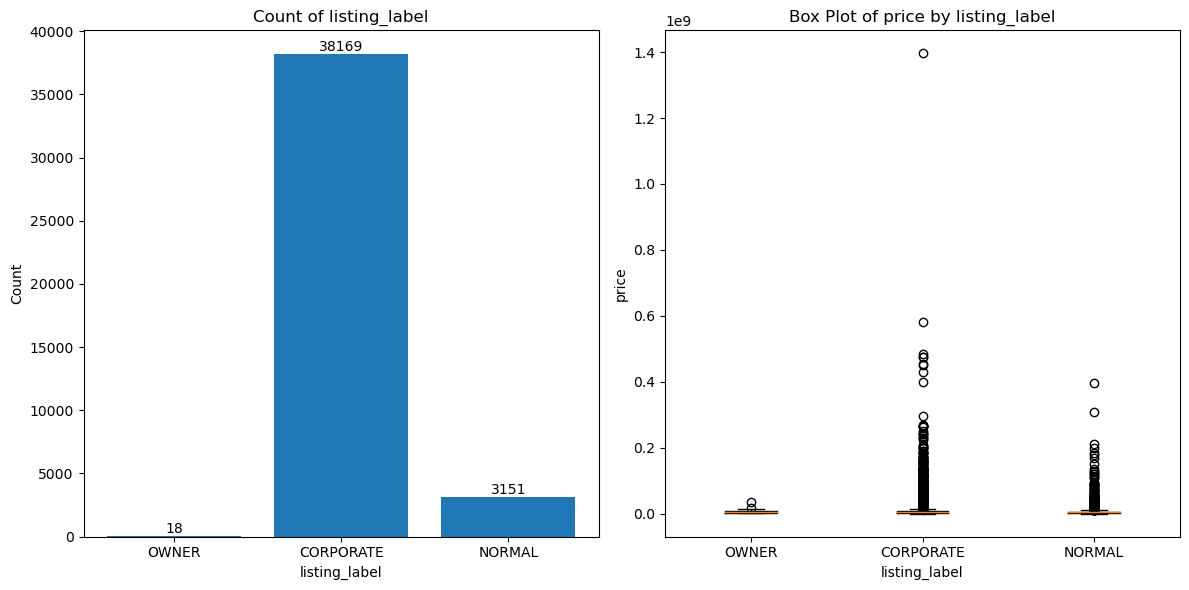

In [40]:
explore_low_cardinality_categorical_relationship(ppty_df, 'listing_label', 'price')

- listing_label has more information about the individuals or organisations that are selling the properties
- listing_label did not have any null or incorrect values that had to be imputed
- Used a bar chart to visualise the distribution of the number of listings across the different listing_labels
- Found that a significant number of properties were for sale under corporate listing
- Used a bar chart to find the mean price across all the categories
- Mean prices across the categories were similar
- Compared the listing_labels with price and found the distribution of the price across the different listing_labels
  using boxplots to better understand the difference in prices between the properties of different listing_labels
- Corporate listed property prices varied the most as also seen from the massive standard deviation of 1.5042090758461757E7

#### 2.9 Data Exploration & Cleansing of tenure (Categorical)<a id="part2.9"></a>

[Go to Start](#Start)


In [41]:
# Showing cardinality, data type and number of null values
analyze_column(ppty_df, 'tenure')

Column: tenure
Data Type: StringType
Cardinality: 3
Null Values: 0
Percentage of Null Values: 0.00000%


In [42]:
# Summary specific to see specific distribtuion 
summary_stats_df = ppty_df.groupBy("tenure").agg(
    F.count("price").alias("count"),
    F.mean("price").alias("mean_price"),
    F.stddev("price").alias("stddev_price"),
    F.min("price").alias("min_price"),
    F.max("price").alias("max_price")
).orderBy("tenure")

summary_stats_df

tenure,count,mean_price,stddev_price,min_price,max_price
30-year Leasehold,7,1.022142857142857E7,2734022.8514738046,8500000,16000000
Freehold,41196,6504244.404893679,1.4176274765204538E7,0,1396396324
Leasehold,135,3.771422203703704E7,8.680252630851714E7,9500,475000000


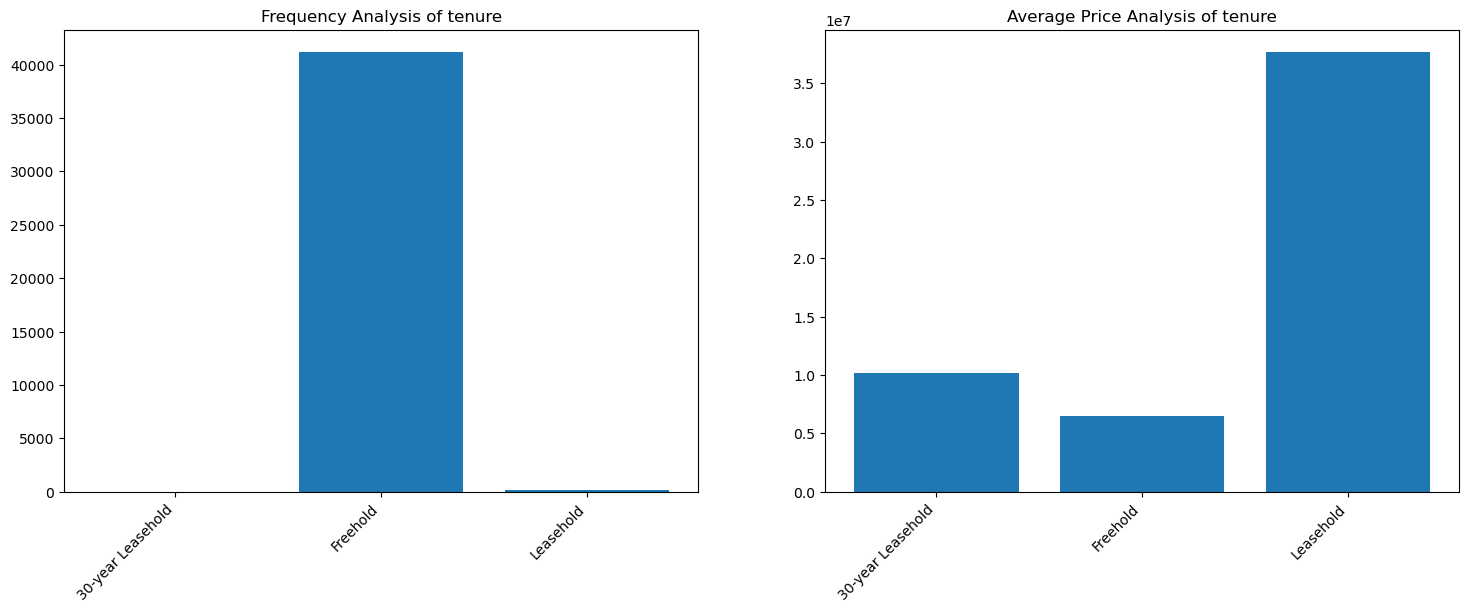

In [43]:
import matplotlib.pyplot as plt

categorical_column = 'tenure'
price_column = 'price'

# Calculate frequency
frequency_df = ppty_df.groupBy(categorical_column).count().orderBy(categorical_column)

# Calculate average price
avg_price_df = ppty_df.groupBy(categorical_column).avg(price_column).orderBy(categorical_column)

# Check the number of unique values
unique_values_count = ppty_df.select(categorical_column).distinct().count()

# Set color palette (if needed)
# sns.set_palette(color_palette)

# Plot side-by-side subplots
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# Plot bar chart for frequency using PySpark
data = frequency_df.collect()
labels = [row[categorical_column] for row in data]
counts = [row['count'] for row in data]
axes[0].bar(labels, counts)
axes[0].set_title(f'Frequency Analysis of {categorical_column}')

# Plot bar chart for average price using PySpark
data = avg_price_df.collect()
labels = [row[categorical_column] for row in data]
avg_prices = [row['avg(' + price_column + ')'] for row in data]
axes[1].bar(labels, avg_prices)
axes[1].set_title(f'Average Price Analysis of {categorical_column}')

# Rotate x-axis labels for better readability
for ax in axes:
    ax.set_xticks(range(len(labels)))
    ax.set_xticklabels(labels, rotation=45, ha="right")

plt.show()

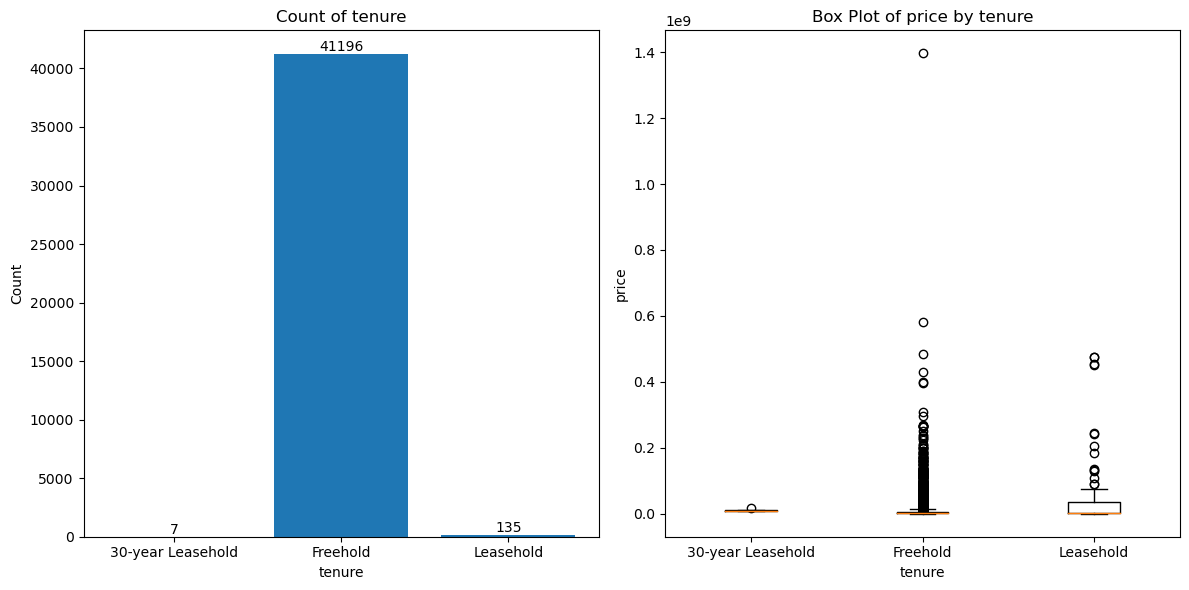

In [44]:
explore_low_cardinality_categorical_relationship(ppty_df, 'tenure', 'price')

- tenure refers to the time the property can be owned
- tenure did not have any null or incorrect values that had to be imputed
- Used a bar chart to visualise the distribution of the number of listings across the different tenure categories
- Found that a significant number of properties had freehold tenure which means that the property can be owned forever
- Compared the tenure categories with price and found the distribution of the price across the 
  different tenure categories using boxplots to better understand the difference in prices 
  between the properties of different tenure categories
- freehold tenure properties had the most varied prices 
- Used a bar chart to find the mean price across all categories
- On average, properties of leasehold had the highest prices of 3.771422203703704E7 Baht

#### 2.10 Data Exploration & Cleansing of address (Categorical)<a id="part2.10"></a>

[Go to Start](#Start)


In [45]:
# Showing cardinality, data type and number of null values
analyze_column(ppty_df, 'address')

Column: address
Data Type: StringType
Cardinality: 1686
Null Values: 0
Percentage of Null Values: 0.00000%


In [46]:
# Showing the number of values in top categories in descending order due to high 
address_counts_top= ppty_df.groupBy('address').count().orderBy('count', ascending=False).limit(10)

# Show the result
address_counts_top.show()

+--------------------+-----+
|             address|count|
+--------------------+-----+
|              #NAME?| 6880|
|624 Asoke-Dindaen...|  391|
|- Soi Rama 9, Ram...|  331|
|- Rama 9, Bang Ka...|  311|
|- Rama 4 Road, Ph...|  276|
|888 ่Jaturatid Ro...|  257|
|215 Charoen Nakho...|  240|
|- Rama 9 Road, Hu...|  237|
|884 12-13 Rama 9 ...|  213|
|33/4 Rama 9 Road,...|  210|
+--------------------+-----+



In [47]:
# Drop address due to high cardinality & high number of irrelevant values
ppty_df = ppty_df.drop('address')
# Show resulting dataframe
ppty_df.columns

['living_space',
 'bathroom_number',
 'property_type',
 'sub_property_type',
 'city',
 'floor_level',
 'state',
 'built_year',
 'latitude',
 'longitude',
 'bedroom_number',
 'listing_label',
 'premium',
 'tenure',
 'price']

- Address has information about the more specific location of the property such as the street name, city and state
- Due to the specific nature of the variable, it has a high cardinality of 1686
- High cardinality creates sparse data, making it hard for models 
  to learn accurate relationships and leading to poor price predictions.
- After looking at the top values, an overwhelming number of values have missing address with 6880 rows having an address
  of #NAME? which not be providing much relevant information for the price prediction model
- Hence, I decided to drop the address column

#### 2.11 Data Exploration & Cleansing of bedroom_number (Discrete Numerical)<a id="part2.11"></a>

[Go to Start](#Start)


In [48]:
# Showing cardinality, data type and number of null values
analyze_column(ppty_df, 'bedroom_number')

Column: bedroom_number
Data Type: IntegerType
Cardinality: 12
Null Values: 0
Percentage of Null Values: 0.00000%


In [49]:
# Summary specific to see specific distribtuion 
summary_stats_df = ppty_df.groupBy("bedroom_number").agg(
    F.count("price").alias("count"),
    F.mean("price").alias("mean_price"),
    F.stddev("price").alias("stddev_price"),
    F.min("price").alias("min_price"),
    F.max("price").alias("max_price")
).orderBy("bedroom_number")

summary_stats_df

bedroom_number,count,mean_price,stddev_price,min_price,max_price
0,3378,2964072.1592658376,2.4040638077990405E7,0,1396396324
1,27257,3943181.737792127,3559348.974485675,0,206000000
2,8146,1.0834932126442425E7,1.089431629465858E7,0,150000000
3,1876,1.9620985640724946E7,2.410632634683789E7,0,295000000
4,514,3.9044705630350195E7,5.8690290984070204E7,0,580000000
5,125,6.676813792E7,9.797750898109199E7,4000000,475000000
6,26,4.8895E7,8.753556311579883E7,7700000,428870000
7,5,9.1626E7,1.7262167413161072E8,4330000,400000000
8,1,1.99E7,NaN,19900000,19900000
9,2,5.468E7,3.4393673836913675E7,30360000,79000000


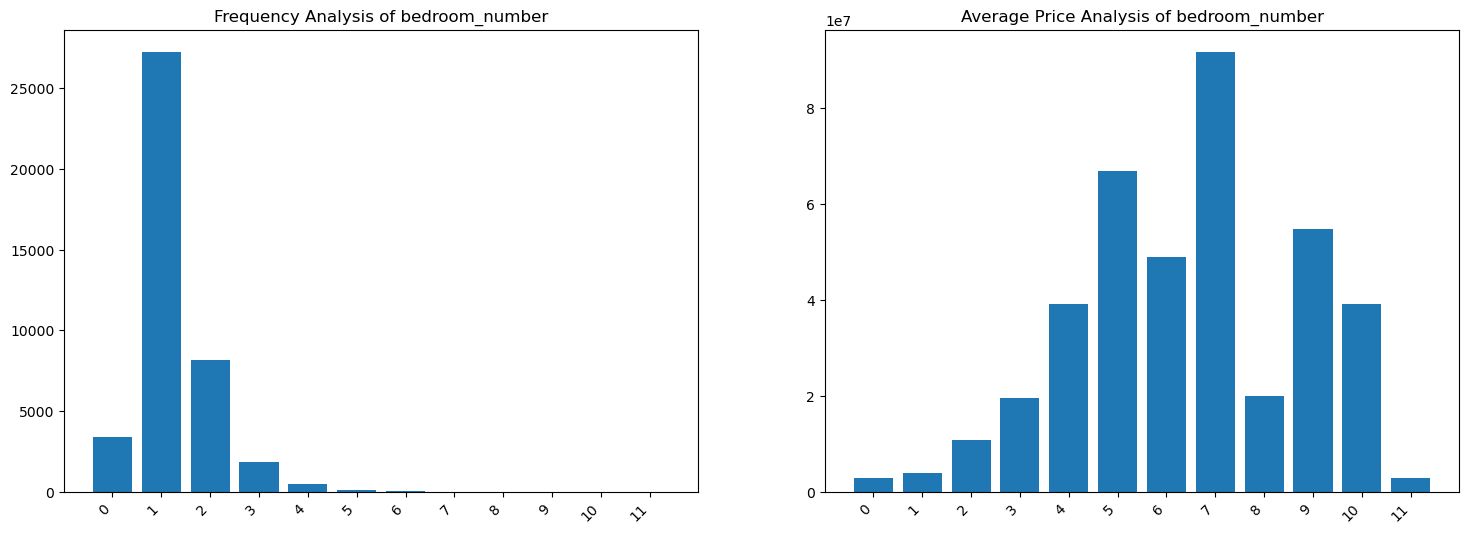

In [50]:
import matplotlib.pyplot as plt

categorical_column = 'bedroom_number'
price_column = 'price'

# Calculate frequency
frequency_df = ppty_df.groupBy(categorical_column).count().orderBy(categorical_column)

# Calculate average price
avg_price_df = ppty_df.groupBy(categorical_column).avg(price_column).orderBy(categorical_column)

# Check the number of unique values
unique_values_count = ppty_df.select(categorical_column).distinct().count()

# Set color palette (if needed)
# sns.set_palette(color_palette)

# Plot side-by-side subplots
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# Plot bar chart for frequency using PySpark
data = frequency_df.collect()
labels = [row[categorical_column] for row in data]
counts = [row['count'] for row in data]
axes[0].bar(labels, counts)
axes[0].set_title(f'Frequency Analysis of {categorical_column}')

# Plot bar chart for average price using PySpark
data = avg_price_df.collect()
labels = [row[categorical_column] for row in data]
avg_prices = [row['avg(' + price_column + ')'] for row in data]
axes[1].bar(labels, avg_prices)
axes[1].set_title(f'Average Price Analysis of {categorical_column}')

# Rotate x-axis labels for better readability
for ax in axes:
    ax.set_xticks(range(len(labels)))
    ax.set_xticklabels(labels, rotation=45, ha="right")

plt.show()

- bedroom_number has values for the number of bedrooms in the property and this can affect price as usually properties 
  with higher bedrooms cost more
- bedroom_number did not have any null or incorrect values that had to be imputed
- Used a bar chart to visualise the distribution of the number of listings across the different bedroom numbers
- Found that a significant number of properties had 1 bedroom with 27257 properties having 1 bedroom
- Compared the average price across all the bedroom_number and found that properties with 7 bedrooms
  had the highest average price of 9.1626E7	Baht 

#### 2.12 Data Exploration & Cleansing of bathroom_number (Discrete Numerical)<a id="part2.12"></a>

[Go to Start](#Start)


In [51]:
# Showing cardinality, data type and number of null values
analyze_column(ppty_df, 'bathroom_number')

Column: bathroom_number
Data Type: IntegerType
Cardinality: 10
Null Values: 0
Percentage of Null Values: 0.00000%


In [52]:
# Summary specific to see specific distribtuion 
summary_stats_df = ppty_df.groupBy("bathroom_number").agg(
    F.count("price").alias("count"),
    F.mean("price").alias("mean_price"),
    F.stddev("price").alias("stddev_price"),
    F.min("price").alias("min_price"),
    F.max("price").alias("max_price")
).orderBy("bathroom_number")

summary_stats_df

bathroom_number,count,mean_price,stddev_price,min_price,max_price
0,35,3251857.1428571427,4798466.986462246,10000,29000000
1,32515,3925038.24238044,8433747.503659729,0,1396396324
2,6567,1.1514231634993147E7,1.0041993093202952E7,0,150000000
3,1379,2.2954416163886875E7,2.5916129396677997E7,0,295000000
4,508,3.403764146062992E7,4.856146140738314E7,0,580000000
5,235,5.637403459148936E7,7.304603104018705E7,110000,485000000
6,79,8.242037974683544E7,9.570813054499625E7,7800000,475000000
7,13,5.2361538461538464E7,1.047597452782758E8,9900000,400000000
8,1,8.7E7,NaN,87000000,87000000
9,6,4.8226666666666664E7,3.1246956118423227E7,13000000,88000000


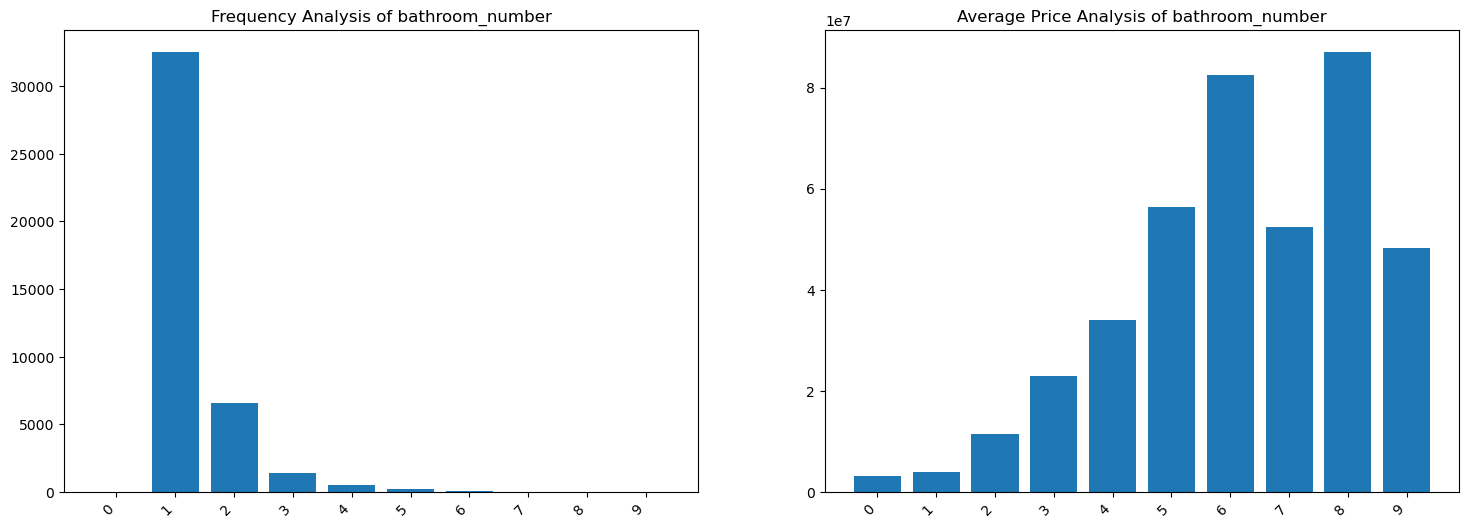

In [53]:
import matplotlib.pyplot as plt

categorical_column = 'bathroom_number'
price_column = 'price'

# Calculate frequency
frequency_df = ppty_df.groupBy(categorical_column).count().orderBy(categorical_column)

# Calculate average price
avg_price_df = ppty_df.groupBy(categorical_column).avg(price_column).orderBy(categorical_column)

# Check the number of unique values
unique_values_count = ppty_df.select(categorical_column).distinct().count()

# Set color palette (if needed)
# sns.set_palette(color_palette)

# Plot side-by-side subplots
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# Plot bar chart for frequency using PySpark
data = frequency_df.collect()
labels = [row[categorical_column] for row in data]
counts = [row['count'] for row in data]
axes[0].bar(labels, counts)
axes[0].set_title(f'Frequency Analysis of {categorical_column}')

# Plot bar chart for average price using PySpark
data = avg_price_df.collect()
labels = [row[categorical_column] for row in data]
avg_prices = [row['avg(' + price_column + ')'] for row in data]
axes[1].bar(labels, avg_prices)
axes[1].set_title(f'Average Price Analysis of {categorical_column}')

# Rotate x-axis labels for better readability
for ax in axes:
    ax.set_xticks(range(len(labels)))
    ax.set_xticklabels(labels, rotation=45, ha="right")

plt.show()

- bathroom_number has values for the number of bathrooms in the property and this can affect price as usually properties 
  with higher bathrooms cost more
- bathroom_number did not have any null or incorrect values that had to be imputed
- Used a bar chart to visualise the distribution of the number of listings across the different number of bathrooms
- Found that a significant number of properties had 1 bathroom with 32515 properties having 1 bathroom
- Compared the average price across all the bedroom_number and found that generally properties with more bathrooms 
  had higher prices with properties with 8 bathrooms having the highest average price of 8.7E7 Baht 

#### 2.13 Data Exploration & Cleansing of built_year (Discrete Numerical)<a id="part2.13"></a>

[Go to Start](#Start)


In [54]:
# Showing cardinality, data type and number of null values
analyze_column(ppty_df, 'built_year')

Column: built_year
Data Type: IntegerType
Cardinality: 38
Null Values: 0
Percentage of Null Values: 0.00000%


In [55]:
# Summary specific to see specific distribtuion 
summary_stats_df = ppty_df.groupBy("built_year").agg(
    F.count("price").alias("count"),
    F.mean("price").alias("mean_price"),
    F.stddev("price").alias("stddev_price"),
    F.min("price").alias("min_price"),
    F.max("price").alias("max_price")
).orderBy("built_year")

summary_stats_df

built_year,count,mean_price,stddev_price,min_price,max_price
1985,3,2.3333333333333332E7,1527525.2316519467,22000000,25000000
1986,1,1765500.0,NaN,1765500,1765500
1988,1,1700000.0,NaN,1700000,1700000
1991,3,2163333.3333333335,764874.7174102,1500000,3000000
1992,10,1.1029E7,7446712.100726812,3500000,23000000
1993,44,6100000.0,6360574.421916953,390000,21000000
1994,108,7569722.222222222,5833429.356130021,600000,45000000
1995,79,2.1448481012658227E7,4.627313550493384E7,1200000,172270000
1996,59,1.1088813559322033E7,1.031891798570349E7,700000,65000000
1997,53,1.3719735849056603E7,1.4850488720462188E7,1450000,77500000


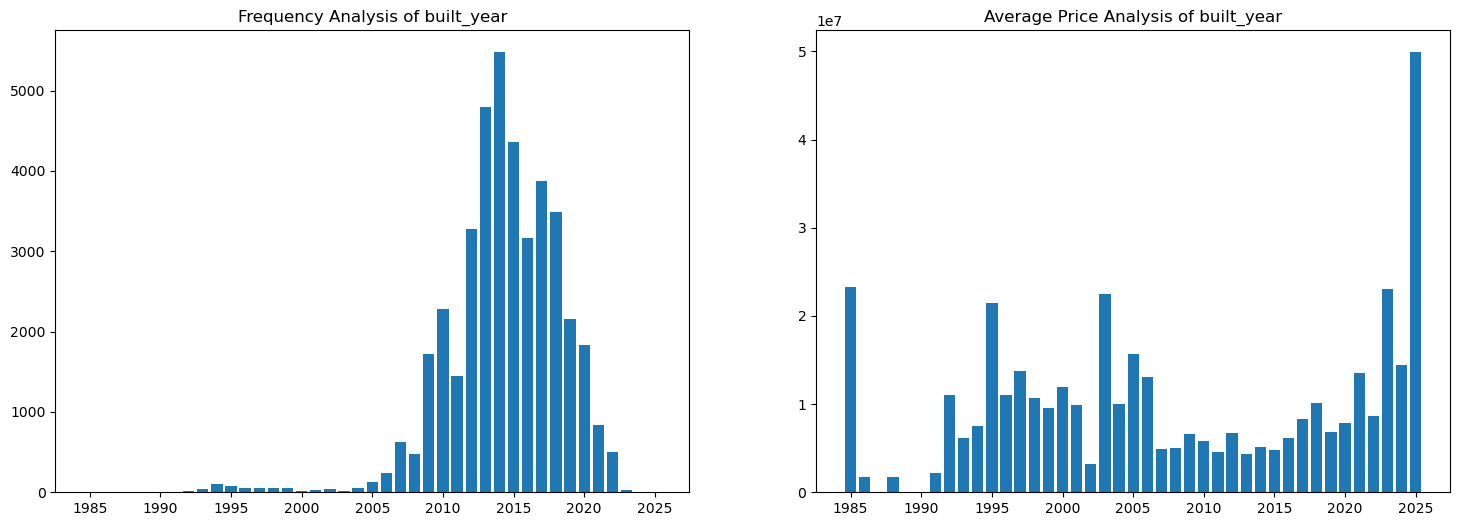

In [56]:
categorical_column = 'built_year'
price_column = 'price'
#Calculate frequency
frequency_df = ppty_df.groupBy(categorical_column).count().orderBy(categorical_column)

    # Calculate average price
avg_price_df = ppty_df.groupBy(categorical_column).avg(price_column).orderBy(categorical_column)

    # Check the number of unique values
unique_values_count = ppty_df.select(categorical_column).distinct().count()

#     # Set color palette
# sns.set_palette(color_palette)

    # Plot side-by-side subplots
fig, axes = plt.subplots(1, 2, figsize=(18, 6))
      
  # Plot bar chart for frequency using PySpark
data = frequency_df.collect()
labels = [row[categorical_column] for row in data]
counts = [row['count'] for row in data]
axes[0].bar(labels, counts)
axes[0].set_title(f'Frequency Analysis of {categorical_column}')

    # Plot bar chart for average price using PySpark
data = avg_price_df.collect()
labels = [row[categorical_column] for row in data]
avg_prices = [row['avg(' + price_column + ')'] for row in data]
axes[1].bar(labels, avg_prices)
axes[1].set_title(f'Average Price Analysis of {categorical_column}')

plt.show()

- built_year has values for the year the property was built
- built_year did not have any null or incorrect values that had to be imputed
- Used a bar chart to visualise the distribution of the number of listings across the different build years
- Bar chart shows that as the years progressed, moe properties were built and there was a significant increase of 
  properties built from year 2009 with the most number of properties being built on 2014 exceeding 5000 properties
- There were some properties being on 2024 and 2025 which indicates that the properties might still be being built
  so I did not drop them
- Compared the average price of the properties across the years using a bar chart

#### 2.14 Data Exploration & Cleansing of premium (Discrete Numerical)<a id="part2.14"></a>

[Go to Start](#Start)


In [57]:
# Showing cardinality, data type and number of null values
analyze_column(ppty_df, 'premium')

Column: premium
Data Type: IntegerType
Cardinality: 2
Null Values: 0
Percentage of Null Values: 0.00000%


In [58]:
# Summary specific to see specific distribtuion 
summary_stats_df = ppty_df.groupBy("premium").agg(
    F.count("price").alias("count"),
    F.mean("price").alias("mean_price"),
    F.stddev("price").alias("stddev_price"),
    F.min("price").alias("min_price"),
    F.max("price").alias("max_price")
).orderBy("premium")

summary_stats_df

premium,count,mean_price,stddev_price,min_price,max_price
0,40751,6601541.446369414,1.5017098121694561E7,0,1396396324
1,587,6971732.534923339,1.9808574900323667E7,8000,395000000


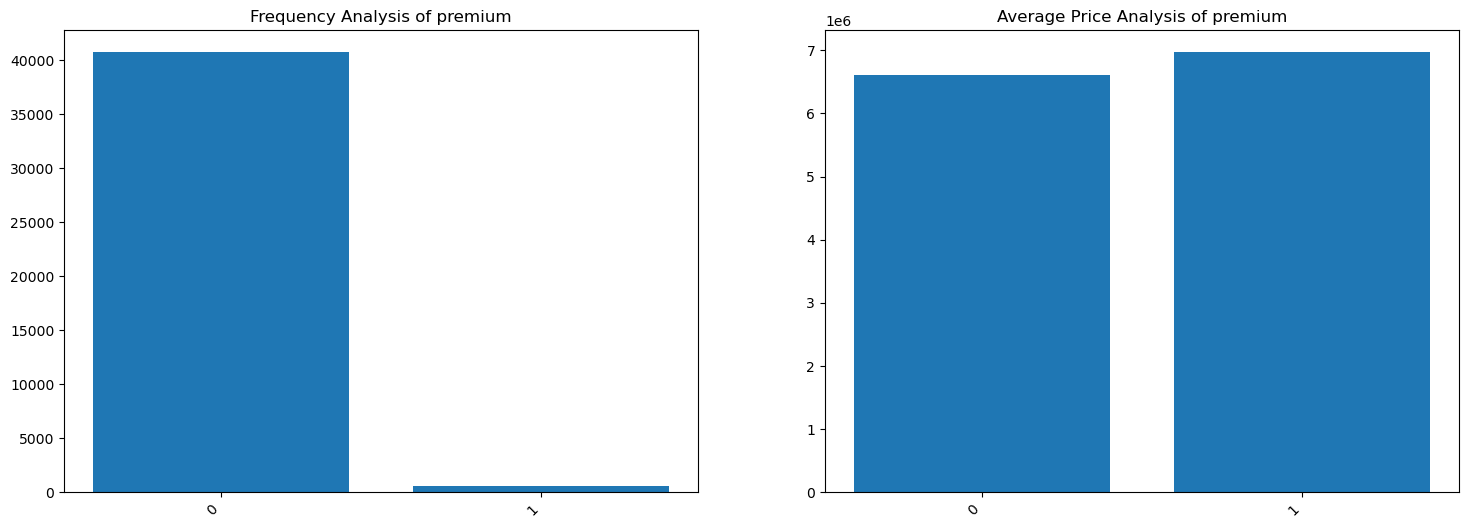

In [59]:
import matplotlib.pyplot as plt

categorical_column = 'premium'
price_column = 'price'

# Calculate frequency
frequency_df = ppty_df.groupBy(categorical_column).count().orderBy(categorical_column)

# Calculate average price
avg_price_df = ppty_df.groupBy(categorical_column).avg(price_column).orderBy(categorical_column)

# Check the number of unique values
unique_values_count = ppty_df.select(categorical_column).distinct().count()

# Set color palette (if needed)
# sns.set_palette(color_palette)

# Plot side-by-side subplots
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# Plot bar chart for frequency using PySpark
data = frequency_df.collect()
labels = [row[categorical_column] for row in data]
counts = [row['count'] for row in data]
axes[0].bar(labels, counts)
axes[0].set_title(f'Frequency Analysis of {categorical_column}')

# Plot bar chart for average price using PySpark
data = avg_price_df.collect()
labels = [row[categorical_column] for row in data]
avg_prices = [row['avg(' + price_column + ')'] for row in data]
axes[1].bar(labels, avg_prices)
axes[1].set_title(f'Average Price Analysis of {categorical_column}')

# Rotate x-axis labels for better readability
for ax in axes:
    ax.set_xticks(range(len(labels)))
    ax.set_xticklabels(labels, rotation=45, ha="right")

plt.show()

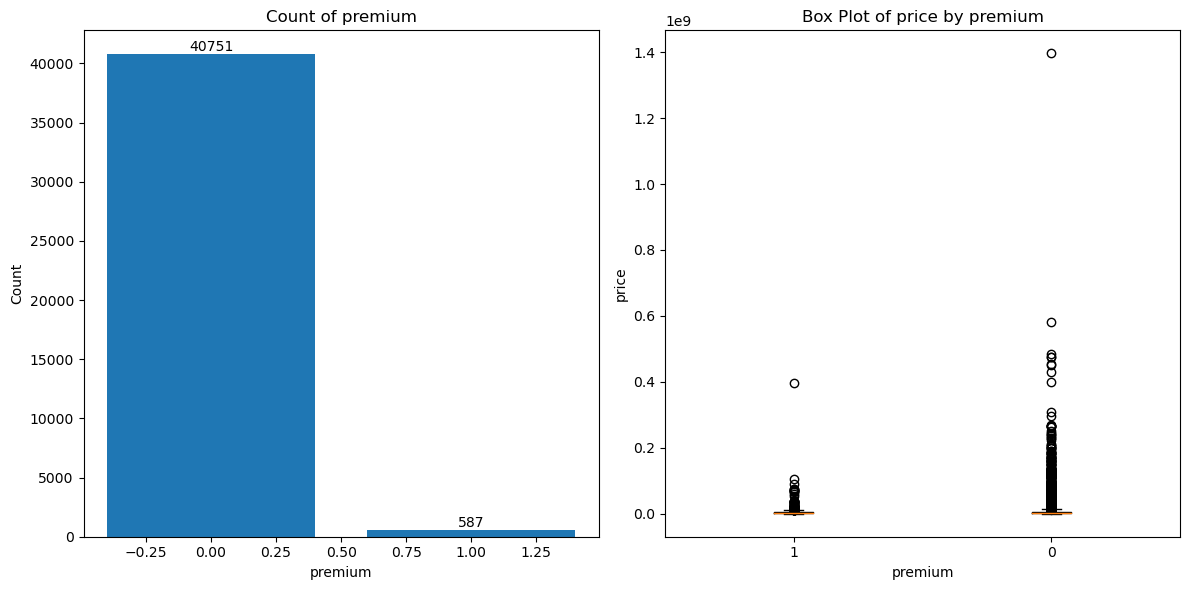

In [60]:
explore_low_cardinality_categorical_relationship(ppty_df, 'premium', 'price')

- premium is a binary variable which can indicate differences between the amenities provided by the 
  different properties with premium properties having more luxury features
- premium did not have any null or incorrect values that had to be imputed
- Used a bar chart to visualise the mean to check the general price difference the number of premium and normal properties
- Premium prices were higher on average at 6971732.53 Baht
- Found that a significant number of properties were not premium and only 587 properties were listed as premium
- Compared the difference in distribution of the price across the 
  different premium & non-premium properties using boxplots to better understand the difference in prices 
- premium properties had more varied prices 

#### 2.15 Data Exploration & Cleansing of living_space (Continuous Numerical)<a id="part2.15"></a>

[Go to Start](#Start)


In [61]:
# Showing cardinality, data type and number of null values
analyze_column(ppty_df, 'living_space')

Column: living_space
Data Type: DoubleType
Cardinality: 3029
Null Values: 50
Percentage of Null Values: 0.00121%


In [62]:
# Summary specific to see specific distribtuion 
summary_stats_df = ppty_df.groupBy("property_type").agg(
    F.count("living_space").alias("count"),
    F.mean("living_space").alias("mean_living_space"),
    F.stddev("living_space").alias("stddev_living_space"),
    F.min("living_space").alias("min_living_space"),
    F.max("living_space").alias("max_living_space")
).orderBy("property_type")

summary_stats_df

property_type,count,mean_living_space,stddev_living_space,min_living_space,max_living_space
Apartment,4,1567.5,1946.4623465833256,54.0,4300.0
Condo,39801,117.31024703650668,6443.448542379418,16.0,989898.0
Detached House,833,624.6904117647058,7640.562226794346,20.0,169169.0
Townhouse,650,347.64690769230776,4666.982285698297,20.0,119119.0


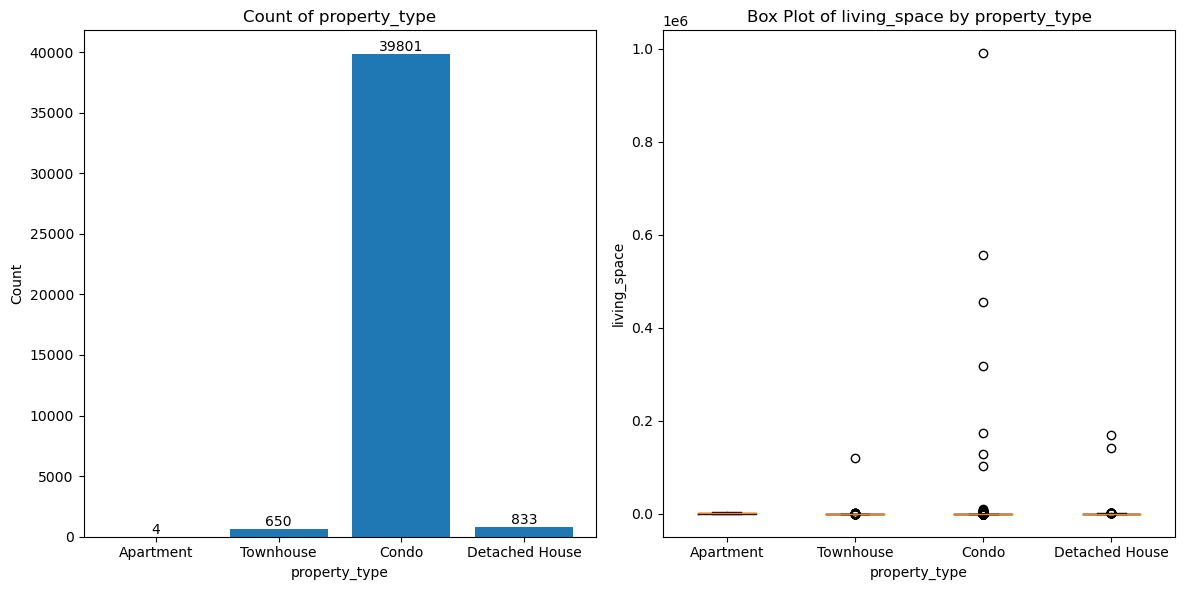

In [63]:
# Boxplot to see cluster of living space by property_type
explore_low_cardinality_categorical_relationship(ppty_df, 'property_type', 'living_space')

In [64]:
# Showing some rows with null values
show_top_rows_with_missing_values(ppty_df, 'living_space').limit(10)

living_space,bathroom_number,property_type,sub_property_type,city,floor_level,state,built_year,latitude,longitude,bedroom_number,listing_label,premium,tenure,price
null,1,Condo,For Sale,Khlong Toei,77,Bangkok,2017,13.711724,100.594785,2,NORMAL,0,Freehold,5700000
null,1,Condo,For Sale,Khlong Toei,34,Bangkok,2013,13.722473,100.58455,2,CORPORATE,0,Freehold,9200000
null,1,Condo,For Sale,Khlong Toei,12,Bangkok,1999,13.72684166,100.5734449,2,CORPORATE,0,Freehold,7500000
null,1,Condo,For Sale,Khlong Toei,27,Bangkok,1999,13.72684166,100.5734449,2,CORPORATE,0,Freehold,7700000
null,1,Condo,For Sale,Khlong Toei,14,Bangkok,2018,13.725635,100.566196,2,CORPORATE,0,Freehold,13000000
null,1,Condo,For Sale,Khlong Toei,10,Bangkok,2013,13.71523862,100.5905981,2,CORPORATE,0,Freehold,7490000
null,1,Condo,For Sale,Khlong Toei,47,Bangkok,2020,13.720791,100.57622,2,CORPORATE,0,Freehold,8480000
null,1,Condo,For Sale,Khlong Toei,5,Bangkok,2013,13.71523862,100.5905981,2,CORPORATE,0,Freehold,8500000
null,1,Condo,For Sale,Khlong Toei,31,Bangkok,2012,13.712022,100.584435,2,CORPORATE,0,Freehold,4300000
null,1,Condo,For Sale,Khlong Toei,32,Bangkok,2013,13.71523862,100.5905981,2,CORPORATE,0,Freehold,10605000


In [65]:
# Filter rows with missing values in the specified column
missing_values_df = ppty_df.filter(ppty_df['living_space'].isNull())

# Display the count of different property types for missing values
property_type_counts = (
    missing_values_df
    .groupBy("property_type")
    .count()
    .orderBy(F.col("count").desc())
)

property_type_counts.show()

+-------------+-----+
|property_type|count|
+-------------+-----+
|        Condo|   50|
+-------------+-----+



In [66]:
# Impute missing values with the mean living space of 'condo' category
condo_mean_df = ppty_df.groupBy('property_type').agg(F.mean('living_space').alias('condo_mean'))

# Join the original DataFrame with the mean values DataFrame
ppty_df = ppty_df.join(condo_mean_df, 'property_type', 'left_outer') \
    .withColumn('living_space',
                F.when(ppty_df['living_space'].isNull(), F.col('condo_mean'))
                 .otherwise(ppty_df['living_space']))

# Drop the intermediate column
ppty_df = ppty_df.drop('condo_mean')

# Check if outliers are gone
analyze_column(ppty_df, 'living_space')

Column: living_space
Data Type: DoubleType
Cardinality: 3029
Null Values: 0
Percentage of Null Values: 0.00000%


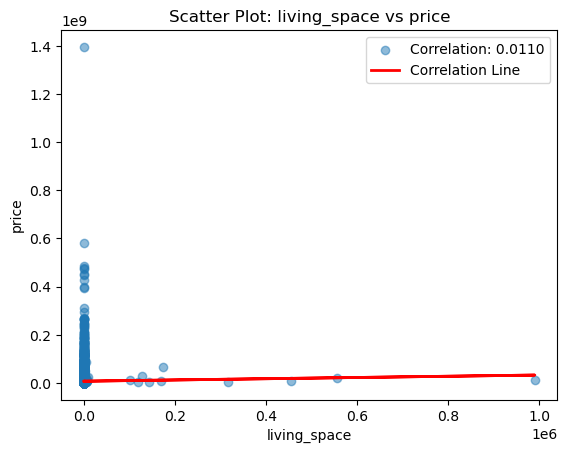

In [67]:
generate_scatterplot(ppty_df, 'living_space', 'price')

In [68]:
# Checking number of rows and columns before subsetting
num_rows = ppty_df.count()
num_cols = len(ppty_df.columns)

# Display the shape
print(f"Number of rows: {num_rows}, Number of columns: {num_cols}")

Number of rows: 41338, Number of columns: 15


In [69]:
from pyspark.sql import functions as F

# Subsetting away incorrect values using realistic living_space values
ppty_df = ppty_df.filter(
    (
        (ppty_df['property_type'].isin('Condo', 'Apartment')) & (ppty_df['living_space'] <= 200) |
        (ppty_df['property_type'] == 'Townhouse') & (ppty_df['living_space'] <= 400) |
        (ppty_df['property_type'] == 'Detached House') & (ppty_df['living_space'] <= 800)
    )
)


In [70]:
# Checking number of rows and columns after subsetting
num_rows = ppty_df.count()
num_cols = len(ppty_df.columns)

# Display the shape
print(f"Number of rows: {num_rows}, Number of columns: {num_cols}")

Number of rows: 40859, Number of columns: 15


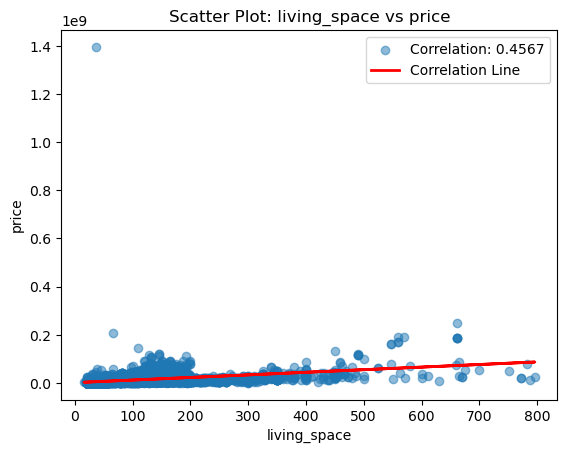

In [71]:
generate_scatterplot(ppty_df, 'living_space', 'price')

In [72]:
# Calculate the correlation coefficient
correlation_coefficient = ppty_df.corr('living_space', 'price')

print(f"Correlation Coefficient between 'living_space' and 'price': {correlation_coefficient}")

Correlation Coefficient between 'living_space' and 'price': 0.4566597749505837


- Original living_space had 50 null values
- Upon further inspection, the null values followed a pattern as all null values for living_space were for condo
- Found that most condo living_spaces were concentrated around the mean from the box plot
- Imputed the missing values of living_spaces with the mean living_space of condos
- Found that there were incorrect and unrealistic values in the living_space such as max value of condo being
  989898.0.
- Decided to subset the data based to realistic ranges to remove the unrealistic values of living_space that were too much
- Before removal of incorrect values, scatterplot correlation was only 0.0110 with price
- Correlation increased to 0.4567 after capping of living_space values

#### 2.16 Data Exploration & Cleansing of floor level (Continuous Numerical)<a id="part2.16"></a>

[Go to Start](#Start)


In [73]:
# Showing cardinality, data type and number of null values
analyze_column(ppty_df, 'floor_level')

Column: floor_level
Data Type: IntegerType
Cardinality: 219
Null Values: 0
Percentage of Null Values: 0.00000%


In [74]:
# Summary specific to see specific distribtuion 
summary_stats_df = ppty_df.groupBy("property_type").agg(
    F.count("floor_level").alias("count"),
    F.mean("floor_level").alias("mean_floor_level"),
    F.stddev("floor_level").alias("stddev_floor_level"),
    F.min("floor_level").alias("min_floor_level"),
    F.max("floor_level").alias("max_floor_level")
).orderBy("property_type")

summary_stats_df

property_type,count,mean_floor_level,stddev_floor_level,min_floor_level,max_floor_level
Apartment,1,46.0,NaN,46,46
Condo,39391,16277.474219999493,3165942.7745661796,0,628266569
Detached House,828,2.185990338164251,1.4758669241017104,1,38
Townhouse,639,2.7386541471048513,0.9228510092176131,1,5


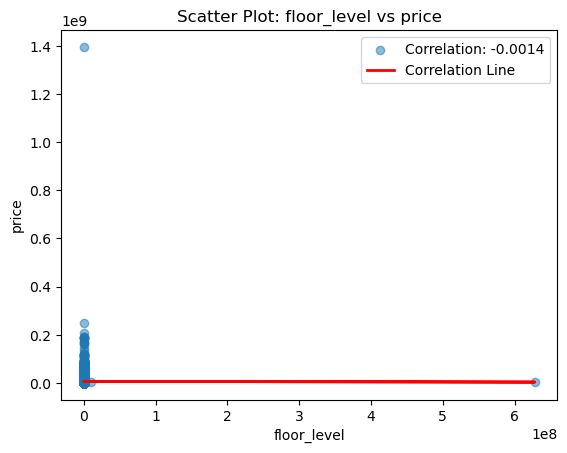

In [75]:
generate_scatterplot(ppty_df, 'floor_level', 'price')

In [76]:
# Checking number of rows and columns before subsetting
num_rows = ppty_df.count()
num_cols = len(ppty_df.columns)

# Display the shape
print(f"Number of rows: {num_rows}, Number of columns: {num_cols}")

Number of rows: 40859, Number of columns: 15


In [77]:
# Subset floor level to 92 as tallest building in Thailand currently being built is 92 floors
ppty_df = ppty_df.filter((ppty_df['floor_level'] >= 0) & (ppty_df['floor_level'] <= 92))

In [78]:
# Checking number of rows and columns after subsetting
num_rows = ppty_df.count()
num_cols = len(ppty_df.columns)

# Display the shape
print(f"Number of rows: {num_rows}, Number of columns: {num_cols}")

Number of rows: 40584, Number of columns: 15


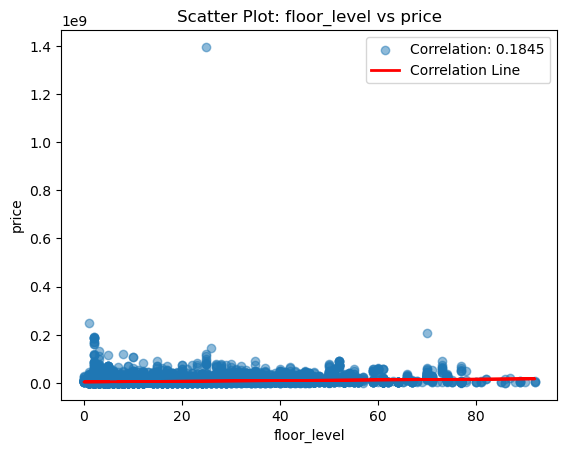

In [79]:
generate_scatterplot(ppty_df, 'floor_level', 'price')

In [80]:
# Calculate the correlation coefficient
correlation_coefficient = ppty_df.corr('floor_level', 'price')

print(f"Correlation Coefficient between 'floor_level' and 'price': {correlation_coefficient}")

Correlation Coefficient between 'floor_level' and 'price': 0.1844939597942143


 - Original floor_level had 0 null values
- Found that there were incorrect and unrealistic values in the living_space such as max value of condo being
  628266569 floors which was impossible
- Decided to subset the data based to realistic ranges to remove the unrealistic values of living_space that were too much
- Subsetted the data to a range of 0 to 92 as some properties can be on ground level and tallest building being built
  is 92 floors
- Before removal of incorrect values, scatterplot correlation was only -0.0014 with price
- Correlation increased to 0.1845 after capping of living_space values and showed that higher floors
  were generally more expensive

#### 2.17 Data Exploration & Cleansing of latitude (Continuous Numerical)<a id="part2.17"></a>

[Go to Start](#Start)


In [81]:
# Showing cardinality, data type and number of null values
analyze_column(ppty_df, 'latitude')

Column: latitude
Data Type: DoubleType
Cardinality: 1933
Null Values: 0
Percentage of Null Values: 0.00000%


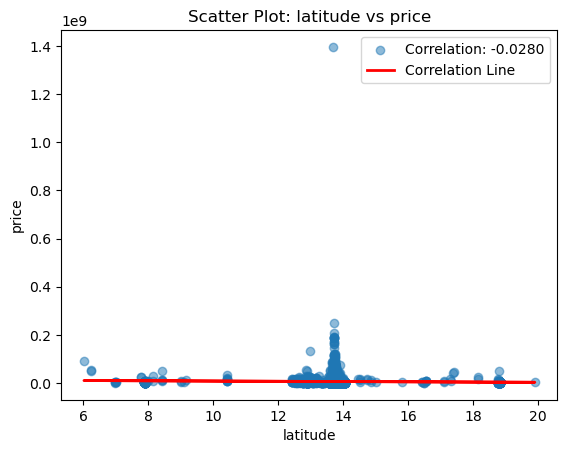

In [82]:
generate_scatterplot(ppty_df, 'latitude', 'price')

In [83]:
# Calculate the correlation coefficient
correlation_coefficient = ppty_df.corr('latitude', 'price')

print(f"Correlation Coefficient between 'latitude' and 'price': {correlation_coefficient}")

Correlation Coefficient between 'latitude' and 'price': -0.027977746422073516


- The scatterplot shows a weak correlation between latitude and price
- correlation coefficient of -0.02307
- Latitude can be necessary for price prediction as it may capture location-based variations and spatial 
  trends that impact property prices, reflecting factors such as neighborhood desirability and proximity 
  to amenities or economic centers.

#### 2.18 Data Exploration & Cleansing of longitude (Continuous Numerical)<a id="part2.18"></a>

[Go to Start](#Start)


In [84]:
# Showing cardinality, data type and number of null values
analyze_column(ppty_df, 'longitude')

Column: longitude
Data Type: DoubleType
Cardinality: 1928
Null Values: 0
Percentage of Null Values: 0.00000%


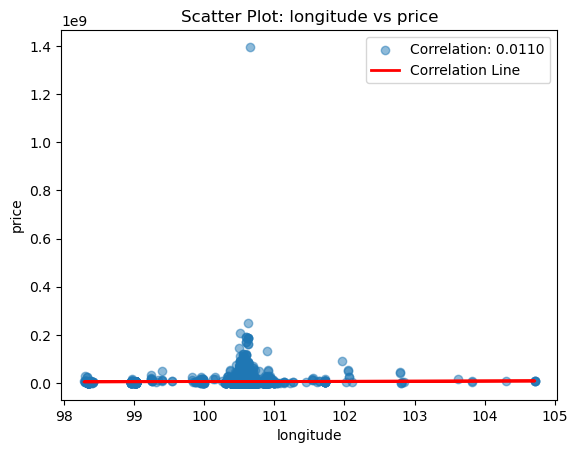

In [85]:
generate_scatterplot(ppty_df, 'longitude', 'price')

In [86]:
# Calculate the correlation coefficient
correlation_coefficient = ppty_df.corr('longitude', 'price')

print(f"Correlation Coefficient between 'longitude' and 'price': {correlation_coefficient}")

Correlation Coefficient between 'longitude' and 'price': 0.011023840952507755


- The scatterplot shows a weak correlation between longitude and price
- correlation coefficient of 0.00272 
- Longitude can be necessary for price prediction as it may capture location-based variations and spatial 
  trends that impact property prices, reflecting factors such as neighborhood desirability and proximity to 
  amenities or economic centers.

#### 2.19 Data Exploration & Cleansing of price (Continuous Numerical)<a id="part2.19"></a>

[Go to Start](#Start)


In [87]:
# Showing cardinality, data type and number of null values
analyze_column(ppty_df, 'price')

Column: price
Data Type: IntegerType
Cardinality: 3045
Null Values: 0
Percentage of Null Values: 0.00000%


In [88]:
# Display summary statistics for the "price" column
ppty_df.select("price").summary().show()

+-------+--------------------+
|summary|               price|
+-------+--------------------+
|  count|               40584|
|   mean|   5851284.756677508|
| stddev|1.0524713460352814E7|
|    min|                   0|
|    25%|             2200000|
|    50%|             3590000|
|    75%|             6350000|
|    max|          1396396324|
+-------+--------------------+



In [89]:
# Checking number of rows and columns before subsetting
num_rows = ppty_df.count()
num_cols = len(ppty_df.columns)

# Display the shape
print(f"Number of rows: {num_rows}, Number of columns: {num_cols}")

Number of rows: 40584, Number of columns: 15


In [90]:
# Subset price to realistic values as there were propertes with 0 price + properties that were too expensive
ppty_df = ppty_df.filter((ppty_df['price'] >= 100000) & (ppty_df['price'] <= 100000000))

In [91]:
# Checking number of rows and columns after subsetting
num_rows = ppty_df.count()
num_cols = len(ppty_df.columns)

# Display the shape
print(f"Number of rows: {num_rows}, Number of columns: {num_cols}")

Number of rows: 40107, Number of columns: 15


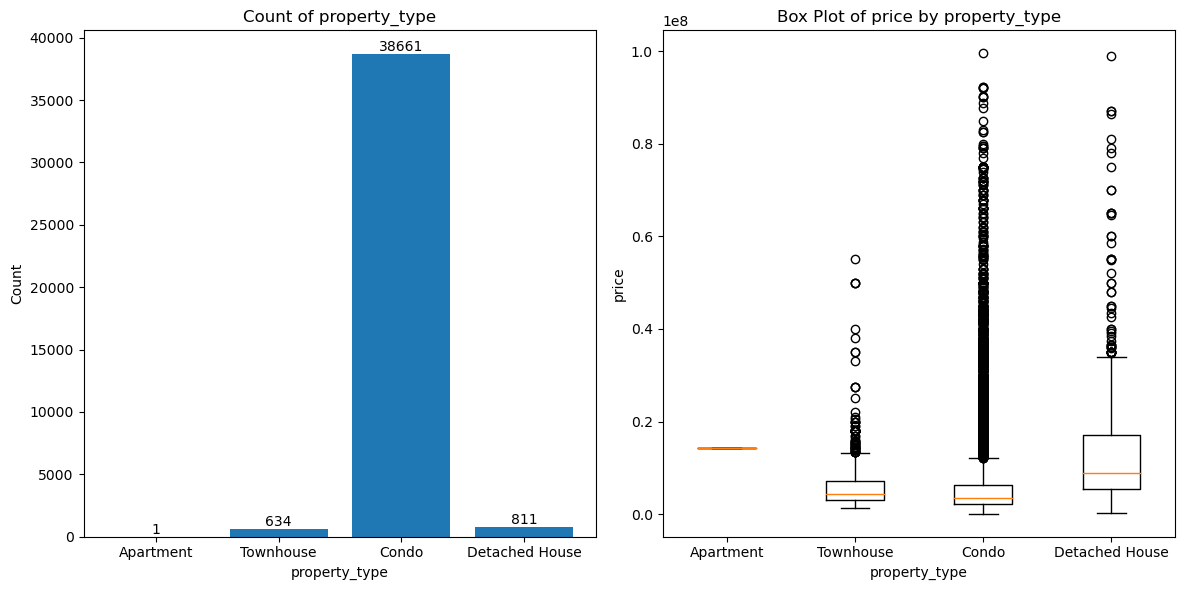

In [92]:
# Example of price distribution after subsetting
explore_low_cardinality_categorical_relationship(ppty_df, 'property_type', 'price')

- Data exploration made me find out that the price variable had incorrect and extreme values
- Original price variable had minimum value of 0 Baht and maximum value of 1396396324 Baht which were unrealistic
- After further research on Thailand properties, I subsetted the data to a range of greater than or equal to 
  100,000 Baht and less than or equal to 100000000 Baht as many properties in Thailand are prices in this range

#### 2.20 Report on Exploratory Data Analysis & Data Cleaning<a id="part2.20"></a>

[Go to Start](#Start)
    
<u>Approach<u>
    
    I meticulously examined each variable individually, establishing their relationships with the 'price' variable to 
    gain comprehensive insights. I scrutinized the distribution of prices across categorical and discrete variables, 
    employing scatterplots to assess the correlation with continuous variables.

<u>Columns Dropped<u>
    
    Columns such as 'property_id' and 'currency' were dropped due to lack of meaningful data, and 'address' was excluded 
    due to a significant number of incorrect values, including 6880 '#NAME?' entries.
    
<u>Data Errors<u>
    
    1) Duplicate Data
    I found that there were 22 duplicate rows and dropped them as they distort analysis, leading to inaccurate insights and 
    flawed conclusions.
    
    2) living_space:
    The max value for this column was condo being 989898.0 which was unrealistic as the max value for 
    apartment was 4300.0 and their sizes are similar.
    
    3) floor_level:
    The max value for this column was 628266569 floors which was too high and I limited the data to 
    0 to 92 as the tallest building being built in Thailand is 92 floors. The built_year variable also 
    showed that there are values for future values which indicates there are properties still being built.
    
    4) price:
    Throughout my data exploration, I kept finding that price had an extremly large distribution with extreme values.
    The minimum value for 
    
    Subsetting resulted in a reduction of rows 41,360 from to 40107 rows which was not much loss of information.
    
<u>Missing Values<u>
    
    I found 50 null values for the living_space and they were all missing for condos. I use mean imputation as the mean was
    within the realistic space range.

### Step 3: Data Wrangling and Transformation<a id="part3"></a>

[Go to Start](#Start)

In [93]:
ppty_df.printSchema()

root
 |-- property_type: string (nullable = true)
 |-- living_space: double (nullable = true)
 |-- bathroom_number: integer (nullable = true)
 |-- sub_property_type: string (nullable = true)
 |-- city: string (nullable = true)
 |-- floor_level: integer (nullable = true)
 |-- state: string (nullable = true)
 |-- built_year: integer (nullable = true)
 |-- latitude: double (nullable = true)
 |-- longitude: double (nullable = true)
 |-- bedroom_number: integer (nullable = true)
 |-- listing_label: string (nullable = true)
 |-- premium: integer (nullable = true)
 |-- tenure: string (nullable = true)
 |-- price: integer (nullable = true)



In [94]:
# Making Copies of Dataframe
ppty_df1 = ppty_df.alias("ppty_df1")
ppty_df2 = ppty_df.alias("ppty_df2")
ppty_df3 = ppty_df.alias("ppty_df3")

In [95]:
ppty_df1.printSchema()

root
 |-- property_type: string (nullable = true)
 |-- living_space: double (nullable = true)
 |-- bathroom_number: integer (nullable = true)
 |-- sub_property_type: string (nullable = true)
 |-- city: string (nullable = true)
 |-- floor_level: integer (nullable = true)
 |-- state: string (nullable = true)
 |-- built_year: integer (nullable = true)
 |-- latitude: double (nullable = true)
 |-- longitude: double (nullable = true)
 |-- bedroom_number: integer (nullable = true)
 |-- listing_label: string (nullable = true)
 |-- premium: integer (nullable = true)
 |-- tenure: string (nullable = true)
 |-- price: integer (nullable = true)



#### 3.1 Categorical Encoding<a id="part3.1"></a>

[Go to Start](#Start)

In [96]:
# Low cardinality Categorical columns for one-hot encoding
strings_used = ["listing_label", "sub_property_type","tenure"]

# Stage for StringIndexer
stage_string = [StringIndexer(inputCol=c, outputCol=c+"_string_encoded") for c in strings_used]

# Stage for OneHotEncoder
stage_one_hot = [OneHotEncoder(inputCol=c+"_string_encoded", outputCol=c+"_one_hot") for c in strings_used]

# Create a pipeline
pipeline = Pipeline(stages=stage_string + stage_one_hot)

# Fit and transform the DataFrame
ppty_df1 = pipeline.fit(ppty_df1).transform(ppty_df1)

# # Show the resulting DataFrame
# ppty_df1.limit(5).show()

# Show the resulting DataFrame
ppty_df1.limit(5)


property_type,living_space,bathroom_number,sub_property_type,city,floor_level,state,built_year,latitude,longitude,bedroom_number,listing_label,premium,tenure,price,listing_label_string_encoded,sub_property_type_string_encoded,tenure_string_encoded,listing_label_one_hot,sub_property_type_one_hot,tenure_one_hot
Condo,28.0,1,For Sale,Huai Khwang,7,Bangkok,2015,13.783881,100.585884,1,CORPORATE,0,Freehold,1600000,0.0,0.0,0.0,"(2,[0],[1.0])","(1,[0],[1.0])","(2,[0],[1.0])"
Condo,23.0,1,For Sale,Bang Khae,15,Bangkok,2016,13.70916533,100.3829791,1,CORPORATE,0,Freehold,1590000,0.0,0.0,0.0,"(2,[0],[1.0])","(1,[0],[1.0])","(2,[0],[1.0])"
Condo,53.0,2,For Sale,Huai Khwang,8,Bangkok,2014,13.755804,100.565882,2,CORPORATE,0,Freehold,6690000,0.0,0.0,0.0,"(2,[0],[1.0])","(1,[0],[1.0])","(2,[0],[1.0])"
Condo,52.0,2,For Sale,Din Daeng,3,Bangkok,2010,13.75682,100.561336,2,CORPORATE,0,Freehold,3250000,0.0,0.0,0.0,"(2,[0],[1.0])","(1,[0],[1.0])","(2,[0],[1.0])"
Condo,31.0,1,For Sale,Suan Luang,7,Bangkok,2012,13.711162,100.603783,1,CORPORATE,0,Freehold,2490000,0.0,0.0,0.0,"(2,[0],[1.0])","(1,[0],[1.0])","(2,[0],[1.0])"


In [97]:
# Drop unnecessary columns
columns_to_drop = ["listing_label", "sub_property_type","tenure",
                   "listing_label_string_encoded", "sub_property_type_string_encoded", 
                   "tenure_string_encoded"]

# Drop the specified columns from the DataFrame
ppty_df1 = ppty_df1.drop(*columns_to_drop)

# # Show the resulting DataFrame
# ppty_df1.limit(5).show()

# Show the resulting DataFrame
ppty_df1.limit(5)

property_type,living_space,bathroom_number,city,floor_level,state,built_year,latitude,longitude,bedroom_number,premium,price,listing_label_one_hot,sub_property_type_one_hot,tenure_one_hot
Condo,28.0,1,Huai Khwang,7,Bangkok,2015,13.783881,100.585884,1,0,1600000,"(2,[0],[1.0])","(1,[0],[1.0])","(2,[0],[1.0])"
Condo,23.0,1,Bang Khae,15,Bangkok,2016,13.70916533,100.3829791,1,0,1590000,"(2,[0],[1.0])","(1,[0],[1.0])","(2,[0],[1.0])"
Condo,53.0,2,Huai Khwang,8,Bangkok,2014,13.755804,100.565882,2,0,6690000,"(2,[0],[1.0])","(1,[0],[1.0])","(2,[0],[1.0])"
Condo,52.0,2,Din Daeng,3,Bangkok,2010,13.75682,100.561336,2,0,3250000,"(2,[0],[1.0])","(1,[0],[1.0])","(2,[0],[1.0])"
Condo,31.0,1,Suan Luang,7,Bangkok,2012,13.711162,100.603783,1,0,2490000,"(2,[0],[1.0])","(1,[0],[1.0])","(2,[0],[1.0])"


In [98]:
# Ordinal Encoding
property_type_order = ["Apartment", "Condo", "Townhouse", "Detached House"]

# Create a new column for ordinal encoding
ppty_df1 = ppty_df1.withColumn(
    "property_type_ordinal_encoded",
    F.when(ppty_df1["property_type"] == property_type_order[0], 0)
    .when(ppty_df1["property_type"] == property_type_order[1], 1)
    .when(ppty_df1["property_type"] == property_type_order[2], 2)
    .when(ppty_df1["property_type"] == property_type_order[3], 3)
    .otherwise(None)  # Handle other values or nulls as needed
)

# Drop original column
ppty_df1 = ppty_df1.drop('property_type')

# # Show the resulting DataFrame
# ppty_df1.limit(5).show()

# Show the resulting DataFrame
ppty_df1.limit(5)

living_space,bathroom_number,city,floor_level,state,built_year,latitude,longitude,bedroom_number,premium,price,listing_label_one_hot,sub_property_type_one_hot,tenure_one_hot,property_type_ordinal_encoded
28.0,1,Huai Khwang,7,Bangkok,2015,13.783881,100.585884,1,0,1600000,"(2,[0],[1.0])","(1,[0],[1.0])","(2,[0],[1.0])",1
23.0,1,Bang Khae,15,Bangkok,2016,13.70916533,100.3829791,1,0,1590000,"(2,[0],[1.0])","(1,[0],[1.0])","(2,[0],[1.0])",1
53.0,2,Huai Khwang,8,Bangkok,2014,13.755804,100.565882,2,0,6690000,"(2,[0],[1.0])","(1,[0],[1.0])","(2,[0],[1.0])",1
52.0,2,Din Daeng,3,Bangkok,2010,13.75682,100.561336,2,0,3250000,"(2,[0],[1.0])","(1,[0],[1.0])","(2,[0],[1.0])",1
31.0,1,Suan Luang,7,Bangkok,2012,13.711162,100.603783,1,0,2490000,"(2,[0],[1.0])","(1,[0],[1.0])","(2,[0],[1.0])",1


In [99]:
# Summary specific to see specific distribtuion 
summary_stats_df = ppty_df.groupBy("state").agg(
    F.count("price").alias("count"),
    F.mean("price").alias("mean_price"),
    F.stddev("price").alias("stddev_price"),
    F.min("price").alias("min_price"),
    F.max("price").alias("max_price")
).orderBy("state")

summary_stats_df

state,count,mean_price,stddev_price,min_price,max_price
Bangkok,35390,6112545.707092399,7242344.925921744,110000,99500000
Chiang Mai,308,2558732.077922078,1007879.0102331825,899000,8500000
Chon Buri,617,5195399.922204214,4631288.3565239115,600000,52000000
Khon Kaen,3,2013333.3333333333,693565.6662013578,1490000,2800000
Nakhon Pathom,38,4455865.52631579,6218470.584509006,450000,30360000
Nakhon Ratchasima,3,1.1166666666666666E7,7653975.002136689,2500000,17000000
Nonthaburi,1497,2807591.3527054107,3512956.1589040714,308350,75000000
Pathum Thani,187,2151331.0160427806,2384526.1194195636,260000,18500000
Pattaya,42,7300156.071428572,4172554.700216283,2590000,20000000
Phetchaburi,48,5990885.416666667,4565052.826754517,1350000,25000000


In [100]:
# Mean Encoding (For high cardinality)
categorical_columns = ['state', 'city']

# Create a pipeline for mean encoding
stages = []

for column in categorical_columns:
    # StringIndexer to convert categorical values to numerical indices
    indexer = StringIndexer(inputCol=column, outputCol=column + "_index")
    
    # Calculate mean price for each category
    mean_price_by_category = (
        ppty_df1.groupBy(column)
        .agg(F.mean("price").alias("mean_price_" + column))
        .persist()  # Cache the DataFrame to ensure correct join
    )
    
    # Join mean prices back to the DataFrame
    ppty_df1 = ppty_df1.join(mean_price_by_category, column, "left_outer")
    
    # Drop the original categorical column and rename the mean-encoded column
    ppty_df1 = ppty_df1.drop(column).withColumnRenamed("mean_price_" + column, column)

    stages.extend([indexer])

# Create a pipeline
pipeline = Pipeline(stages=stages)

# Fit and transform the DataFrame
ppty_df1 = pipeline.fit(ppty_df1).transform(ppty_df1)

# Drop the intermediate index columns if needed
for column in categorical_columns:
    ppty_df1 = ppty_df1.drop(column + "_index")

# # Show the resulting DataFrame
# ppty_df1.limit(5).show()

# Show the resulting DataFrame
ppty_df1.limit(5)

living_space,bathroom_number,floor_level,built_year,latitude,longitude,bedroom_number,premium,price,listing_label_one_hot,sub_property_type_one_hot,tenure_one_hot,property_type_ordinal_encoded,state,city
28.0,1,7,2015,13.783881,100.585884,1,0,1600000,"(2,[0],[1.0])","(1,[0],[1.0])","(2,[0],[1.0])",1,6112545.707092399,4379023.526452732
23.0,1,15,2016,13.70916533,100.3829791,1,0,1590000,"(2,[0],[1.0])","(1,[0],[1.0])","(2,[0],[1.0])",1,6112545.707092399,2037291.6666666667
53.0,2,8,2014,13.755804,100.565882,2,0,6690000,"(2,[0],[1.0])","(1,[0],[1.0])","(2,[0],[1.0])",1,6112545.707092399,4379023.526452732
52.0,2,3,2010,13.75682,100.561336,2,0,3250000,"(2,[0],[1.0])","(1,[0],[1.0])","(2,[0],[1.0])",1,6112545.707092399,3319870.217162872
31.0,1,7,2012,13.711162,100.603783,1,0,2490000,"(2,[0],[1.0])","(1,[0],[1.0])","(2,[0],[1.0])",1,6112545.707092399,2755265.625783972


#### 3.2 Numerical Transformation<a id="part3.2"></a>

[Go to Start](#Start)

In [101]:
# Checking summary of the columns to have a better understanding of the distribution of values before transformation
spark.conf.set('spark.sql.repl.eagerEval.enabled', True) # used to view the data more clearly
ppty_df1['living_space','floor_level'].summary()

summary,living_space,floor_level
count,40107,40107
mean,49.488376334600574,16.421123494651805
stddev,43.54675327932765,13.782626183909617
min,16.0,0
25%,29.62,5
50%,35.0,12
75%,53.0,26
max,796.0,92


##### 3.2.1 living_space Transformation<a id="part3.2.1"></a>

[Go to Start](#Start)

In [102]:

column_name = "living_space"  # Replace with the actual column name

skewness_value = ppty_df1.agg(F.skewness(F.col(column_name))).collect()[0][0]
std_deviation_value = ppty_df1.agg(F.stddev(F.col(column_name))).collect()[0][0]

print(f"Skewness of {column_name}: {skewness_value}")
print(f"Standard Deviation of {column_name}: {std_deviation_value}")

Skewness of living_space: 5.3329560025238605
Standard Deviation of living_space: 43.54675327932765


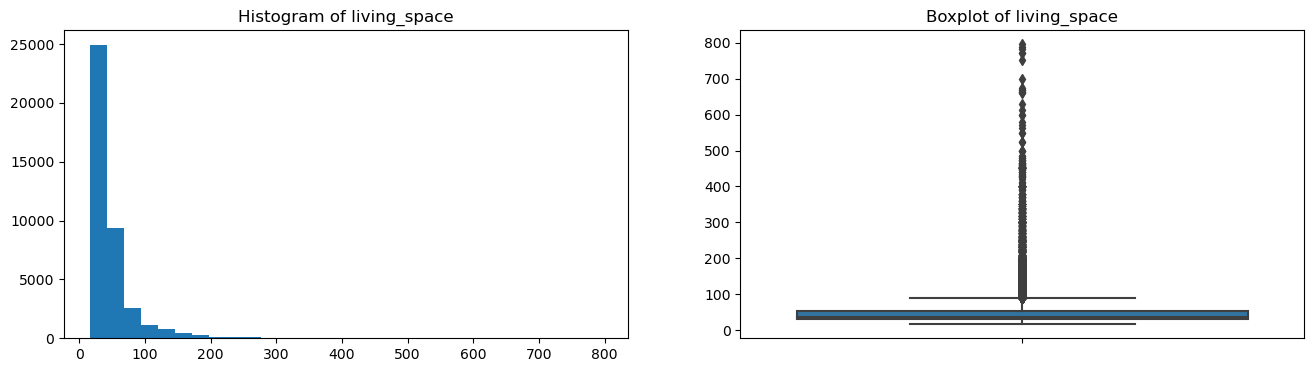

In [103]:
# Distribution before Transformation
diagnostic_plots_spark(ppty_df1, ['living_space']) 

###### Logarithmic Transformation Test

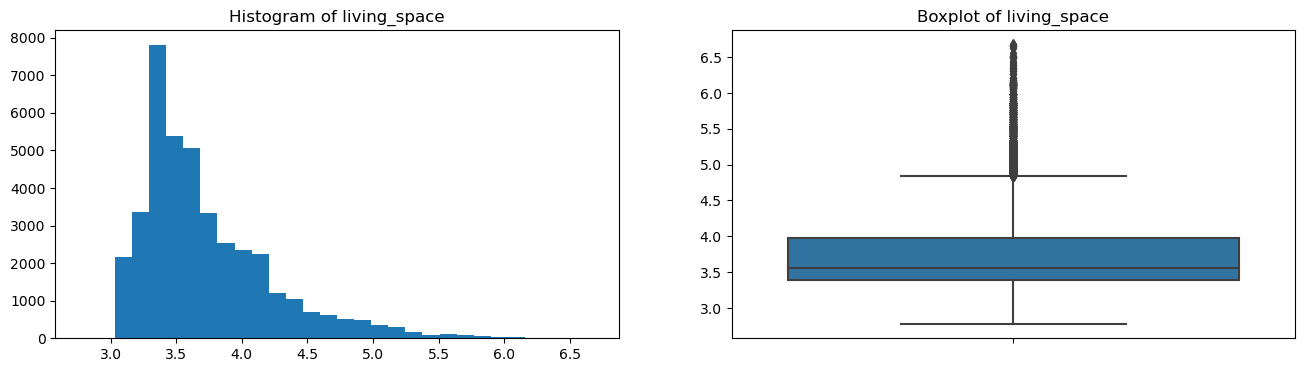

In [104]:
ppty_df1_log_test = ppty_df1.withColumn('living_space', log(ppty_df1['living_space']))
diagnostic_plots_spark(ppty_df1_log_test, ['living_space']) 

In [105]:
column_name = "living_space"  # Replace with the actual column name

skewness_value = ppty_df1_log_test.agg(F.skewness(F.col(column_name))).collect()[0][0]
std_deviation_value = ppty_df1_log_test.agg(F.stddev(F.col(column_name))).collect()[0][0]

print(f"Skewness of {column_name}: {skewness_value}")
print(f"Standard Deviation of {column_name}: {std_deviation_value}")

Skewness of living_space: 1.54053595532593
Standard Deviation of living_space: 0.5118966357955184


###### Reciprocal Transformation Test

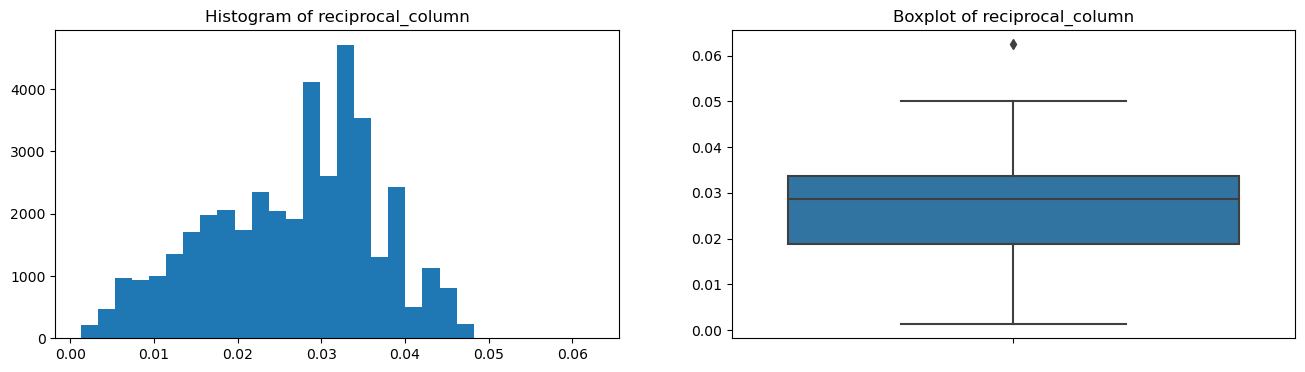

In [106]:
column_name = "living_space"

# Apply reciprocal transformation using expr
ppty_df1_reciprocal = ppty_df1.withColumn("reciprocal_column", expr(f"1 / {column_name}"))

diagnostic_plots_spark(ppty_df1_reciprocal, ['reciprocal_column']) 

In [107]:
column_name = "reciprocal_column"  # Replace with the actual column name

skewness_value = ppty_df1_reciprocal.agg(F.skewness(F.col(column_name))).collect()[0][0]
std_deviation_value = ppty_df1_reciprocal.agg(F.stddev(F.col(column_name))).collect()[0][0]

print(f"Skewness of {column_name}: {skewness_value}")
print(f"Standard Deviation of {column_name}: {std_deviation_value}")

Skewness of reciprocal_column: -0.31368218536431436
Standard Deviation of reciprocal_column: 0.010148592289834486


###### Box-Cox Transformation Test

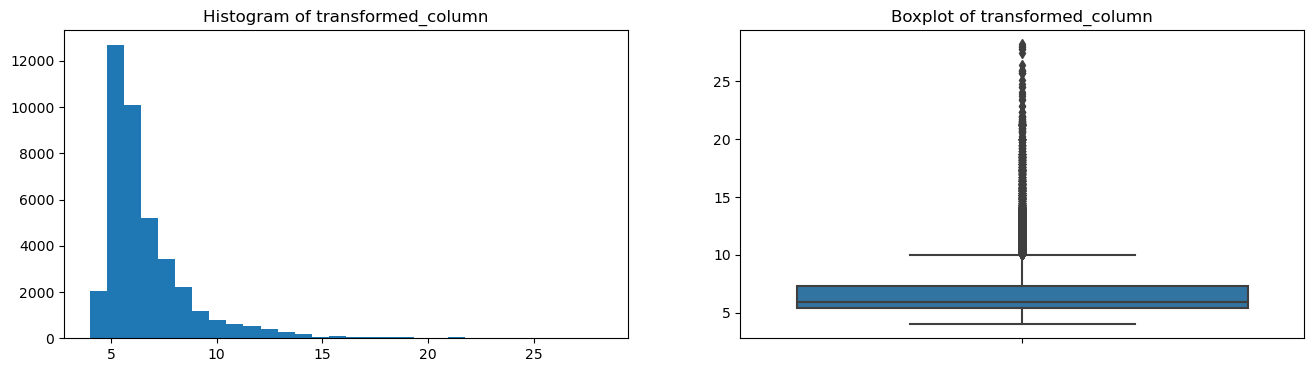

In [108]:
# Apply Box-Cox transformation using expr with lambda value of 0.5
column_name = 'living_space'
lambda_value = 0.5  # You need to provide the lambda value
ppty_df1_boxcox_test = ppty_df1.withColumn("transformed_column", expr(f"pow({column_name}, {lambda_value})"))

diagnostic_plots_spark(ppty_df1_boxcox_test, ['transformed_column']) 

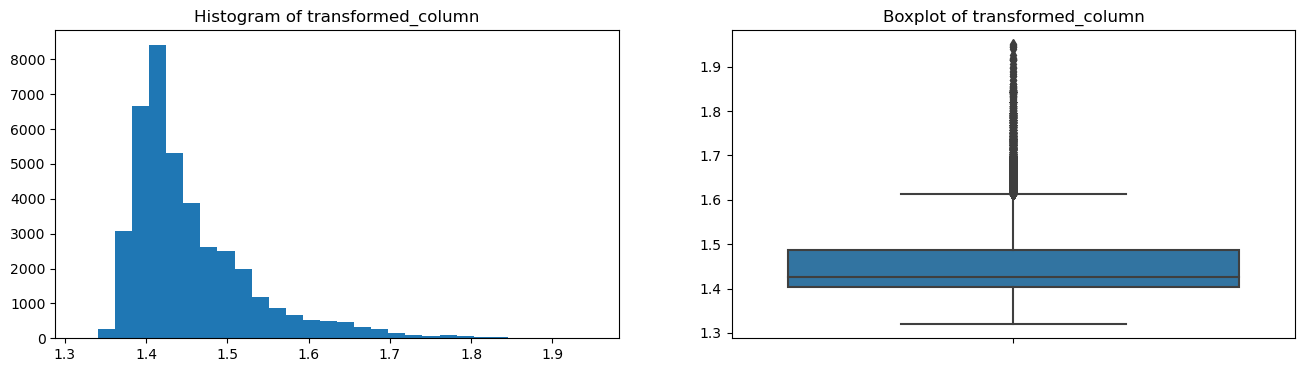

In [109]:
# Apply Box-Cox transformation using expr with lambda value of 0.1
column_name = 'living_space'
lambda_value = 0.1  # You need to provide the lambda value
ppty_df1_boxcox_test1 = ppty_df1.withColumn("transformed_column", expr(f"pow({column_name}, {lambda_value})"))

diagnostic_plots_spark(ppty_df1_boxcox_test1, ['transformed_column']) 

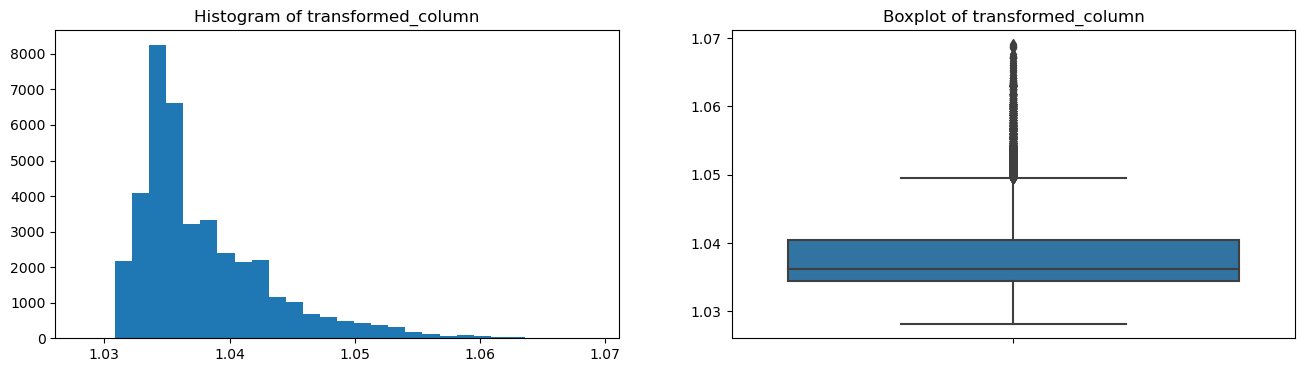

In [110]:
# Apply Box-Cox transformation using expr with lambda value of 0.01
column_name = 'living_space'
lambda_value = 0.01  # You need to provide the lambda value
ppty_df1_boxcox_test2 = ppty_df1.withColumn("transformed_column", expr(f"pow({column_name}, {lambda_value})"))

diagnostic_plots_spark(ppty_df1_boxcox_test2, ['transformed_column']) 

In [111]:
column_name = "transformed_column"  # Replace with the actual column name

skewness_value = ppty_df1_boxcox_test2.agg(F.skewness(F.col(column_name))).collect()[0][0]
std_deviation_value = ppty_df1_boxcox_test2.agg(F.stddev(F.col(column_name))).collect()[0][0]

print(f"Skewness of {column_name}: {skewness_value}")
print(f"Standard Deviation of {column_name}: {std_deviation_value}")

Skewness of transformed_column: 1.5591592658952202
Standard Deviation of transformed_column: 0.005334507505870322


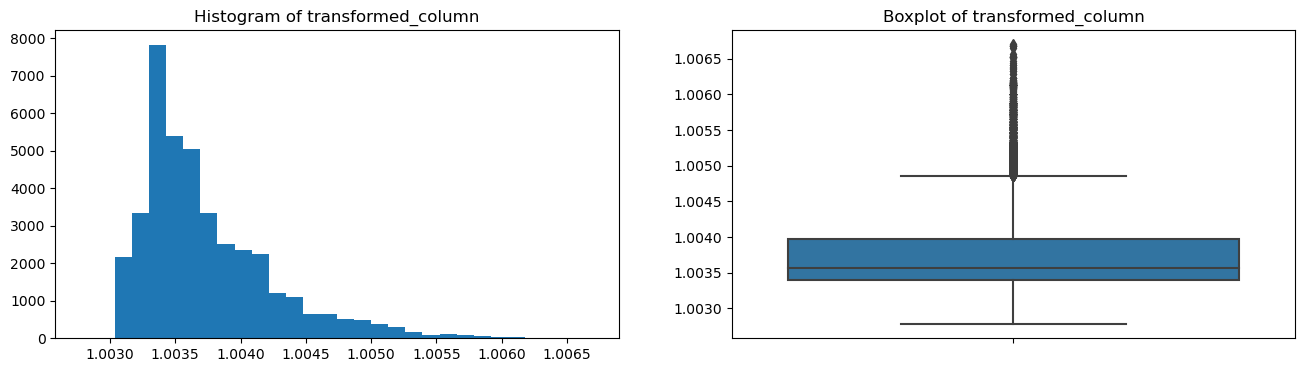

In [112]:
# Apply Box-Cox transformation using expr with lambda value of 0.001
column_name = 'living_space'
lambda_value = 0.001  # You need to provide the lambda value
ppty_df1_boxcox_test3 = ppty_df1.withColumn("transformed_column", expr(f"pow({column_name}, {lambda_value})"))

diagnostic_plots_spark(ppty_df1_boxcox_test3, ['transformed_column']) 

In [113]:
column_name = "transformed_column"  # Replace with the actual column name

skewness_value = ppty_df1_boxcox_test3.agg(F.skewness(F.col(column_name))).collect()[0][0]
std_deviation_value = ppty_df1_boxcox_test3.agg(F.stddev(F.col(column_name))).collect()[0][0]

print(f"Skewness of {column_name}: {skewness_value}")
print(f"Standard Deviation of {column_name}: {std_deviation_value}")

Skewness of transformed_column: 1.5423889630456882
Standard Deviation of transformed_column: 0.0005140110858644555


###### Square Root Transformation Test

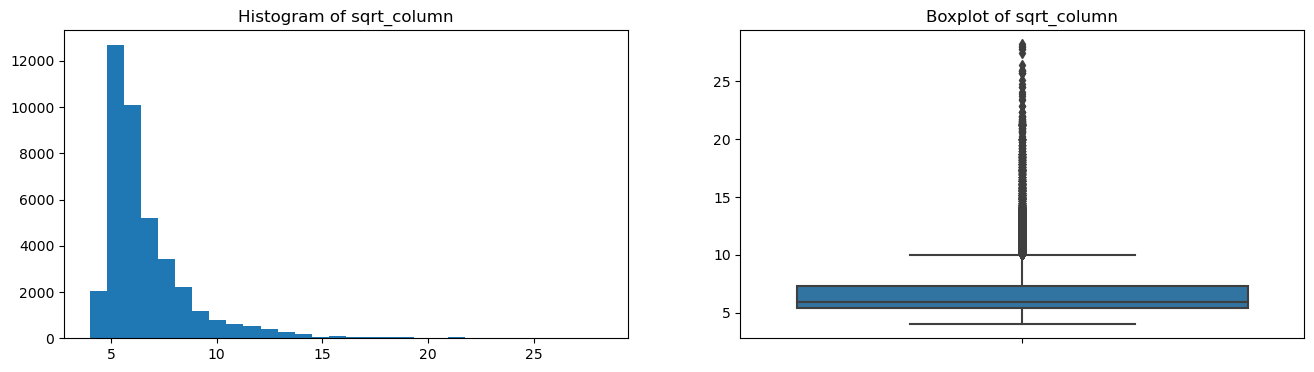

In [114]:
column_name = "living_space"

# Apply square root transformation using expr
ppty_df1_sqrRoot = ppty_df1.withColumn("sqrt_column", expr(f"SQRT({column_name})"))

diagnostic_plots_spark(ppty_df1_sqrRoot, ['sqrt_column'])

In [115]:
column_name = "sqrt_column"  # Replace with the actual column name

skewness_value = ppty_df1_sqrRoot.agg(F.skewness(F.col(column_name))).collect()[0][0]
std_deviation_value = ppty_df1_sqrRoot.agg(F.stddev(F.col(column_name))).collect()[0][0]

print(f"Skewness of {column_name}: {skewness_value}")
print(f"Standard Deviation of {column_name}: {std_deviation_value}")

Skewness of sqrt_column: 2.8182991698973416
Standard Deviation of sqrt_column: 2.1597791143449703


###### Power Transformation Test

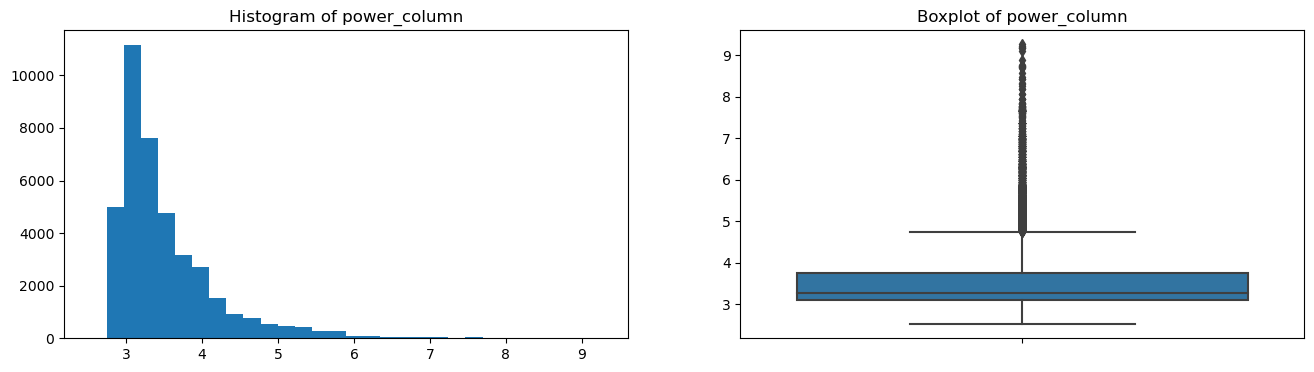

In [116]:
# Power = 1/3
column_name = "living_space"

# Apply cube root transformation using expr
ppty_df1_power = ppty_df1.withColumn("power_column", expr(f"POWER({column_name}, 1/3)"))

diagnostic_plots_spark(ppty_df1_power, ['power_column'])

In [117]:
column_name = "power_column"  # Replace with the actual column name

skewness_value = ppty_df1_power.agg(F.skewness(F.col(column_name))).collect()[0][0]
std_deviation_value = ppty_df1_power.agg(F.stddev(F.col(column_name))).collect()[0][0]

print(f"Skewness of {column_name}: {skewness_value}")
print(f"Standard Deviation of {column_name}: {std_deviation_value}")

Skewness of power_column: 2.2982191119604862
Standard Deviation of power_column: 0.6951437368836305


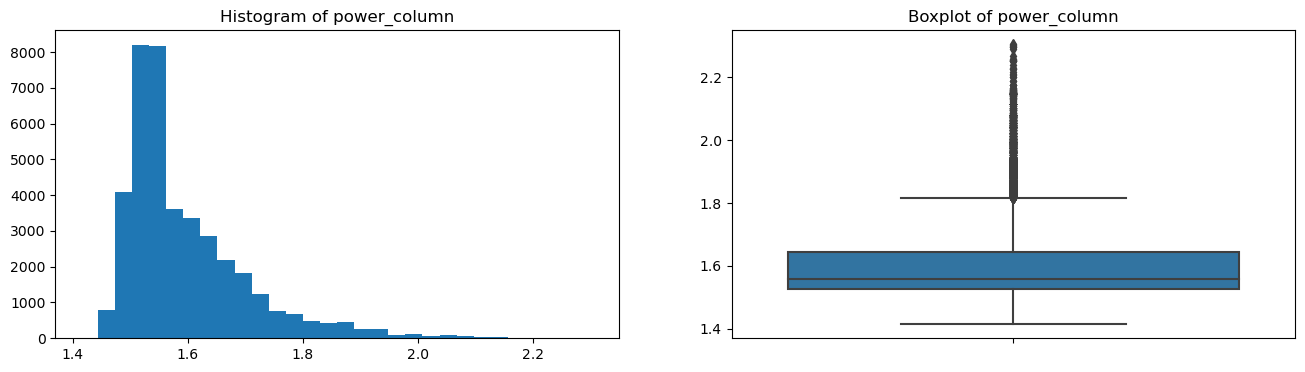

In [118]:
# Power = 1/8
column_name = "living_space"

# Apply cube root transformation using expr
ppty_df1_power2 = ppty_df1.withColumn("power_column", expr(f"POWER({column_name}, 1/8)"))

diagnostic_plots_spark(ppty_df1_power2, ['power_column'])

In [119]:
column_name = "power_column"  # Replace with the actual column name

skewness_value = ppty_df1_power2.agg(F.skewness(F.col(column_name))).collect()[0][0]
std_deviation_value = ppty_df1_power2.agg(F.stddev(F.col(column_name))).collect()[0][0]

print(f"Skewness of {column_name}: {skewness_value}")
print(f"Standard Deviation of {column_name}: {std_deviation_value}")

Skewness of power_column: 1.789362825925586
Standard Deviation of power_column: 0.10755542706803417


##### 3.2.2 floor_level Transfomation<a id="part3.2.2"></a>

[Go to Start](#Start)

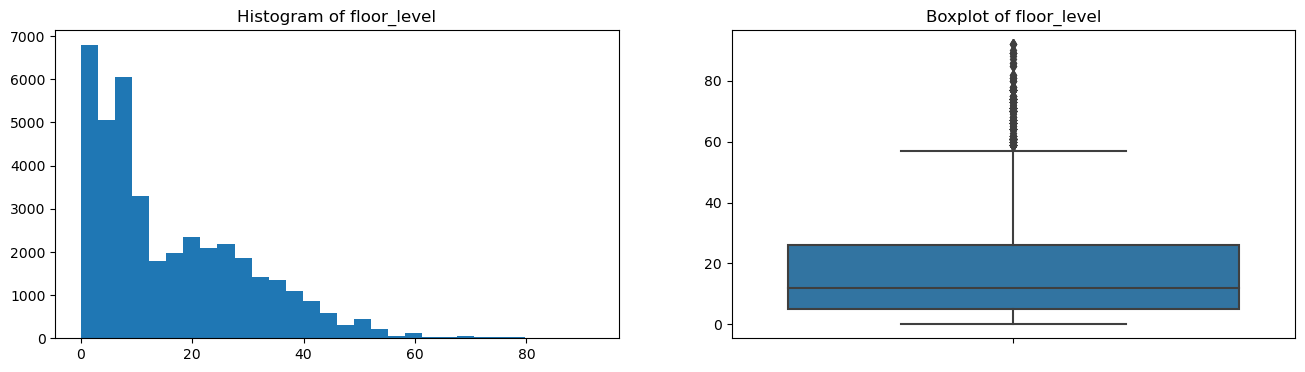

In [120]:
# Distribution before Transformation
diagnostic_plots_spark(ppty_df1, ['floor_level']) 

In [121]:
column_name = "floor_level"  # Replace with the actual column name

skewness_value = ppty_df1.agg(F.skewness(F.col(column_name))).collect()[0][0]
std_deviation_value = ppty_df1.agg(F.stddev(F.col(column_name))).collect()[0][0]

print(f"Skewness of {column_name}: {skewness_value}")
print(f"Standard Deviation of {column_name}: {std_deviation_value}")

Skewness of floor_level: 1.0954817968366415
Standard Deviation of floor_level: 13.782626183909617


###### Logarithmic Transformation Test (Cannot use as floor_level as 0 values)

In [122]:
# ppty_df1_log_test = ppty_df1.withColumn('floor_level', log(ppty_df1['floor_level']))
# diagnostic_plots_spark(ppty_df1_log_test, ['floor_level']) 

In [123]:
# # Checking skewness of new transformation
# column_name = "floor_level"  # Replace with the actual column name

# skewness_value = ppty_df1_log_test.agg(F.skewness(F.col(column_name))).collect()[0][0]
# std_deviation_value = ppty_df1_log_test.agg(F.stddev(F.col(column_name))).collect()[0][0]

# print(f"Skewness of {column_name}: {skewness_value}")
# print(f"Standard Deviation of {column_name}: {std_deviation_value}")

###### Reciprocal Transformation Test (Cannot use as floor_level as 0 values)

In [124]:
# column_name = "floor_level"

# # Apply reciprocal transformation using expr
# ppty_df1_reciprocal = ppty_df1.withColumn("floor_reciprocal_column", expr(f"1 / {column_name}"))

# diagnostic_plots_spark(ppty_df1_reciprocal, ['floor_reciprocal_column']) 

In [125]:
# # Checking skewness of new transformation
# column_name = "floor_reciprocal_column"  # Replace with the actual column name

# skewness_value = ppty_df1_reciprocal.agg(F.skewness(F.col(column_name))).collect()[0][0]
# std_deviation_value = ppty_df1_reciprocal.agg(F.stddev(F.col(column_name))).collect()[0][0]

# print(f"Skewness of {column_name}: {skewness_value}")
# print(f"Standard Deviation of {column_name}: {std_deviation_value}")

###### Box-Cox Transformation Test

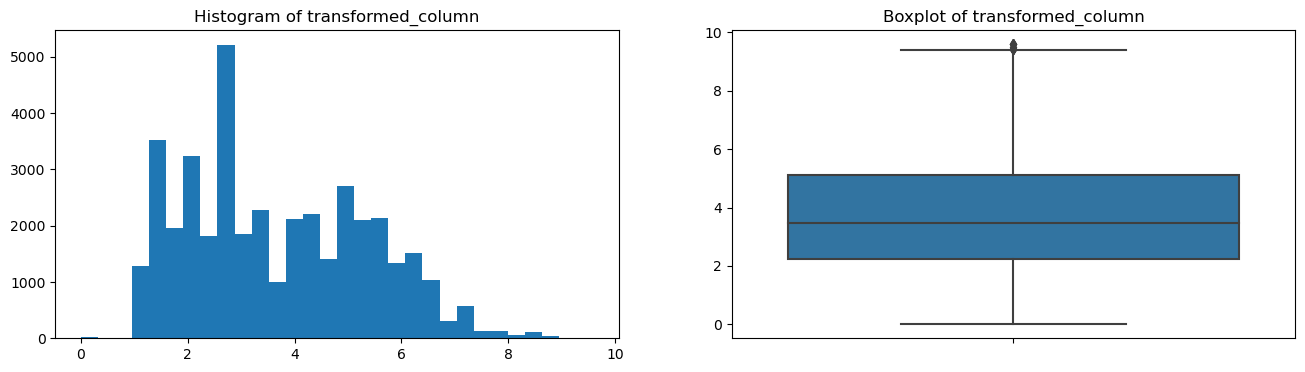

In [126]:
# Apply Box-Cox transformation using expr with lambda value of 0.5
column_name = 'floor_level'
lambda_value = 0.5  # You need to provide the lambda value
ppty_df1_boxcox_test = ppty_df1.withColumn("transformed_column", expr(f"pow({column_name}, {lambda_value})"))

diagnostic_plots_spark(ppty_df1_boxcox_test, ['transformed_column']) 

In [127]:
# Checking skewness of new transformation
column_name = "transformed_column"  # Replace with the actual column name

skewness_value = ppty_df1_boxcox_test.agg(F.skewness(F.col(column_name))).collect()[0][0]
std_deviation_value = ppty_df1_boxcox_test.agg(F.stddev(F.col(column_name))).collect()[0][0]

print(f"Skewness of {column_name}: {skewness_value}")
print(f"Standard Deviation of {column_name}: {std_deviation_value}")

Skewness of transformed_column: 0.34056064081889836
Standard Deviation of transformed_column: 1.6935113201188026


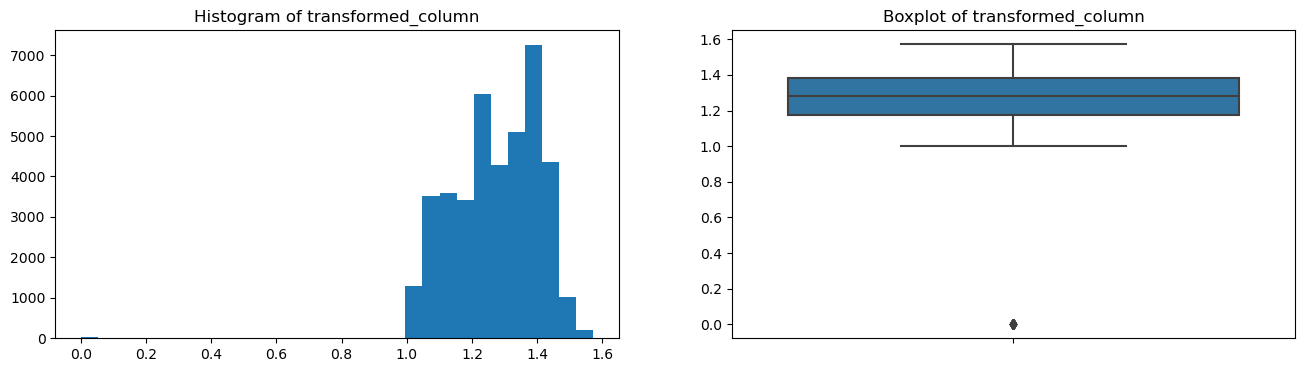

In [128]:
# Apply Box-Cox transformation using expr with lambda value of 0.1
column_name = 'floor_level'
lambda_value = 0.1  # You need to provide the lambda value
ppty_df1_boxcox_test1 = ppty_df1.withColumn("transformed_column", expr(f"pow({column_name}, {lambda_value})"))

diagnostic_plots_spark(ppty_df1_boxcox_test1, ['transformed_column']) 

In [129]:
# Checking skewness of new transformation
column_name = "transformed_column"  # Replace with the actual column name

skewness_value = ppty_df1_boxcox_test1.agg(F.skewness(F.col(column_name))).collect()[0][0]
std_deviation_value = ppty_df1_boxcox_test1.agg(F.stddev(F.col(column_name))).collect()[0][0]

print(f"Skewness of {column_name}: {skewness_value}")
print(f"Standard Deviation of {column_name}: {std_deviation_value}")

Skewness of transformed_column: -0.8953100012235824
Standard Deviation of transformed_column: 0.13219435829265752


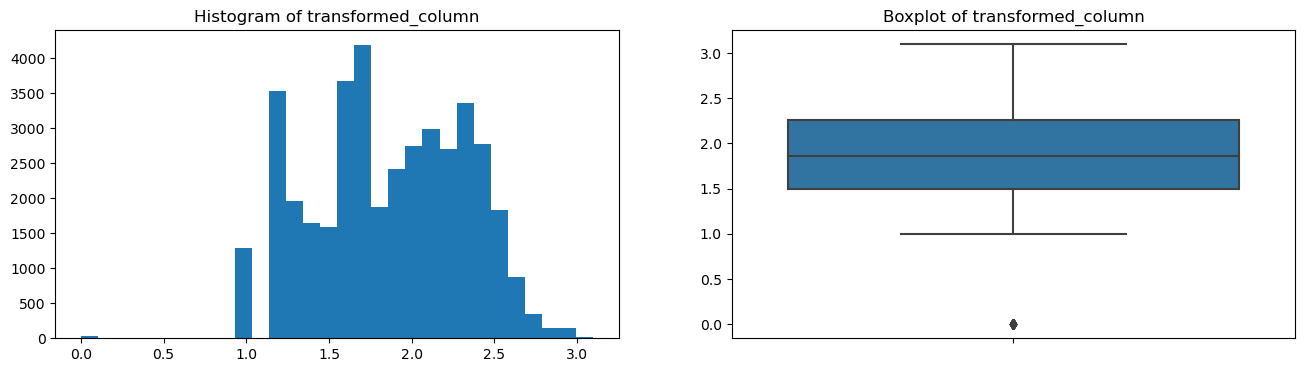

In [130]:
# Apply Box-Cox transformation using expr with lambda value of 0.25
column_name = 'floor_level'
lambda_value = 0.25  # You need to provide the lambda value
ppty_df1_boxcox_test2 = ppty_df1.withColumn("transformed_column", expr(f"pow({column_name}, {lambda_value})"))

diagnostic_plots_spark(ppty_df1_boxcox_test2, ['transformed_column']) 

In [131]:
# Checking skewness of new transformation
column_name = "transformed_column"  # Replace with the actual column name

skewness_value = ppty_df1_boxcox_test2.agg(F.skewness(F.col(column_name))).collect()[0][0]
std_deviation_value = ppty_df1_boxcox_test2.agg(F.stddev(F.col(column_name))).collect()[0][0]

print(f"Skewness of {column_name}: {skewness_value}")
print(f"Standard Deviation of {column_name}: {std_deviation_value}")

Skewness of transformed_column: -0.07587311684653936
Standard Deviation of transformed_column: 0.45435617897522973


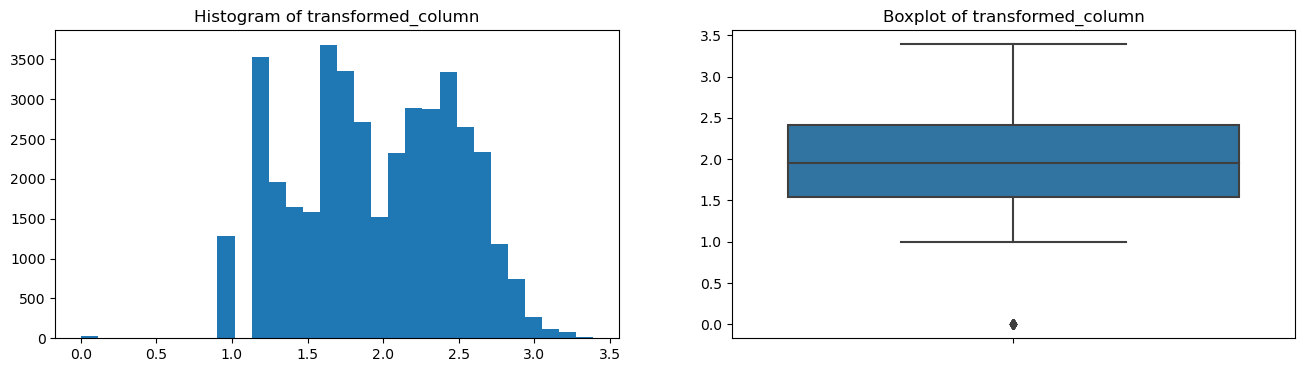

In [132]:
# Apply Box-Cox transformation using expr with lambda value of 0.27
column_name = 'floor_level'
lambda_value = 0.27  # You need to provide the lambda value
ppty_df1_boxcox_test3 = ppty_df1.withColumn("transformed_column", expr(f"pow({column_name}, {lambda_value})"))

diagnostic_plots_spark(ppty_df1_boxcox_test3, ['transformed_column']) 

In [133]:
# Checking skewness of new transformation
column_name = "transformed_column"  # Replace with the actual column name

skewness_value = ppty_df1_boxcox_test3.agg(F.skewness(F.col(column_name))).collect()[0][0]
std_deviation_value = ppty_df1_boxcox_test3.agg(F.stddev(F.col(column_name))).collect()[0][0]

print(f"Skewness of {column_name}: {skewness_value}")
print(f"Standard Deviation of {column_name}: {std_deviation_value}")

Skewness of transformed_column: -0.03580681835319939
Standard Deviation of transformed_column: 0.5144239028477433


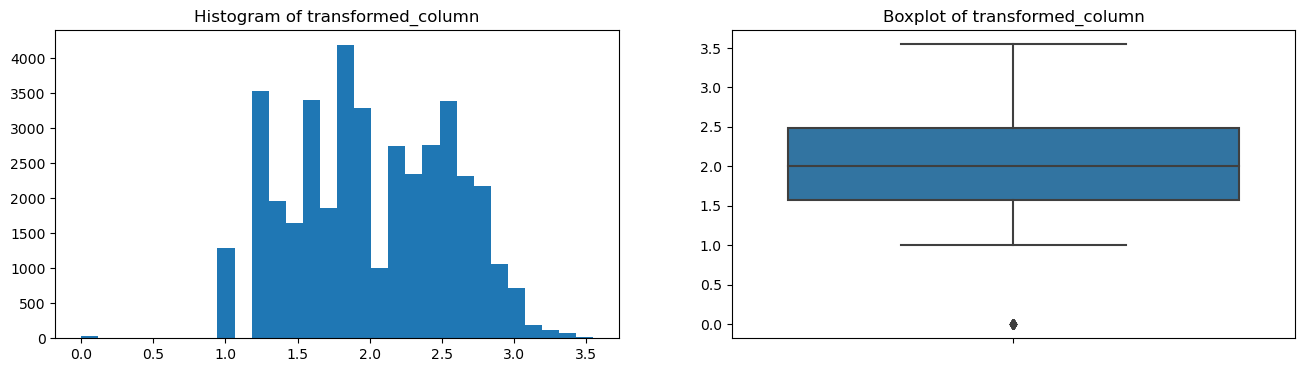

In [134]:
# Apply Box-Cox transformation using expr with lambda value of 0.28
column_name = 'floor_level'
lambda_value = 0.28  # You need to provide the lambda value
ppty_df1_boxcox_test4 = ppty_df1.withColumn("transformed_column", expr(f"pow({column_name}, {lambda_value})"))

diagnostic_plots_spark(ppty_df1_boxcox_test4, ['transformed_column']) 

In [135]:
# Checking skewness of new transformation
column_name = "transformed_column"  # Replace with the actual column name

skewness_value = ppty_df1_boxcox_test4.agg(F.skewness(F.col(column_name))).collect()[0][0]
std_deviation_value = ppty_df1_boxcox_test4.agg(F.stddev(F.col(column_name))).collect()[0][0]

print(f"Skewness of {column_name}: {skewness_value}")
print(f"Standard Deviation of {column_name}: {std_deviation_value}")

Skewness of transformed_column: -0.01674180513917563
Standard Deviation of transformed_column: 0.5463314783836252


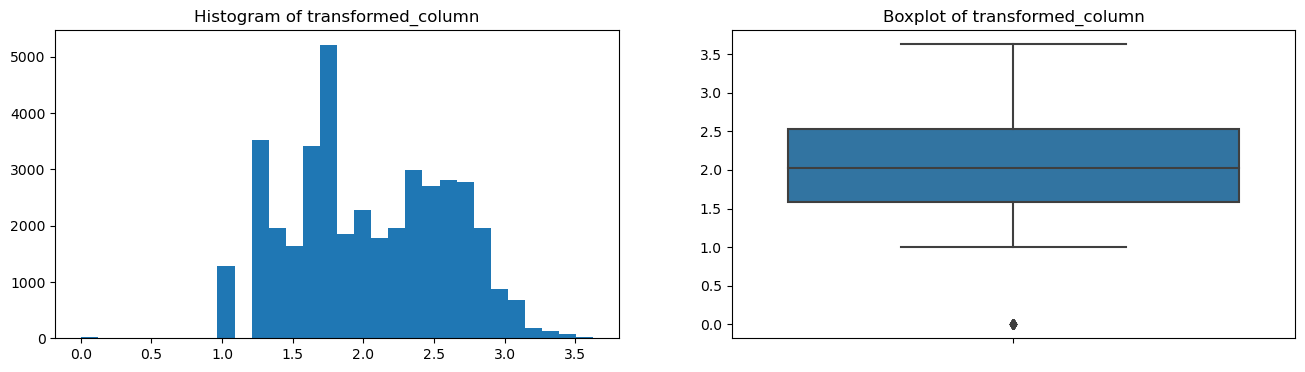

In [136]:
# Apply Box-Cox transformation using expr with lambda value of 0.285
column_name = 'floor_level'
lambda_value = 0.285  # You need to provide the lambda value
ppty_df1_boxcox_test5 = ppty_df1.withColumn("transformed_column", expr(f"pow({column_name}, {lambda_value})"))

diagnostic_plots_spark(ppty_df1_boxcox_test5, ['transformed_column']) 

In [137]:
# Checking skewness of new transformation
column_name = "transformed_column"  # Replace with the actual column name

skewness_value = ppty_df1_boxcox_test5.agg(F.skewness(F.col(column_name))).collect()[0][0]
std_deviation_value = ppty_df1_boxcox_test5.agg(F.stddev(F.col(column_name))).collect()[0][0]

print(f"Skewness of {column_name}: {skewness_value}")
print(f"Standard Deviation of {column_name}: {std_deviation_value}")

Skewness of transformed_column: -0.007407170782938307
Standard Deviation of transformed_column: 0.5627750568346106


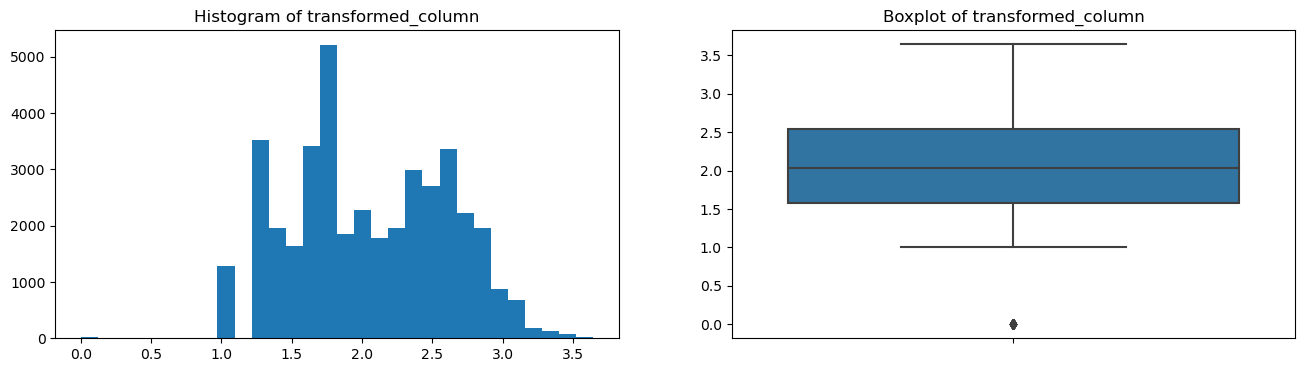

In [138]:
# Apply Box-Cox transformation using expr with lambda value of 0.286
column_name = 'floor_level'
lambda_value = 0.286  # You need to provide the lambda value
ppty_df1_boxcox_test6 = ppty_df1.withColumn("transformed_column", expr(f"pow({column_name}, {lambda_value})"))

diagnostic_plots_spark(ppty_df1_boxcox_test6, ['transformed_column']) 

In [139]:
# Checking skewness of new transformation
column_name = "transformed_column"  # Replace with the actual column name

skewness_value = ppty_df1_boxcox_test6.agg(F.skewness(F.col(column_name))).collect()[0][0]
std_deviation_value = ppty_df1_boxcox_test6.agg(F.stddev(F.col(column_name))).collect()[0][0]

print(f"Skewness of {column_name}: {skewness_value}")
print(f"Standard Deviation of {column_name}: {std_deviation_value}")

Skewness of transformed_column: -0.005554748647686938
Standard Deviation of transformed_column: 0.5661037653865997


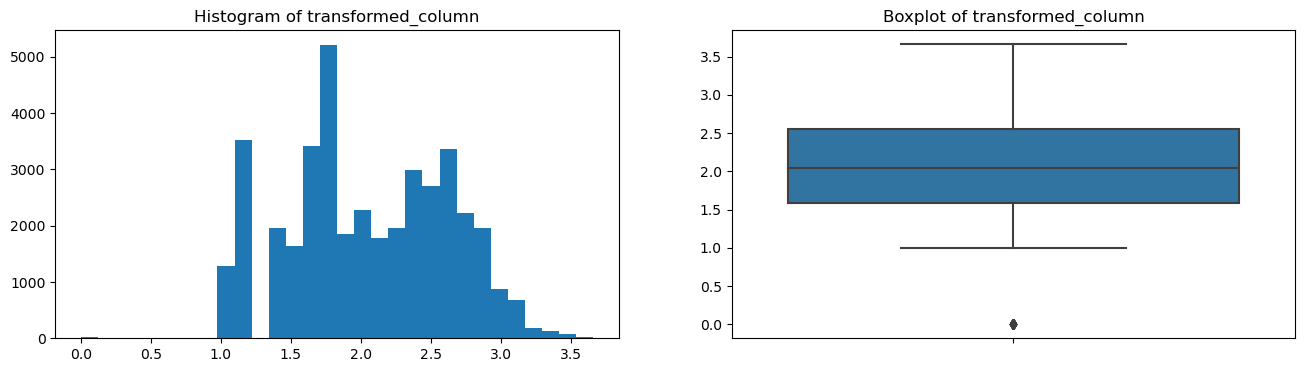

In [140]:
# Apply Box-Cox transformation using expr with lambda value of 0.287
column_name = 'floor_level'
lambda_value = 0.287  # You need to provide the lambda value
ppty_df1_boxcox_test7 = ppty_df1.withColumn("transformed_column", expr(f"pow({column_name}, {lambda_value})"))

diagnostic_plots_spark(ppty_df1_boxcox_test7, ['transformed_column']) 

In [141]:
# Checking skewness of new transformation
column_name = "transformed_column"  # Replace with the actual column name

skewness_value = ppty_df1_boxcox_test7.agg(F.skewness(F.col(column_name))).collect()[0][0]
std_deviation_value = ppty_df1_boxcox_test7.agg(F.stddev(F.col(column_name))).collect()[0][0]

print(f"Skewness of {column_name}: {skewness_value}")
print(f"Standard Deviation of {column_name}: {std_deviation_value}")

Skewness of transformed_column: -0.0037069846715826983
Standard Deviation of transformed_column: 0.5694459249609106


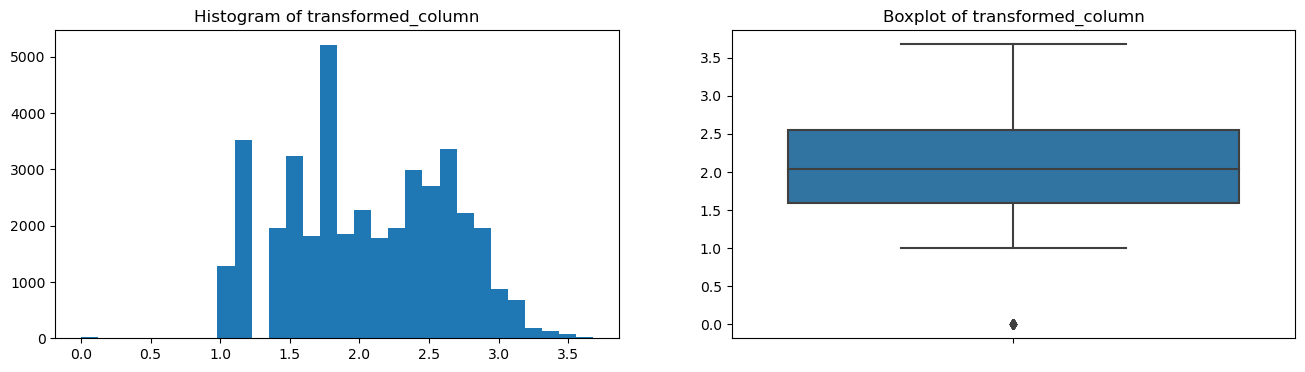

In [142]:
# Apply Box-Cox transformation using expr with lambda value of 0.288
column_name = 'floor_level'
lambda_value = 0.288  # You need to provide the lambda value
ppty_df1_boxcox_test8 = ppty_df1.withColumn("transformed_column", expr(f"pow({column_name}, {lambda_value})"))

diagnostic_plots_spark(ppty_df1_boxcox_test8, ['transformed_column']) 

In [143]:
# Checking skewness of new transformation
column_name = "transformed_column"  # Replace with the actual column name

skewness_value = ppty_df1_boxcox_test8.agg(F.skewness(F.col(column_name))).collect()[0][0]
std_deviation_value = ppty_df1_boxcox_test8.agg(F.stddev(F.col(column_name))).collect()[0][0]

print(f"Skewness of {column_name}: {skewness_value}")
print(f"Standard Deviation of {column_name}: {std_deviation_value}")

Skewness of transformed_column: -0.0018638061436116952
Standard Deviation of transformed_column: 0.5728015874238339


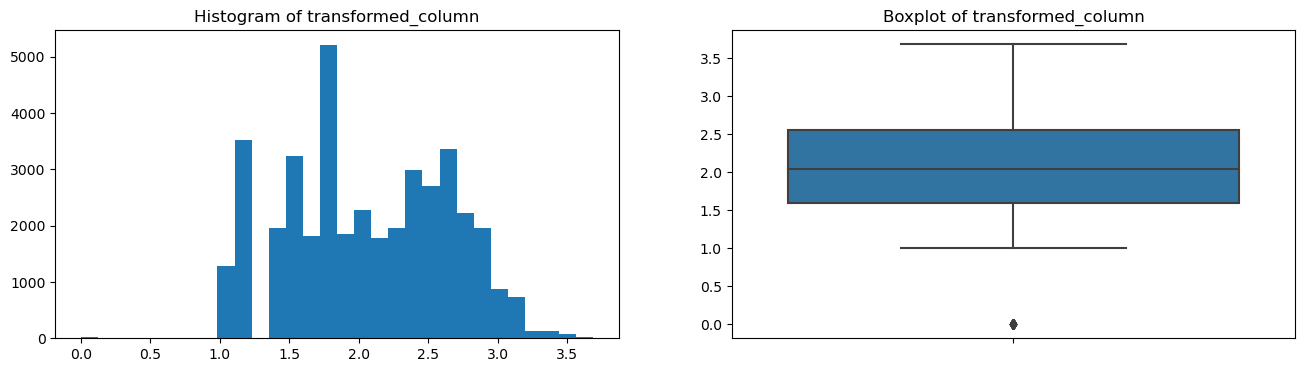

In [144]:
# Apply Box-Cox transformation using expr with lambda value of 0.2885
column_name = 'floor_level'
lambda_value = 0.2885  # You need to provide the lambda value
ppty_df1_boxcox_test9 = ppty_df1.withColumn("transformed_column", expr(f"pow({column_name}, {lambda_value})"))

diagnostic_plots_spark(ppty_df1_boxcox_test9, ['transformed_column']) 

In [145]:
# Checking skewness of new transformation
column_name = "transformed_column"  # Replace with the actual column name

skewness_value = ppty_df1_boxcox_test9.agg(F.skewness(F.col(column_name))).collect()[0][0]
std_deviation_value = ppty_df1_boxcox_test9.agg(F.stddev(F.col(column_name))).collect()[0][0]

print(f"Skewness of {column_name}: {skewness_value}")
print(f"Standard Deviation of {column_name}: {std_deviation_value}")

Skewness of transformed_column: -0.0009439140993278168
Standard Deviation of transformed_column: 0.5744844985029011


###### Square Root Transformation Test

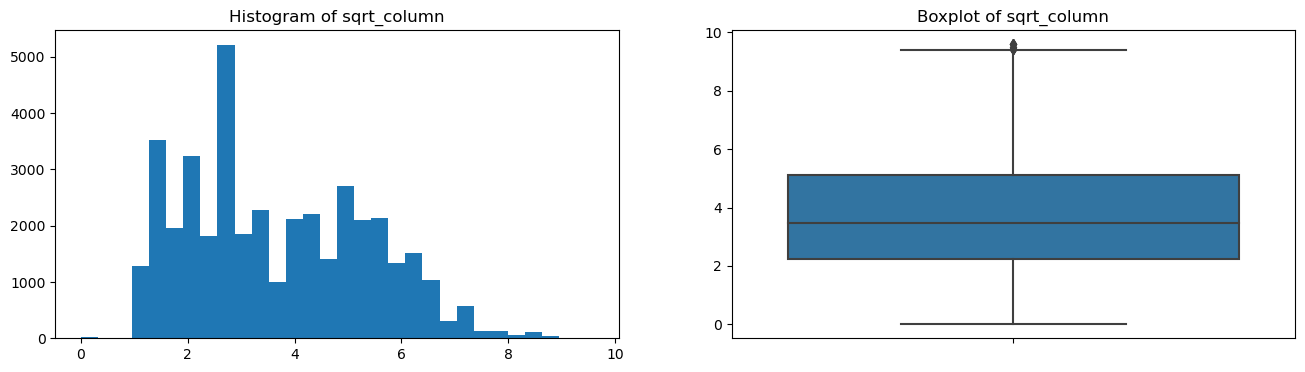

In [146]:
column_name = "floor_level"

# Apply square root transformation using expr
ppty_df1_sqrRoot = ppty_df1.withColumn("sqrt_column", expr(f"SQRT({column_name})"))

diagnostic_plots_spark(ppty_df1_sqrRoot, ['sqrt_column'])

In [147]:
# Checking skewness of new transformation
column_name = "sqrt_column"  # Replace with the actual column name

skewness_value = ppty_df1_sqrRoot.agg(F.skewness(F.col(column_name))).collect()[0][0]
std_deviation_value = ppty_df1_sqrRoot.agg(F.stddev(F.col(column_name))).collect()[0][0]

print(f"Skewness of {column_name}: {skewness_value}")
print(f"Standard Deviation of {column_name}: {std_deviation_value}")

Skewness of sqrt_column: 0.34056064081889836
Standard Deviation of sqrt_column: 1.6935113201188026


###### Power Transformation Test

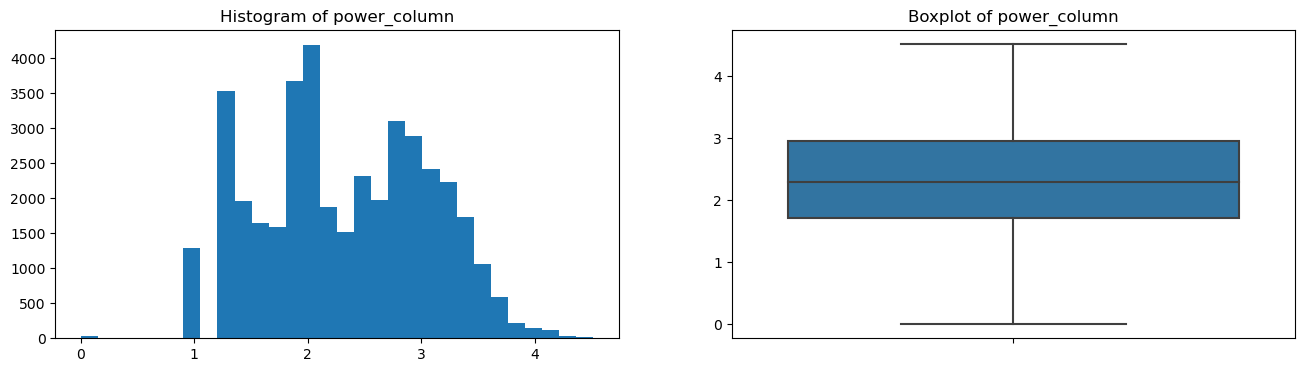

In [148]:
# Power = 1/3
column_name = "floor_level"

# Apply cube root transformation using expr
ppty_df1_power = ppty_df1.withColumn("power_column", expr(f"POWER({column_name}, 1/3)"))

diagnostic_plots_spark(ppty_df1_power, ['power_column'])

In [149]:
# Checking skewness of new transformation
column_name = "power_column"  # Replace with the actual column name

skewness_value = ppty_df1_power.agg(F.skewness(F.col(column_name))).collect()[0][0]
std_deviation_value = ppty_df1_power.agg(F.stddev(F.col(column_name))).collect()[0][0]

print(f"Skewness of {column_name}: {skewness_value}")
print(f"Standard Deviation of {column_name}: {std_deviation_value}")

Skewness of power_column: 0.07784250175663034
Standard Deviation of power_column: 0.7400078630693169


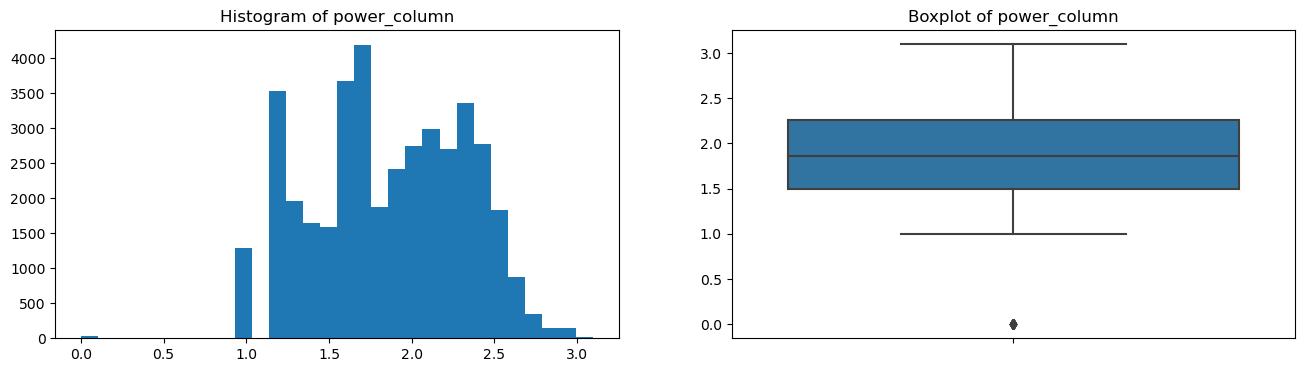

In [150]:
# Power = 1/4
column_name = "floor_level"

# Apply cube root transformation using expr
ppty_df1_power2 = ppty_df1.withColumn("power_column", expr(f"POWER({column_name}, 1/4)"))

diagnostic_plots_spark(ppty_df1_power2, ['power_column'])

In [151]:
# Checking skewness of new transformation
column_name = "power_column"  # Replace with the actual column name

skewness_value = ppty_df1_power2.agg(F.skewness(F.col(column_name))).collect()[0][0]
std_deviation_value = ppty_df1_power2.agg(F.stddev(F.col(column_name))).collect()[0][0]

print(f"Skewness of {column_name}: {skewness_value}")
print(f"Standard Deviation of {column_name}: {std_deviation_value}")

Skewness of power_column: -0.07587311684653936
Standard Deviation of power_column: 0.45435617897522973


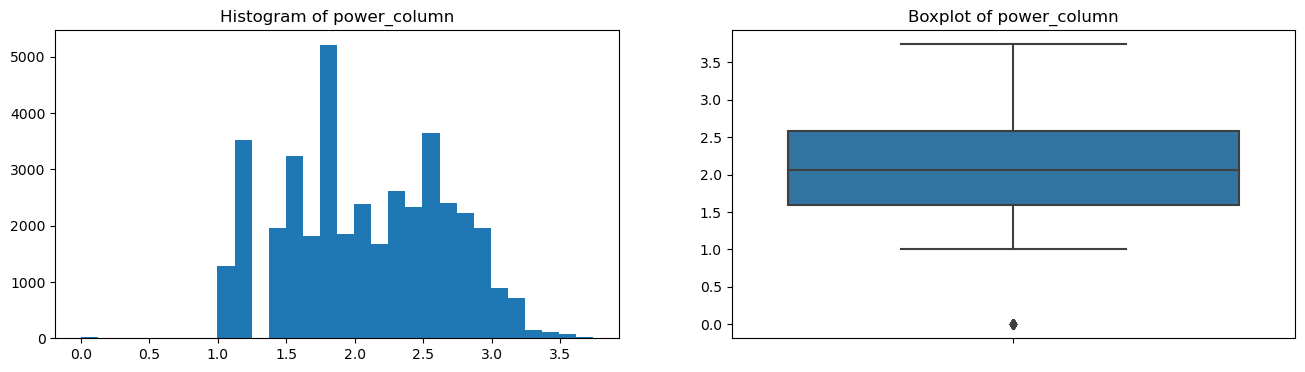

In [152]:
# Power = 7/24
column_name = "floor_level"

# Apply cube root transformation using expr
ppty_df1_power3 = ppty_df1.withColumn("power_column", expr(f"POWER({column_name}, 7/24)"))

diagnostic_plots_spark(ppty_df1_power3, ['power_column'])

In [153]:
# Checking skewness of new transformation
column_name = "power_column"  # Replace with the actual column name

skewness_value = ppty_df1_power3.agg(F.skewness(F.col(column_name))).collect()[0][0]
std_deviation_value = ppty_df1_power3.agg(F.stddev(F.col(column_name))).collect()[0][0]

print(f"Skewness of {column_name}: {skewness_value}")
print(f"Standard Deviation of {column_name}: {std_deviation_value}")

Skewness of power_column: 0.004856420413129059
Standard Deviation of power_column: 0.5852220515637141


##### 3.2.3 Applying the best transformations to the main dataframe<a id="part3.2.3"></a>

[Go to Start](#Start)

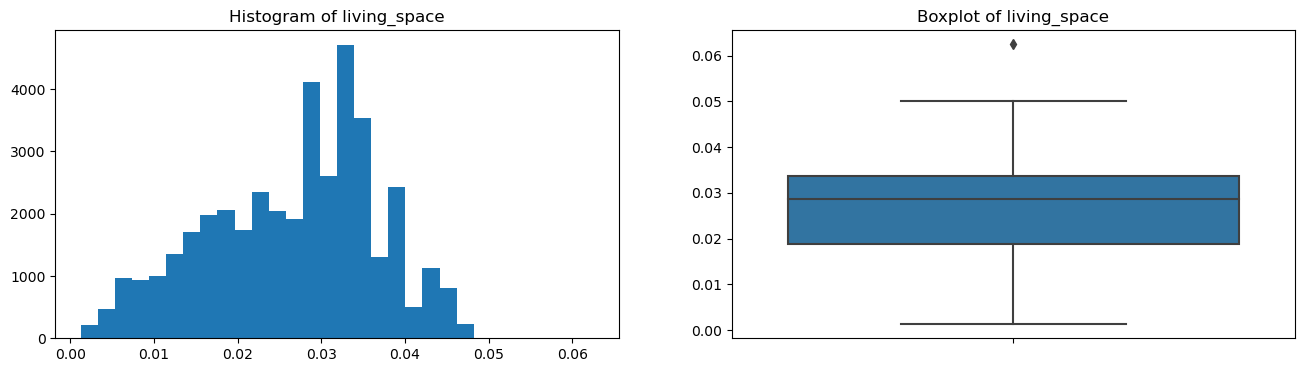

In [154]:
# Reciprocal Transformation for living_space
column_name = "living_space"

# Apply reciprocal transformation using expr
ppty_df1 = ppty_df1.withColumn("living_space", expr(f"1 / {column_name}"))

diagnostic_plots_spark(ppty_df1, ['living_space'])

In [155]:
# Checking skewness of new transformation
column_name = "living_space"  # Replace with the actual column name

skewness_value = ppty_df1.agg(F.skewness(F.col(column_name))).collect()[0][0]
std_deviation_value = ppty_df1.agg(F.stddev(F.col(column_name))).collect()[0][0]

print(f"Skewness of {column_name}: {skewness_value}")
print(f"Standard Deviation of {column_name}: {std_deviation_value}")

Skewness of living_space: -0.31368218536431436
Standard Deviation of living_space: 0.010148592289834486


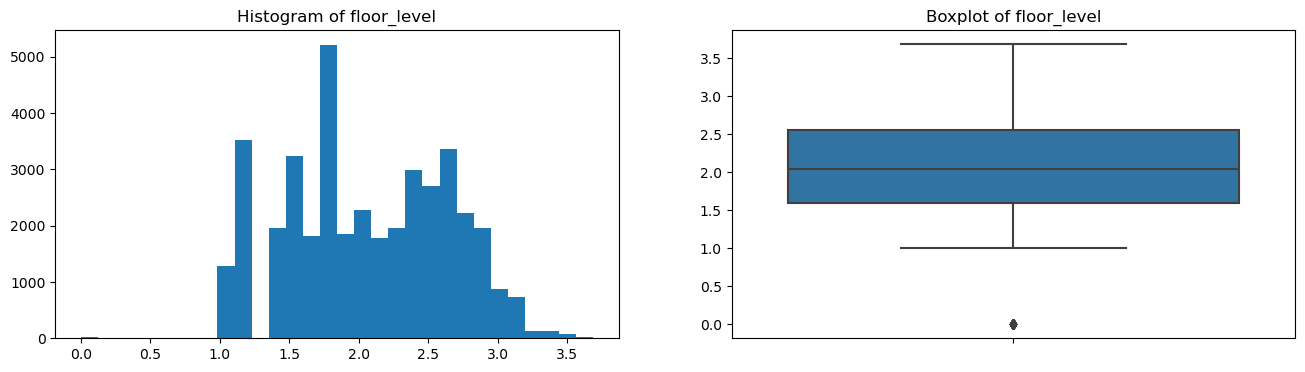

In [156]:
# Box-Cox Transformation with Lambda 0.2885 to floor_level
column_name = 'floor_level'
lambda_value = 0.2885  # You need to provide the lambda value
ppty_df1 = ppty_df1.withColumn("floor_level", expr(f"pow({column_name}, {lambda_value})"))

diagnostic_plots_spark(ppty_df1, ['floor_level']) 

In [157]:
# Checking skewness of new transformation
column_name = "floor_level"  # Replace with the actual column name

skewness_value = ppty_df1.agg(F.skewness(F.col(column_name))).collect()[0][0]
std_deviation_value = ppty_df1.agg(F.stddev(F.col(column_name))).collect()[0][0]

print(f"Skewness of {column_name}: {skewness_value}")
print(f"Standard Deviation of {column_name}: {std_deviation_value}")

Skewness of floor_level: -0.0009439140993278168
Standard Deviation of floor_level: 0.5744844985029011


#### 3.3 Outlier Handling<a id="part3.3"></a>

[Go to Start](#Start)

In [158]:
# Finding number of outliers by IQR Range
from pyspark.sql.functions import col

def find_boundaries(df, variable, distance=1.5):
    # Let's calculate the boundaries outside which sit the outliers

    IQR = df.approxQuantile(variable, [0.25, 0.75], 0.0)
    lower_boundary = IQR[0] - (IQR[1] - IQR[0]) * distance
    upper_boundary = IQR[1] + (IQR[1] - IQR[0]) * distance

    return upper_boundary, lower_boundary

#### living_space

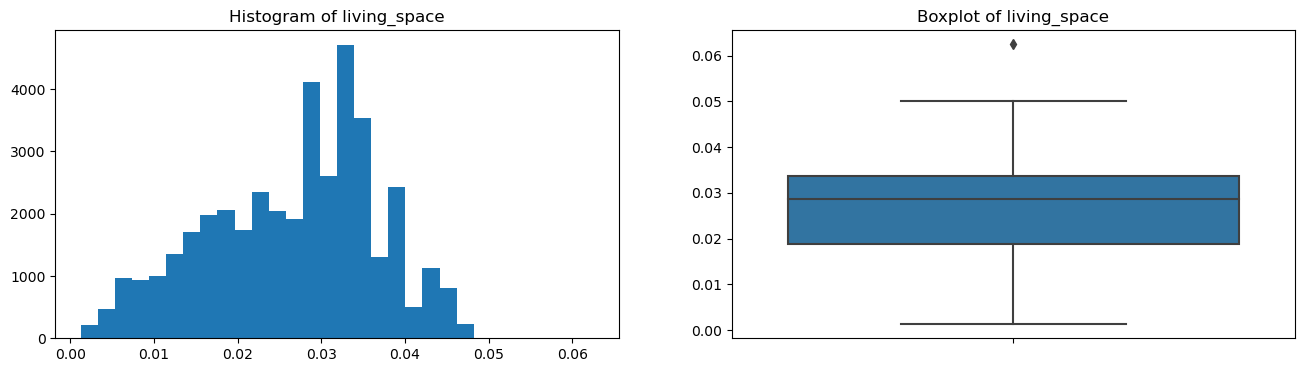

In [159]:
diagnostic_plots_spark(ppty_df1, ['living_space'])

In [160]:
# Outliers in living_space
upper_boundary, lower_boundary = find_boundaries(ppty_df1, 'living_space', 1.5)

# Find outliers
outliers_df = ppty_df1.filter((col('living_space') > upper_boundary) | (col('living_space') < lower_boundary))

# Show the outliers
outliers_df.show()

+------------+---------------+-----------------+----------+---------+----------+--------------+-------+-------+---------------------+-------------------------+--------------+-----------------------------+-----------------+-----------------+
|living_space|bathroom_number|      floor_level|built_year| latitude| longitude|bedroom_number|premium|  price|listing_label_one_hot|sub_property_type_one_hot|tenure_one_hot|property_type_ordinal_encoded|            state|             city|
+------------+---------------+-----------------+----------+---------+----------+--------------+-------+-------+---------------------+-------------------------+--------------+-----------------------------+-----------------+-----------------+
|      0.0625|              1|2.225300241169668|      2013|13.746051|100.601775|             1|      0|2023000|        (2,[0],[1.0])|            (1,[0],[1.0])| (2,[0],[1.0])|                            1|6112545.707092399|2755265.625783972|
+------------+---------------+------

In [161]:
# Trimming the 1 outlier away
ppty_df1 = ppty_df1.filter((ppty_df1['living_space'] >= 0) & (ppty_df1['living_space'] <= 0.06))

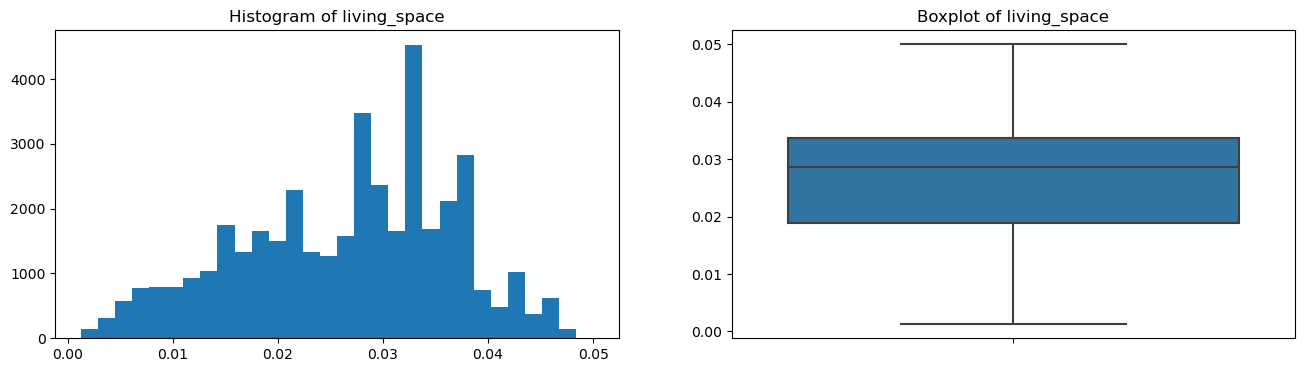

In [162]:
diagnostic_plots_spark(ppty_df1, ['living_space'])

#### floor_level

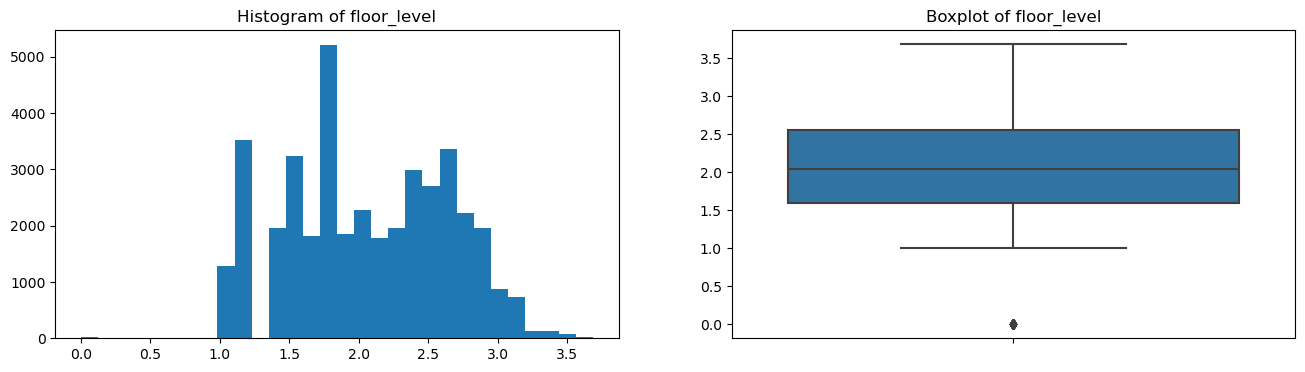

In [163]:
diagnostic_plots_spark(ppty_df1, ['floor_level'])

In [164]:
# Outliers in floor_level
upper_boundary, lower_boundary = find_boundaries(ppty_df1, 'floor_level', 1.5)

# Find outliers
outliers_df = ppty_df1.filter((col('floor_level') > upper_boundary) | (col('floor_level') < lower_boundary))

# Show the outliers
outliers_df.limit(10)

living_space,bathroom_number,floor_level,built_year,latitude,longitude,bedroom_number,premium,price,listing_label_one_hot,sub_property_type_one_hot,tenure_one_hot,property_type_ordinal_encoded,state,city
0.029411764705882353,1,0.0,2014,13.68428388,100.6040554,1,0,2800000,"(2,[1],[1.0])","(1,[0],[1.0])","(2,[0],[1.0])",1,6112545.707092399,4481404.413961039
0.0350385423966363,1,0.0,2021,13.896863,100.549097,1,0,2300000,"(2,[0],[1.0])","(1,[0],[1.0])","(2,[0],[1.0])",1,2807591.3527054107,3425014.597315436
0.00909090909090909,2,0.0,2010,13.671408,100.541109,2,0,15000000,"(2,[0],[1.0])","(1,[0],[1.0])","(2,[0],[1.0])",1,6112545.707092399,6295190.663917526
0.02857142857142857,1,0.0,2014,13.725346,100.576496,1,0,8000000,"(2,[1],[1.0])","(1,[0],[1.0])","(2,[0],[1.0])",1,6112545.707092399,9004654.66296959
0.022727272727272728,1,0.0,2014,13.72974812,100.581265,1,0,10100000,"(2,[0],[1.0])","(1,[0],[1.0])","(2,[0],[1.0])",1,6112545.707092399,1.0270214416342413E7
0.04,1,0.0,2016,13.640131,100.680643,1,0,1650000,"(2,[0],[1.0])","(1,[0],[1.0])","(2,[0],[1.0])",1,3025437.0237422273,4207734.668439716
0.023501762632197415,1,0.0,2010,13.737239,100.583582,1,0,7500000,"(2,[1],[1.0])","(1,[0],[1.0])","(2,[0],[1.0])",1,6112545.707092399,1.0270214416342413E7
0.021739130434782608,1,0.0,2019,13.74543,100.556764,1,0,9354000,"(2,[0],[1.0])","(1,[0],[1.0])","(2,[0],[1.0])",1,6112545.707092399,1.0270214416342413E7
0.01,2,0.0,2014,13.72974812,100.581265,2,0,28000000,"(2,[1],[1.0])","(1,[0],[1.0])","(2,[0],[1.0])",1,6112545.707092399,1.0270214416342413E7
0.014705882352941176,1,0.0,2012,13.7215657,100.5103092,1,0,10500000,"(2,[1],[1.0])","(1,[0],[1.0])","(2,[0],[1.0])",1,6112545.707092399,1.3989386087489065E7


In [165]:
outliers_df.count()

30

In [166]:
# Handling the outliers in floor_level
ppty_df1 = ppty_df1.filter((ppty_df1['floor_level'] > 0))

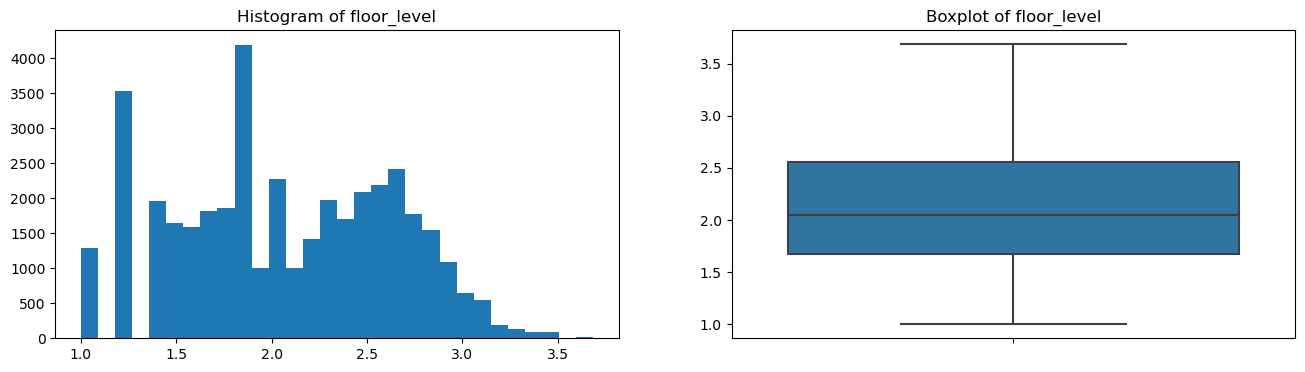

In [167]:
diagnostic_plots_spark(ppty_df1, ['floor_level'])

#### 3.4 Report on Data Transformation<a id="part3.4"></a>

[Go to Start](#Start)
    
<u>Categorical Encoding<u>
    
    Encoding is done to string type columns as regression algorithms do not accept string inputs. 
    
    1) One-Hot Encoding
    One-hot encoding was done to "listing_label", "sub_property_type","tenure" as these variables had low cardinalities and 
    were nominal variables; categories do not follow an order.
    
    2) Ordinal Encoding
    Ordinal encoding was done to "property_type" as it was an ordinal variable as the property categories followed an order
    in terms of their size.
    
    3) Target Encoding
    Target encoding was done to "state" and "city" as these were unordered variables with high cardinalities of 17 and 
    89 so one hot encoding was not recommended for this. Hence, I used the target encoding which is more suited to these 
    variables as it would not make the dataset complex.
    

<u>Continuous Numerical Transformation<u>
    
    Numerical transformation normalises distributions which can improve performance due to less biasness.
    
    1) living_space: Before transformation, 'living_space' was right skewed with a skewness of 5.33.
    
    - Logarithmic Transformation: Resulted in a skewness of 1.54 with many outliers still present
       
    - Box-Cox Transformation: Lower lambda values resulted in more normalisation but difference was extremely less even
    after big reduction of lambda value. For example, lambda of 0.01 resulted in skewness of 1.55 while lambda of 0.001
    resulted in skewness of 1.54.
    
    - Power Transformation: Lower power values resulted in less skewness but skewness was extremely high. Power 1/3 
    resulted in skewness of 2.29, which is higher than other transformations.
    
    - Reciprocal Transformation: Was the best transformation as it resulted in the skewness of -0.31 which was 
    closest to 0 and also resulted in the least number of outliers.
    
    2) floor_level: Before transformation, 'floor_level' was right skewed with a Skewness of 1.01.
    
    - Logarithmic / Reciprocal: Cannot be used as floor_level had 0 values so using these transformations resulted in
    undefined values.
    
    - Power Transformation: Power 1/3 resulted in no outliers left but had a skewness of 0.078. 
    Best power value was 7/24 and it resulted in skewness of 0.0049.
    
    - Box-Cox Transformation: After many tests, the best lambda value found was 0.2885 and this was the best transformation 
    for floor_level as it resulted in a skewness of -0.00094.
    
    
<u>Outlier Handling<u>
    
    After transformations, living_space had 1 outlier above 0.06 and floor_level had 30 outliers at 0. However, I decided 
    to trim them as my dataframe had more than 40,000 and removal of 31 rows would not result in significant loss of 
    information.

### Step 4: Machine Learning Modelling<a id="part4"></a>

[Go to Start](#Start)

#### 4.1 Train-Test Split / Scaling / Polynomial Expansion<a id="part4.1"></a>

[Go to Start](#Start)

##### Test 1: 70:30 Ratio

In [168]:
# Splitting to 70:30 ratio
(train1, test1) = ppty_df1.randomSplit([0.7, 0.3], seed=1)

In [169]:
# Show number of rows and columns in train
print((train1.count(), len(train1.columns)))

(27958, 15)


In [170]:
# Show top 5 rows in train
train1.limit(5)

living_space,bathroom_number,floor_level,built_year,latitude,longitude,bedroom_number,premium,price,listing_label_one_hot,sub_property_type_one_hot,tenure_one_hot,property_type_ordinal_encoded,state,city
0.002808988764044...,5,1.2213697338199705,2020,13.69674471,100.7019513,4,0,14500000,"(2,[1],[1.0])","(1,[0],[1.0])","(2,[0],[1.0])",3,6112545.707092399,4386940.140845071
0.002857142857142857,5,1.3729334365070813,2011,13.81908079,100.6560998,5,0,12890000,"(2,[0],[1.0])","(1,[0],[1.0])","(2,[0],[1.0])",3,6112545.707092399,2730344.117647059
0.005,3,1.2213697338199705,2015,13.621157,100.679146,3,0,5690000,"(2,[0],[1.0])","(1,[0],[1.0])","(2,[0],[1.0])",3,3025437.0237422273,4207734.668439716
0.00546448087431694,9,1.2213697338199705,2019,13.71940167,100.3299757,9,0,30360000,"(2,[0],[1.0])","(1,[0],[1.0])","(2,[0],[1.0])",3,4455865.52631579,1.0211666666666666E7
0.006666666666666667,2,1.8219710048076863,1997,13.72963785,100.5725594,3,0,15500000,"(2,[0],[1.0])","(1,[0],[1.0])","(2,[0],[1.0])",1,6112545.707092399,1.0270214416342413E7


In [171]:
# Show number of rows and columns in test
print((test1.count(), len(test1.columns)))

(12118, 15)


In [172]:
# Show top 5 rows in test
test1.limit(5)

living_space,bathroom_number,floor_level,built_year,latitude,longitude,bedroom_number,premium,price,listing_label_one_hot,sub_property_type_one_hot,tenure_one_hot,property_type_ordinal_encoded,state,city
0.00625,3,1.3729334365070813,2014,13.736165,100.616655,3,0,10500000,"(2,[0],[1.0])","(1,[0],[1.0])","(2,[0],[1.0])",1,6112545.707092399,2755265.625783972
0.00641025641025641,2,1.2213697338199705,2009,13.9586575,100.4803389,3,0,3590000,"(2,[0],[1.0])","(1,[0],[1.0])","(2,[0],[1.0])",3,2151331.0160427806,3991000.0
0.009900990099009901,2,2.959754226727234,2015,13.760072,100.569425,3,0,10500000,"(2,[0],[1.0])","(1,[0],[1.0])","(2,[0],[1.0])",1,6112545.707092399,4379023.526452732
0.01020408163265306,2,2.2645635557738792,2015,13.760072,100.569425,3,0,17700000,"(2,[0],[1.0])","(1,[0],[1.0])","(2,[0],[1.0])",1,6112545.707092399,4379023.526452732
0.010493179433368312,2,2.8986401769196677,2020,13.685043,100.611789,2,0,18310000,"(2,[0],[1.0])","(1,[0],[1.0])","(2,[0],[1.0])",1,6112545.707092399,4481404.413961039


In [173]:
from pyspark.ml.feature import VectorAssembler

feature_columns = [col for col in ppty_df1.columns if col != 'price']

featureassembler=VectorAssembler(inputCols=feature_columns,outputCol="Xcols")

In [174]:
train1_vectored = featureassembler.transform(train1)

In [175]:
train1_vectored.limit(5)

living_space,bathroom_number,floor_level,built_year,latitude,longitude,bedroom_number,premium,price,listing_label_one_hot,sub_property_type_one_hot,tenure_one_hot,property_type_ordinal_encoded,state,city,Xcols
0.002808988764044...,5,1.2213697338199705,2020,13.69674471,100.7019513,4,0,14500000,"(2,[1],[1.0])","(1,[0],[1.0])","(2,[0],[1.0])",3,6112545.707092399,4386940.140845071,[0.00280898876404...
0.002857142857142857,5,1.3729334365070813,2011,13.81908079,100.6560998,5,0,12890000,"(2,[0],[1.0])","(1,[0],[1.0])","(2,[0],[1.0])",3,6112545.707092399,2730344.117647059,[0.00285714285714...
0.005,3,1.2213697338199705,2015,13.621157,100.679146,3,0,5690000,"(2,[0],[1.0])","(1,[0],[1.0])","(2,[0],[1.0])",3,3025437.0237422273,4207734.668439716,"[0.005,3.0,1.2213..."
0.00546448087431694,9,1.2213697338199705,2019,13.71940167,100.3299757,9,0,30360000,"(2,[0],[1.0])","(1,[0],[1.0])","(2,[0],[1.0])",3,4455865.52631579,1.0211666666666666E7,[0.00546448087431...
0.006666666666666667,2,1.8219710048076863,1997,13.72963785,100.5725594,3,0,15500000,"(2,[0],[1.0])","(1,[0],[1.0])","(2,[0],[1.0])",1,6112545.707092399,1.0270214416342413E7,[0.00666666666666...


In [176]:
test1_vectored = featureassembler.transform(test1)

In [177]:
test1_vectored.limit(5)

living_space,bathroom_number,floor_level,built_year,latitude,longitude,bedroom_number,premium,price,listing_label_one_hot,sub_property_type_one_hot,tenure_one_hot,property_type_ordinal_encoded,state,city,Xcols
0.00625,3,1.3729334365070813,2014,13.736165,100.616655,3,0,10500000,"(2,[0],[1.0])","(1,[0],[1.0])","(2,[0],[1.0])",1,6112545.707092399,2755265.625783972,"[0.00625,3.0,1.37..."
0.00641025641025641,2,1.2213697338199705,2009,13.9586575,100.4803389,3,0,3590000,"(2,[0],[1.0])","(1,[0],[1.0])","(2,[0],[1.0])",3,2151331.0160427806,3991000.0,[0.00641025641025...
0.009900990099009901,2,2.959754226727234,2015,13.760072,100.569425,3,0,10500000,"(2,[0],[1.0])","(1,[0],[1.0])","(2,[0],[1.0])",1,6112545.707092399,4379023.526452732,[0.00990099009900...
0.01020408163265306,2,2.2645635557738792,2015,13.760072,100.569425,3,0,17700000,"(2,[0],[1.0])","(1,[0],[1.0])","(2,[0],[1.0])",1,6112545.707092399,4379023.526452732,[0.01020408163265...
0.010493179433368312,2,2.8986401769196677,2020,13.685043,100.611789,2,0,18310000,"(2,[0],[1.0])","(1,[0],[1.0])","(2,[0],[1.0])",1,6112545.707092399,4481404.413961039,[0.01049317943336...


#### Scaling

In [178]:
from pyspark.ml.feature import StandardScaler

stan_scaler = StandardScaler(withMean=True, withStd=True, inputCol="Xcols", outputCol="Xcols_sscaled")

In [179]:
train1_stan_scaled = stan_scaler.fit(train1_vectored).transform(train1_vectored)
train1_stan_scaled.limit(5)

living_space,bathroom_number,floor_level,built_year,latitude,longitude,bedroom_number,premium,price,listing_label_one_hot,sub_property_type_one_hot,tenure_one_hot,property_type_ordinal_encoded,state,city,Xcols,Xcols_sscaled
0.002808988764044...,5,1.2213697338199705,2020,13.69674471,100.7019513,4,0,14500000,"(2,[1],[1.0])","(1,[0],[1.0])","(2,[0],[1.0])",3,6112545.707092399,4386940.140845071,[0.00280898876404...,[-2.3516923659609...
0.002857142857142857,5,1.3729334365070813,2011,13.81908079,100.6560998,5,0,12890000,"(2,[0],[1.0])","(1,[0],[1.0])","(2,[0],[1.0])",3,6112545.707092399,2730344.117647059,[0.00285714285714...,[-2.3469436275903...
0.005,3,1.2213697338199705,2015,13.621157,100.679146,3,0,5690000,"(2,[0],[1.0])","(1,[0],[1.0])","(2,[0],[1.0])",3,3025437.0237422273,4207734.668439716,"[0.005,3.0,1.2213...",[-2.1356247700979...
0.00546448087431694,9,1.2213697338199705,2019,13.71940167,100.3299757,9,0,30360000,"(2,[0],[1.0])","(1,[0],[1.0])","(2,[0],[1.0])",3,4455865.52631579,1.0211666666666666E7,[0.00546448087431...,[-2.0898197718437...
0.006666666666666667,2,1.8219710048076863,1997,13.72963785,100.5725594,3,0,15500000,"(2,[0],[1.0])","(1,[0],[1.0])","(2,[0],[1.0])",1,6112545.707092399,1.0270214416342413E7,[0.00666666666666...,[-1.9712656587150...


In [180]:
test1_stan_scaled = stan_scaler.fit(test1_vectored).transform(test1_vectored)
test1_stan_scaled.limit(5)

living_space,bathroom_number,floor_level,built_year,latitude,longitude,bedroom_number,premium,price,listing_label_one_hot,sub_property_type_one_hot,tenure_one_hot,property_type_ordinal_encoded,state,city,Xcols,Xcols_sscaled
0.00625,3,1.3729334365070813,2014,13.736165,100.616655,3,0,10500000,"(2,[0],[1.0])","(1,[0],[1.0])","(2,[0],[1.0])",1,6112545.707092399,2755265.625783972,"[0.00625,3.0,1.37...",[-2.0138371714409...
0.00641025641025641,2,1.2213697338199705,2009,13.9586575,100.4803389,3,0,3590000,"(2,[0],[1.0])","(1,[0],[1.0])","(2,[0],[1.0])",3,2151331.0160427806,3991000.0,[0.00641025641025...,[-1.9980674992355...
0.009900990099009901,2,2.959754226727234,2015,13.760072,100.569425,3,0,10500000,"(2,[0],[1.0])","(1,[0],[1.0])","(2,[0],[1.0])",1,6112545.707092399,4379023.526452732,[0.00990099009900...,[-1.6545696888218...
0.01020408163265306,2,2.2645635557738792,2015,13.760072,100.569425,3,0,17700000,"(2,[0],[1.0])","(1,[0],[1.0])","(2,[0],[1.0])",1,6112545.707092399,4379023.526452732,[0.01020408163265...,[-1.6247446470271...
0.010493179433368312,2,2.8986401769196677,2020,13.685043,100.611789,2,0,18310000,"(2,[0],[1.0])","(1,[0],[1.0])","(2,[0],[1.0])",1,6112545.707092399,4481404.413961039,[0.01049317943336...,[-1.5962966270991...


##### Test 2: 75:25 Ratio

In [181]:
# Splitting to 80:20 ratio
(train2, test2) = ppty_df1.randomSplit([0.75, 0.25], seed=2)

In [182]:
# Show number of rows and columns in train
print((train2.count(), len(train2.columns)))

(29928, 15)


In [183]:
# Show top 5 rows in train
train2.limit(5)

living_space,bathroom_number,floor_level,built_year,latitude,longitude,bedroom_number,premium,price,listing_label_one_hot,sub_property_type_one_hot,tenure_one_hot,property_type_ordinal_encoded,state,city
0.002808988764044...,5,1.2213697338199705,2020,13.69674471,100.7019513,4,0,14500000,"(2,[1],[1.0])","(1,[0],[1.0])","(2,[0],[1.0])",3,6112545.707092399,4386940.140845071
0.002857142857142857,5,1.3729334365070813,2011,13.81908079,100.6560998,5,0,12890000,"(2,[0],[1.0])","(1,[0],[1.0])","(2,[0],[1.0])",3,6112545.707092399,2730344.117647059
0.005,3,1.2213697338199705,2015,13.621157,100.679146,3,0,5690000,"(2,[0],[1.0])","(1,[0],[1.0])","(2,[0],[1.0])",3,3025437.0237422273,4207734.668439716
0.00546448087431694,9,1.2213697338199705,2019,13.71940167,100.3299757,9,0,30360000,"(2,[0],[1.0])","(1,[0],[1.0])","(2,[0],[1.0])",3,4455865.52631579,1.0211666666666666E7
0.00641025641025641,2,1.2213697338199705,2009,13.9586575,100.4803389,3,0,3590000,"(2,[0],[1.0])","(1,[0],[1.0])","(2,[0],[1.0])",3,2151331.0160427806,3991000.0


In [184]:
# Show number of rows and columns in test
print((test2.count(), len(test2.columns)))

(10148, 15)


In [185]:
# Show top 5 rows in test
test2.limit(5)

living_space,bathroom_number,floor_level,built_year,latitude,longitude,bedroom_number,premium,price,listing_label_one_hot,sub_property_type_one_hot,tenure_one_hot,property_type_ordinal_encoded,state,city
0.00625,3,1.3729334365070813,2014,13.736165,100.616655,3,0,10500000,"(2,[0],[1.0])","(1,[0],[1.0])","(2,[0],[1.0])",1,6112545.707092399,2755265.625783972
0.01020408163265306,2,2.2645635557738792,2015,13.760072,100.569425,3,0,17700000,"(2,[0],[1.0])","(1,[0],[1.0])","(2,[0],[1.0])",1,6112545.707092399,4379023.526452732
0.011235955056179775,2,2.8986401769196677,2010,13.72128972,100.504384,2,0,9790000,"(2,[0],[1.0])","(1,[0],[1.0])","(2,[0],[1.0])",1,6112545.707092399,1.3989386087489065E7
0.013333333333333334,2,2.99882974719986,2018,13.746369,100.562791,2,0,15500000,"(2,[0],[1.0])","(1,[0],[1.0])","(2,[0],[1.0])",1,6112545.707092399,9004654.66296959
0.014492753623188406,2,2.8118572659294636,2014,13.75240555,100.5348807,2,0,11000000,"(2,[0],[1.0])","(1,[0],[1.0])","(2,[0],[1.0])",1,6112545.707092399,8096527.381630013


In [186]:
from pyspark.ml.feature import VectorAssembler

feature_columns = [col for col in ppty_df1.columns if col != 'price']

featureassembler=VectorAssembler(inputCols=feature_columns,outputCol="Xcols")

In [187]:
train2_vectored = featureassembler.transform(train2)

In [188]:
train2_vectored.limit(5)

living_space,bathroom_number,floor_level,built_year,latitude,longitude,bedroom_number,premium,price,listing_label_one_hot,sub_property_type_one_hot,tenure_one_hot,property_type_ordinal_encoded,state,city,Xcols
0.002808988764044...,5,1.2213697338199705,2020,13.69674471,100.7019513,4,0,14500000,"(2,[1],[1.0])","(1,[0],[1.0])","(2,[0],[1.0])",3,6112545.707092399,4386940.140845071,[0.00280898876404...
0.002857142857142857,5,1.3729334365070813,2011,13.81908079,100.6560998,5,0,12890000,"(2,[0],[1.0])","(1,[0],[1.0])","(2,[0],[1.0])",3,6112545.707092399,2730344.117647059,[0.00285714285714...
0.005,3,1.2213697338199705,2015,13.621157,100.679146,3,0,5690000,"(2,[0],[1.0])","(1,[0],[1.0])","(2,[0],[1.0])",3,3025437.0237422273,4207734.668439716,"[0.005,3.0,1.2213..."
0.00546448087431694,9,1.2213697338199705,2019,13.71940167,100.3299757,9,0,30360000,"(2,[0],[1.0])","(1,[0],[1.0])","(2,[0],[1.0])",3,4455865.52631579,1.0211666666666666E7,[0.00546448087431...
0.00641025641025641,2,1.2213697338199705,2009,13.9586575,100.4803389,3,0,3590000,"(2,[0],[1.0])","(1,[0],[1.0])","(2,[0],[1.0])",3,2151331.0160427806,3991000.0,[0.00641025641025...


In [189]:
test2_vectored = featureassembler.transform(test2)

In [190]:
test2_vectored.limit(5)

living_space,bathroom_number,floor_level,built_year,latitude,longitude,bedroom_number,premium,price,listing_label_one_hot,sub_property_type_one_hot,tenure_one_hot,property_type_ordinal_encoded,state,city,Xcols
0.00625,3,1.3729334365070813,2014,13.736165,100.616655,3,0,10500000,"(2,[0],[1.0])","(1,[0],[1.0])","(2,[0],[1.0])",1,6112545.707092399,2755265.625783972,"[0.00625,3.0,1.37..."
0.01020408163265306,2,2.2645635557738792,2015,13.760072,100.569425,3,0,17700000,"(2,[0],[1.0])","(1,[0],[1.0])","(2,[0],[1.0])",1,6112545.707092399,4379023.526452732,[0.01020408163265...
0.011235955056179775,2,2.8986401769196677,2010,13.72128972,100.504384,2,0,9790000,"(2,[0],[1.0])","(1,[0],[1.0])","(2,[0],[1.0])",1,6112545.707092399,1.3989386087489065E7,[0.01123595505617...
0.013333333333333334,2,2.99882974719986,2018,13.746369,100.562791,2,0,15500000,"(2,[0],[1.0])","(1,[0],[1.0])","(2,[0],[1.0])",1,6112545.707092399,9004654.66296959,[0.01333333333333...
0.014492753623188406,2,2.8118572659294636,2014,13.75240555,100.5348807,2,0,11000000,"(2,[0],[1.0])","(1,[0],[1.0])","(2,[0],[1.0])",1,6112545.707092399,8096527.381630013,[0.01449275362318...


#### Scaling

In [191]:
from pyspark.ml.feature import StandardScaler

stan_scaler = StandardScaler(withMean=True, withStd=True, inputCol="Xcols", outputCol="Xcols_sscaled")

In [192]:
train2_stan_scaled = stan_scaler.fit(train2_vectored).transform(train2_vectored)
train2_stan_scaled.limit(5)

living_space,bathroom_number,floor_level,built_year,latitude,longitude,bedroom_number,premium,price,listing_label_one_hot,sub_property_type_one_hot,tenure_one_hot,property_type_ordinal_encoded,state,city,Xcols,Xcols_sscaled
0.002808988764044...,5,1.2213697338199705,2020,13.69674471,100.7019513,4,0,14500000,"(2,[1],[1.0])","(1,[0],[1.0])","(2,[0],[1.0])",3,6112545.707092399,4386940.140845071,[0.00280898876404...,[-2.3448404009171...
0.002857142857142857,5,1.3729334365070813,2011,13.81908079,100.6560998,5,0,12890000,"(2,[0],[1.0])","(1,[0],[1.0])","(2,[0],[1.0])",3,6112545.707092399,2730344.117647059,[0.00285714285714...,[-2.3401055493994...
0.005,3,1.2213697338199705,2015,13.621157,100.679146,3,0,5690000,"(2,[0],[1.0])","(1,[0],[1.0])","(2,[0],[1.0])",3,3025437.0237422273,4207734.668439716,"[0.005,3.0,1.2213...",[-2.1294046568606...
0.00546448087431694,9,1.2213697338199705,2019,13.71940167,100.3299757,9,0,30360000,"(2,[0],[1.0])","(1,[0],[1.0])","(2,[0],[1.0])",3,4455865.52631579,1.0211666666666666E7,[0.00546448087431...,[-2.0837336072940...
0.00641025641025641,2,1.2213697338199705,2009,13.9586575,100.4803389,3,0,3590000,"(2,[0],[1.0])","(1,[0],[1.0])","(2,[0],[1.0])",3,2151331.0160427806,3991000.0,[0.00641025641025...,[-1.9907382574975...


In [193]:
test2_stan_scaled = stan_scaler.fit(test2_vectored).transform(test2_vectored)
test2_stan_scaled.limit(5)

living_space,bathroom_number,floor_level,built_year,latitude,longitude,bedroom_number,premium,price,listing_label_one_hot,sub_property_type_one_hot,tenure_one_hot,property_type_ordinal_encoded,state,city,Xcols,Xcols_sscaled
0.00625,3,1.3729334365070813,2014,13.736165,100.616655,3,0,10500000,"(2,[0],[1.0])","(1,[0],[1.0])","(2,[0],[1.0])",1,6112545.707092399,2755265.625783972,"[0.00625,3.0,1.37...",[-2.0316432662510...
0.01020408163265306,2,2.2645635557738792,2015,13.760072,100.569425,3,0,17700000,"(2,[0],[1.0])","(1,[0],[1.0])","(2,[0],[1.0])",1,6112545.707092399,4379023.526452732,[0.01020408163265...,[-1.6393161712268...
0.011235955056179775,2,2.8986401769196677,2010,13.72128972,100.504384,2,0,9790000,"(2,[0],[1.0])","(1,[0],[1.0])","(2,[0],[1.0])",1,6112545.707092399,1.3989386087489065E7,[0.01123595505617...,[-1.5369328771285...
0.013333333333333334,2,2.99882974719986,2018,13.746369,100.562791,2,0,15500000,"(2,[0],[1.0])","(1,[0],[1.0])","(2,[0],[1.0])",1,6112545.707092399,9004654.66296959,[0.01333333333333...,[-1.3288293519389...
0.014492753623188406,2,2.8118572659294636,2014,13.75240555,100.5348807,2,0,11000000,"(2,[0],[1.0])","(1,[0],[1.0])","(2,[0],[1.0])",1,6112545.707092399,8096527.381630013,[0.01449275362318...,[-1.2137907572689...


##### Test 3: 70:30 Split Test With Polynomial Expansion Degree 2

In [194]:
# Splitting to 70:30 ratio
(train3, test3) = ppty_df1.randomSplit([0.7, 0.3], seed=1)

In [195]:
# Show number of rows and columns in train
print((train3.count(), len(train3.columns)))

(27958, 15)


In [196]:
# Show top 5 rows in train
train3.limit(5)

living_space,bathroom_number,floor_level,built_year,latitude,longitude,bedroom_number,premium,price,listing_label_one_hot,sub_property_type_one_hot,tenure_one_hot,property_type_ordinal_encoded,state,city
0.002808988764044...,5,1.2213697338199705,2020,13.69674471,100.7019513,4,0,14500000,"(2,[1],[1.0])","(1,[0],[1.0])","(2,[0],[1.0])",3,6112545.707092399,4386940.140845071
0.002857142857142857,5,1.3729334365070813,2011,13.81908079,100.6560998,5,0,12890000,"(2,[0],[1.0])","(1,[0],[1.0])","(2,[0],[1.0])",3,6112545.707092399,2730344.117647059
0.005,3,1.2213697338199705,2015,13.621157,100.679146,3,0,5690000,"(2,[0],[1.0])","(1,[0],[1.0])","(2,[0],[1.0])",3,3025437.0237422273,4207734.668439716
0.00546448087431694,9,1.2213697338199705,2019,13.71940167,100.3299757,9,0,30360000,"(2,[0],[1.0])","(1,[0],[1.0])","(2,[0],[1.0])",3,4455865.52631579,1.0211666666666666E7
0.006666666666666667,2,1.8219710048076863,1997,13.72963785,100.5725594,3,0,15500000,"(2,[0],[1.0])","(1,[0],[1.0])","(2,[0],[1.0])",1,6112545.707092399,1.0270214416342413E7


In [197]:
# Show number of rows and columns in test
print((test3.count(), len(test3.columns)))

(12118, 15)


In [198]:
# Show top 5 rows in test
test3.limit(5)

living_space,bathroom_number,floor_level,built_year,latitude,longitude,bedroom_number,premium,price,listing_label_one_hot,sub_property_type_one_hot,tenure_one_hot,property_type_ordinal_encoded,state,city
0.00625,3,1.3729334365070813,2014,13.736165,100.616655,3,0,10500000,"(2,[0],[1.0])","(1,[0],[1.0])","(2,[0],[1.0])",1,6112545.707092399,2755265.625783972
0.00641025641025641,2,1.2213697338199705,2009,13.9586575,100.4803389,3,0,3590000,"(2,[0],[1.0])","(1,[0],[1.0])","(2,[0],[1.0])",3,2151331.0160427806,3991000.0
0.009900990099009901,2,2.959754226727234,2015,13.760072,100.569425,3,0,10500000,"(2,[0],[1.0])","(1,[0],[1.0])","(2,[0],[1.0])",1,6112545.707092399,4379023.526452732
0.01020408163265306,2,2.2645635557738792,2015,13.760072,100.569425,3,0,17700000,"(2,[0],[1.0])","(1,[0],[1.0])","(2,[0],[1.0])",1,6112545.707092399,4379023.526452732
0.010493179433368312,2,2.8986401769196677,2020,13.685043,100.611789,2,0,18310000,"(2,[0],[1.0])","(1,[0],[1.0])","(2,[0],[1.0])",1,6112545.707092399,4481404.413961039


In [199]:
from pyspark.ml.feature import VectorAssembler

feature_columns = [col for col in ppty_df1.columns if col != 'price']

featureassembler=VectorAssembler(inputCols=feature_columns,outputCol="Xcols")

In [200]:
train3_vectored = featureassembler.transform(train3)

In [201]:
train3_vectored.limit(5)

living_space,bathroom_number,floor_level,built_year,latitude,longitude,bedroom_number,premium,price,listing_label_one_hot,sub_property_type_one_hot,tenure_one_hot,property_type_ordinal_encoded,state,city,Xcols
0.002808988764044...,5,1.2213697338199705,2020,13.69674471,100.7019513,4,0,14500000,"(2,[1],[1.0])","(1,[0],[1.0])","(2,[0],[1.0])",3,6112545.707092399,4386940.140845071,[0.00280898876404...
0.002857142857142857,5,1.3729334365070813,2011,13.81908079,100.6560998,5,0,12890000,"(2,[0],[1.0])","(1,[0],[1.0])","(2,[0],[1.0])",3,6112545.707092399,2730344.117647059,[0.00285714285714...
0.005,3,1.2213697338199705,2015,13.621157,100.679146,3,0,5690000,"(2,[0],[1.0])","(1,[0],[1.0])","(2,[0],[1.0])",3,3025437.0237422273,4207734.668439716,"[0.005,3.0,1.2213..."
0.00546448087431694,9,1.2213697338199705,2019,13.71940167,100.3299757,9,0,30360000,"(2,[0],[1.0])","(1,[0],[1.0])","(2,[0],[1.0])",3,4455865.52631579,1.0211666666666666E7,[0.00546448087431...
0.006666666666666667,2,1.8219710048076863,1997,13.72963785,100.5725594,3,0,15500000,"(2,[0],[1.0])","(1,[0],[1.0])","(2,[0],[1.0])",1,6112545.707092399,1.0270214416342413E7,[0.00666666666666...


In [202]:
test3_vectored = featureassembler.transform(test3)

In [203]:
test3_vectored.limit(5)

living_space,bathroom_number,floor_level,built_year,latitude,longitude,bedroom_number,premium,price,listing_label_one_hot,sub_property_type_one_hot,tenure_one_hot,property_type_ordinal_encoded,state,city,Xcols
0.00625,3,1.3729334365070813,2014,13.736165,100.616655,3,0,10500000,"(2,[0],[1.0])","(1,[0],[1.0])","(2,[0],[1.0])",1,6112545.707092399,2755265.625783972,"[0.00625,3.0,1.37..."
0.00641025641025641,2,1.2213697338199705,2009,13.9586575,100.4803389,3,0,3590000,"(2,[0],[1.0])","(1,[0],[1.0])","(2,[0],[1.0])",3,2151331.0160427806,3991000.0,[0.00641025641025...
0.009900990099009901,2,2.959754226727234,2015,13.760072,100.569425,3,0,10500000,"(2,[0],[1.0])","(1,[0],[1.0])","(2,[0],[1.0])",1,6112545.707092399,4379023.526452732,[0.00990099009900...
0.01020408163265306,2,2.2645635557738792,2015,13.760072,100.569425,3,0,17700000,"(2,[0],[1.0])","(1,[0],[1.0])","(2,[0],[1.0])",1,6112545.707092399,4379023.526452732,[0.01020408163265...
0.010493179433368312,2,2.8986401769196677,2020,13.685043,100.611789,2,0,18310000,"(2,[0],[1.0])","(1,[0],[1.0])","(2,[0],[1.0])",1,6112545.707092399,4481404.413961039,[0.01049317943336...


#### Scaling

In [204]:
from pyspark.ml.feature import StandardScaler

stan_scaler = StandardScaler(withMean=True, withStd=True, inputCol="Xcols", outputCol="Xcols_sscaled")

In [205]:
train3_stan_scaled = stan_scaler.fit(train3_vectored).transform(train3_vectored)
train3_stan_scaled.limit(5)

living_space,bathroom_number,floor_level,built_year,latitude,longitude,bedroom_number,premium,price,listing_label_one_hot,sub_property_type_one_hot,tenure_one_hot,property_type_ordinal_encoded,state,city,Xcols,Xcols_sscaled
0.002808988764044...,5,1.2213697338199705,2020,13.69674471,100.7019513,4,0,14500000,"(2,[1],[1.0])","(1,[0],[1.0])","(2,[0],[1.0])",3,6112545.707092399,4386940.140845071,[0.00280898876404...,[-2.3516923659609...
0.002857142857142857,5,1.3729334365070813,2011,13.81908079,100.6560998,5,0,12890000,"(2,[0],[1.0])","(1,[0],[1.0])","(2,[0],[1.0])",3,6112545.707092399,2730344.117647059,[0.00285714285714...,[-2.3469436275903...
0.005,3,1.2213697338199705,2015,13.621157,100.679146,3,0,5690000,"(2,[0],[1.0])","(1,[0],[1.0])","(2,[0],[1.0])",3,3025437.0237422273,4207734.668439716,"[0.005,3.0,1.2213...",[-2.1356247700979...
0.00546448087431694,9,1.2213697338199705,2019,13.71940167,100.3299757,9,0,30360000,"(2,[0],[1.0])","(1,[0],[1.0])","(2,[0],[1.0])",3,4455865.52631579,1.0211666666666666E7,[0.00546448087431...,[-2.0898197718437...
0.006666666666666667,2,1.8219710048076863,1997,13.72963785,100.5725594,3,0,15500000,"(2,[0],[1.0])","(1,[0],[1.0])","(2,[0],[1.0])",1,6112545.707092399,1.0270214416342413E7,[0.00666666666666...,[-1.9712656587150...


In [206]:
test3_stan_scaled = stan_scaler.fit(test3_vectored).transform(test3_vectored)
test3_stan_scaled.limit(5)

living_space,bathroom_number,floor_level,built_year,latitude,longitude,bedroom_number,premium,price,listing_label_one_hot,sub_property_type_one_hot,tenure_one_hot,property_type_ordinal_encoded,state,city,Xcols,Xcols_sscaled
0.00625,3,1.3729334365070813,2014,13.736165,100.616655,3,0,10500000,"(2,[0],[1.0])","(1,[0],[1.0])","(2,[0],[1.0])",1,6112545.707092399,2755265.625783972,"[0.00625,3.0,1.37...",[-2.0138371714409...
0.00641025641025641,2,1.2213697338199705,2009,13.9586575,100.4803389,3,0,3590000,"(2,[0],[1.0])","(1,[0],[1.0])","(2,[0],[1.0])",3,2151331.0160427806,3991000.0,[0.00641025641025...,[-1.9980674992355...
0.009900990099009901,2,2.959754226727234,2015,13.760072,100.569425,3,0,10500000,"(2,[0],[1.0])","(1,[0],[1.0])","(2,[0],[1.0])",1,6112545.707092399,4379023.526452732,[0.00990099009900...,[-1.6545696888218...
0.01020408163265306,2,2.2645635557738792,2015,13.760072,100.569425,3,0,17700000,"(2,[0],[1.0])","(1,[0],[1.0])","(2,[0],[1.0])",1,6112545.707092399,4379023.526452732,[0.01020408163265...,[-1.6247446470271...
0.010493179433368312,2,2.8986401769196677,2020,13.685043,100.611789,2,0,18310000,"(2,[0],[1.0])","(1,[0],[1.0])","(2,[0],[1.0])",1,6112545.707092399,4481404.413961039,[0.01049317943336...,[-1.5962966270991...


#### Polynomial Expansion Degree 2

In [207]:
from pyspark.ml.feature import VectorAssembler, PolynomialExpansion

In [208]:
polyExpansion = PolynomialExpansion(degree=2, inputCol="Xcols_sscaled", outputCol="polyFeatures")

train3_stan_scaled = polyExpansion.transform(train3_stan_scaled)
test3_stan_scaled = polyExpansion.transform(test3_stan_scaled)

In [209]:
train3_stan_scaled.limit(5)

living_space,bathroom_number,floor_level,built_year,latitude,longitude,bedroom_number,premium,price,listing_label_one_hot,sub_property_type_one_hot,tenure_one_hot,property_type_ordinal_encoded,state,city,Xcols,Xcols_sscaled,polyFeatures
0.002808988764044...,5,1.2213697338199705,2020,13.69674471,100.7019513,4,0,14500000,"(2,[1],[1.0])","(1,[0],[1.0])","(2,[0],[1.0])",3,6112545.707092399,4386940.140845071,[0.00280898876404...,[-2.3516923659609...,[-2.3516923659609...
0.002857142857142857,5,1.3729334365070813,2011,13.81908079,100.6560998,5,0,12890000,"(2,[0],[1.0])","(1,[0],[1.0])","(2,[0],[1.0])",3,6112545.707092399,2730344.117647059,[0.00285714285714...,[-2.3469436275903...,[-2.3469436275903...
0.005,3,1.2213697338199705,2015,13.621157,100.679146,3,0,5690000,"(2,[0],[1.0])","(1,[0],[1.0])","(2,[0],[1.0])",3,3025437.0237422273,4207734.668439716,"[0.005,3.0,1.2213...",[-2.1356247700979...,[-2.1356247700979...
0.00546448087431694,9,1.2213697338199705,2019,13.71940167,100.3299757,9,0,30360000,"(2,[0],[1.0])","(1,[0],[1.0])","(2,[0],[1.0])",3,4455865.52631579,1.0211666666666666E7,[0.00546448087431...,[-2.0898197718437...,[-2.0898197718437...
0.006666666666666667,2,1.8219710048076863,1997,13.72963785,100.5725594,3,0,15500000,"(2,[0],[1.0])","(1,[0],[1.0])","(2,[0],[1.0])",1,6112545.707092399,1.0270214416342413E7,[0.00666666666666...,[-1.9712656587150...,[-1.9712656587150...


In [210]:
test3_stan_scaled.limit(5)

living_space,bathroom_number,floor_level,built_year,latitude,longitude,bedroom_number,premium,price,listing_label_one_hot,sub_property_type_one_hot,tenure_one_hot,property_type_ordinal_encoded,state,city,Xcols,Xcols_sscaled,polyFeatures
0.00625,3,1.3729334365070813,2014,13.736165,100.616655,3,0,10500000,"(2,[0],[1.0])","(1,[0],[1.0])","(2,[0],[1.0])",1,6112545.707092399,2755265.625783972,"[0.00625,3.0,1.37...",[-2.0138371714409...,[-2.0138371714409...
0.00641025641025641,2,1.2213697338199705,2009,13.9586575,100.4803389,3,0,3590000,"(2,[0],[1.0])","(1,[0],[1.0])","(2,[0],[1.0])",3,2151331.0160427806,3991000.0,[0.00641025641025...,[-1.9980674992355...,[-1.9980674992355...
0.009900990099009901,2,2.959754226727234,2015,13.760072,100.569425,3,0,10500000,"(2,[0],[1.0])","(1,[0],[1.0])","(2,[0],[1.0])",1,6112545.707092399,4379023.526452732,[0.00990099009900...,[-1.6545696888218...,[-1.6545696888218...
0.01020408163265306,2,2.2645635557738792,2015,13.760072,100.569425,3,0,17700000,"(2,[0],[1.0])","(1,[0],[1.0])","(2,[0],[1.0])",1,6112545.707092399,4379023.526452732,[0.01020408163265...,[-1.6247446470271...,[-1.6247446470271...
0.010493179433368312,2,2.8986401769196677,2020,13.685043,100.611789,2,0,18310000,"(2,[0],[1.0])","(1,[0],[1.0])","(2,[0],[1.0])",1,6112545.707092399,4481404.413961039,[0.01049317943336...,[-1.5962966270991...,[-1.5962966270991...


##### Test 4: 70:30 Split Test With Polynomial Expansion Degree 3

In [211]:
# Splitting to 70:30 ratio
(train4, test4) = ppty_df1.randomSplit([0.7, 0.3], seed=1)

In [212]:
# Show number of rows and columns in train
print((train4.count(), len(train4.columns)))

(27958, 15)


In [213]:
# Show top 5 rows in train
train4.limit(5)

living_space,bathroom_number,floor_level,built_year,latitude,longitude,bedroom_number,premium,price,listing_label_one_hot,sub_property_type_one_hot,tenure_one_hot,property_type_ordinal_encoded,state,city
0.002808988764044...,5,1.2213697338199705,2020,13.69674471,100.7019513,4,0,14500000,"(2,[1],[1.0])","(1,[0],[1.0])","(2,[0],[1.0])",3,6112545.707092399,4386940.140845071
0.002857142857142857,5,1.3729334365070813,2011,13.81908079,100.6560998,5,0,12890000,"(2,[0],[1.0])","(1,[0],[1.0])","(2,[0],[1.0])",3,6112545.707092399,2730344.117647059
0.005,3,1.2213697338199705,2015,13.621157,100.679146,3,0,5690000,"(2,[0],[1.0])","(1,[0],[1.0])","(2,[0],[1.0])",3,3025437.0237422273,4207734.668439716
0.00546448087431694,9,1.2213697338199705,2019,13.71940167,100.3299757,9,0,30360000,"(2,[0],[1.0])","(1,[0],[1.0])","(2,[0],[1.0])",3,4455865.52631579,1.0211666666666666E7
0.006666666666666667,2,1.8219710048076863,1997,13.72963785,100.5725594,3,0,15500000,"(2,[0],[1.0])","(1,[0],[1.0])","(2,[0],[1.0])",1,6112545.707092399,1.0270214416342413E7


In [214]:
# Show number of rows and columns in test
print((test4.count(), len(test4.columns)))

(12118, 15)


In [215]:
# Show top 5 rows in test
test4.limit(5)

living_space,bathroom_number,floor_level,built_year,latitude,longitude,bedroom_number,premium,price,listing_label_one_hot,sub_property_type_one_hot,tenure_one_hot,property_type_ordinal_encoded,state,city
0.00625,3,1.3729334365070813,2014,13.736165,100.616655,3,0,10500000,"(2,[0],[1.0])","(1,[0],[1.0])","(2,[0],[1.0])",1,6112545.707092399,2755265.625783972
0.00641025641025641,2,1.2213697338199705,2009,13.9586575,100.4803389,3,0,3590000,"(2,[0],[1.0])","(1,[0],[1.0])","(2,[0],[1.0])",3,2151331.0160427806,3991000.0
0.009900990099009901,2,2.959754226727234,2015,13.760072,100.569425,3,0,10500000,"(2,[0],[1.0])","(1,[0],[1.0])","(2,[0],[1.0])",1,6112545.707092399,4379023.526452732
0.01020408163265306,2,2.2645635557738792,2015,13.760072,100.569425,3,0,17700000,"(2,[0],[1.0])","(1,[0],[1.0])","(2,[0],[1.0])",1,6112545.707092399,4379023.526452732
0.010493179433368312,2,2.8986401769196677,2020,13.685043,100.611789,2,0,18310000,"(2,[0],[1.0])","(1,[0],[1.0])","(2,[0],[1.0])",1,6112545.707092399,4481404.413961039


In [216]:
from pyspark.ml.feature import VectorAssembler

feature_columns = [col for col in ppty_df1.columns if col != 'price']

featureassembler=VectorAssembler(inputCols=feature_columns,outputCol="Xcols")

In [217]:
train4_vectored = featureassembler.transform(train4)

In [218]:
train4_vectored.limit(5)

living_space,bathroom_number,floor_level,built_year,latitude,longitude,bedroom_number,premium,price,listing_label_one_hot,sub_property_type_one_hot,tenure_one_hot,property_type_ordinal_encoded,state,city,Xcols
0.002808988764044...,5,1.2213697338199705,2020,13.69674471,100.7019513,4,0,14500000,"(2,[1],[1.0])","(1,[0],[1.0])","(2,[0],[1.0])",3,6112545.707092399,4386940.140845071,[0.00280898876404...
0.002857142857142857,5,1.3729334365070813,2011,13.81908079,100.6560998,5,0,12890000,"(2,[0],[1.0])","(1,[0],[1.0])","(2,[0],[1.0])",3,6112545.707092399,2730344.117647059,[0.00285714285714...
0.005,3,1.2213697338199705,2015,13.621157,100.679146,3,0,5690000,"(2,[0],[1.0])","(1,[0],[1.0])","(2,[0],[1.0])",3,3025437.0237422273,4207734.668439716,"[0.005,3.0,1.2213..."
0.00546448087431694,9,1.2213697338199705,2019,13.71940167,100.3299757,9,0,30360000,"(2,[0],[1.0])","(1,[0],[1.0])","(2,[0],[1.0])",3,4455865.52631579,1.0211666666666666E7,[0.00546448087431...
0.006666666666666667,2,1.8219710048076863,1997,13.72963785,100.5725594,3,0,15500000,"(2,[0],[1.0])","(1,[0],[1.0])","(2,[0],[1.0])",1,6112545.707092399,1.0270214416342413E7,[0.00666666666666...


In [219]:
test4_vectored = featureassembler.transform(test4)

In [220]:
test4_vectored.limit(5)

living_space,bathroom_number,floor_level,built_year,latitude,longitude,bedroom_number,premium,price,listing_label_one_hot,sub_property_type_one_hot,tenure_one_hot,property_type_ordinal_encoded,state,city,Xcols
0.00625,3,1.3729334365070813,2014,13.736165,100.616655,3,0,10500000,"(2,[0],[1.0])","(1,[0],[1.0])","(2,[0],[1.0])",1,6112545.707092399,2755265.625783972,"[0.00625,3.0,1.37..."
0.00641025641025641,2,1.2213697338199705,2009,13.9586575,100.4803389,3,0,3590000,"(2,[0],[1.0])","(1,[0],[1.0])","(2,[0],[1.0])",3,2151331.0160427806,3991000.0,[0.00641025641025...
0.009900990099009901,2,2.959754226727234,2015,13.760072,100.569425,3,0,10500000,"(2,[0],[1.0])","(1,[0],[1.0])","(2,[0],[1.0])",1,6112545.707092399,4379023.526452732,[0.00990099009900...
0.01020408163265306,2,2.2645635557738792,2015,13.760072,100.569425,3,0,17700000,"(2,[0],[1.0])","(1,[0],[1.0])","(2,[0],[1.0])",1,6112545.707092399,4379023.526452732,[0.01020408163265...
0.010493179433368312,2,2.8986401769196677,2020,13.685043,100.611789,2,0,18310000,"(2,[0],[1.0])","(1,[0],[1.0])","(2,[0],[1.0])",1,6112545.707092399,4481404.413961039,[0.01049317943336...


#### Scaling

In [221]:
from pyspark.ml.feature import StandardScaler

stan_scaler = StandardScaler(withMean=True, withStd=True, inputCol="Xcols", outputCol="Xcols_sscaled")

In [222]:
train4_stan_scaled = stan_scaler.fit(train4_vectored).transform(train4_vectored)
train4_stan_scaled.limit(5)

living_space,bathroom_number,floor_level,built_year,latitude,longitude,bedroom_number,premium,price,listing_label_one_hot,sub_property_type_one_hot,tenure_one_hot,property_type_ordinal_encoded,state,city,Xcols,Xcols_sscaled
0.002808988764044...,5,1.2213697338199705,2020,13.69674471,100.7019513,4,0,14500000,"(2,[1],[1.0])","(1,[0],[1.0])","(2,[0],[1.0])",3,6112545.707092399,4386940.140845071,[0.00280898876404...,[-2.3516923659609...
0.002857142857142857,5,1.3729334365070813,2011,13.81908079,100.6560998,5,0,12890000,"(2,[0],[1.0])","(1,[0],[1.0])","(2,[0],[1.0])",3,6112545.707092399,2730344.117647059,[0.00285714285714...,[-2.3469436275903...
0.005,3,1.2213697338199705,2015,13.621157,100.679146,3,0,5690000,"(2,[0],[1.0])","(1,[0],[1.0])","(2,[0],[1.0])",3,3025437.0237422273,4207734.668439716,"[0.005,3.0,1.2213...",[-2.1356247700979...
0.00546448087431694,9,1.2213697338199705,2019,13.71940167,100.3299757,9,0,30360000,"(2,[0],[1.0])","(1,[0],[1.0])","(2,[0],[1.0])",3,4455865.52631579,1.0211666666666666E7,[0.00546448087431...,[-2.0898197718437...
0.006666666666666667,2,1.8219710048076863,1997,13.72963785,100.5725594,3,0,15500000,"(2,[0],[1.0])","(1,[0],[1.0])","(2,[0],[1.0])",1,6112545.707092399,1.0270214416342413E7,[0.00666666666666...,[-1.9712656587150...


In [223]:
test4_stan_scaled = stan_scaler.fit(test4_vectored).transform(test4_vectored)
test4_stan_scaled.limit(5)

living_space,bathroom_number,floor_level,built_year,latitude,longitude,bedroom_number,premium,price,listing_label_one_hot,sub_property_type_one_hot,tenure_one_hot,property_type_ordinal_encoded,state,city,Xcols,Xcols_sscaled
0.00625,3,1.3729334365070813,2014,13.736165,100.616655,3,0,10500000,"(2,[0],[1.0])","(1,[0],[1.0])","(2,[0],[1.0])",1,6112545.707092399,2755265.625783972,"[0.00625,3.0,1.37...",[-2.0138371714409...
0.00641025641025641,2,1.2213697338199705,2009,13.9586575,100.4803389,3,0,3590000,"(2,[0],[1.0])","(1,[0],[1.0])","(2,[0],[1.0])",3,2151331.0160427806,3991000.0,[0.00641025641025...,[-1.9980674992355...
0.009900990099009901,2,2.959754226727234,2015,13.760072,100.569425,3,0,10500000,"(2,[0],[1.0])","(1,[0],[1.0])","(2,[0],[1.0])",1,6112545.707092399,4379023.526452732,[0.00990099009900...,[-1.6545696888218...
0.01020408163265306,2,2.2645635557738792,2015,13.760072,100.569425,3,0,17700000,"(2,[0],[1.0])","(1,[0],[1.0])","(2,[0],[1.0])",1,6112545.707092399,4379023.526452732,[0.01020408163265...,[-1.6247446470271...
0.010493179433368312,2,2.8986401769196677,2020,13.685043,100.611789,2,0,18310000,"(2,[0],[1.0])","(1,[0],[1.0])","(2,[0],[1.0])",1,6112545.707092399,4481404.413961039,[0.01049317943336...,[-1.5962966270991...


#### Polynomial Expansion Degree 3

In [224]:
from pyspark.ml.feature import VectorAssembler, PolynomialExpansion

In [225]:
polyExpansion = PolynomialExpansion(degree=3, inputCol="Xcols_sscaled", outputCol="polyFeatures")

train4_stan_scaled = polyExpansion.transform(train4_stan_scaled)
test4_stan_scaled = polyExpansion.transform(test4_stan_scaled)

In [226]:
train4_stan_scaled.limit(5)

living_space,bathroom_number,floor_level,built_year,latitude,longitude,bedroom_number,premium,price,listing_label_one_hot,sub_property_type_one_hot,tenure_one_hot,property_type_ordinal_encoded,state,city,Xcols,Xcols_sscaled,polyFeatures
0.002808988764044...,5,1.2213697338199705,2020,13.69674471,100.7019513,4,0,14500000,"(2,[1],[1.0])","(1,[0],[1.0])","(2,[0],[1.0])",3,6112545.707092399,4386940.140845071,[0.00280898876404...,[-2.3516923659609...,[-2.3516923659609...
0.002857142857142857,5,1.3729334365070813,2011,13.81908079,100.6560998,5,0,12890000,"(2,[0],[1.0])","(1,[0],[1.0])","(2,[0],[1.0])",3,6112545.707092399,2730344.117647059,[0.00285714285714...,[-2.3469436275903...,[-2.3469436275903...
0.005,3,1.2213697338199705,2015,13.621157,100.679146,3,0,5690000,"(2,[0],[1.0])","(1,[0],[1.0])","(2,[0],[1.0])",3,3025437.0237422273,4207734.668439716,"[0.005,3.0,1.2213...",[-2.1356247700979...,[-2.1356247700979...
0.00546448087431694,9,1.2213697338199705,2019,13.71940167,100.3299757,9,0,30360000,"(2,[0],[1.0])","(1,[0],[1.0])","(2,[0],[1.0])",3,4455865.52631579,1.0211666666666666E7,[0.00546448087431...,[-2.0898197718437...,[-2.0898197718437...
0.006666666666666667,2,1.8219710048076863,1997,13.72963785,100.5725594,3,0,15500000,"(2,[0],[1.0])","(1,[0],[1.0])","(2,[0],[1.0])",1,6112545.707092399,1.0270214416342413E7,[0.00666666666666...,[-1.9712656587150...,[-1.9712656587150...


In [227]:
test4_stan_scaled.limit(5)

living_space,bathroom_number,floor_level,built_year,latitude,longitude,bedroom_number,premium,price,listing_label_one_hot,sub_property_type_one_hot,tenure_one_hot,property_type_ordinal_encoded,state,city,Xcols,Xcols_sscaled,polyFeatures
0.00625,3,1.3729334365070813,2014,13.736165,100.616655,3,0,10500000,"(2,[0],[1.0])","(1,[0],[1.0])","(2,[0],[1.0])",1,6112545.707092399,2755265.625783972,"[0.00625,3.0,1.37...",[-2.0138371714409...,[-2.0138371714409...
0.00641025641025641,2,1.2213697338199705,2009,13.9586575,100.4803389,3,0,3590000,"(2,[0],[1.0])","(1,[0],[1.0])","(2,[0],[1.0])",3,2151331.0160427806,3991000.0,[0.00641025641025...,[-1.9980674992355...,[-1.9980674992355...
0.009900990099009901,2,2.959754226727234,2015,13.760072,100.569425,3,0,10500000,"(2,[0],[1.0])","(1,[0],[1.0])","(2,[0],[1.0])",1,6112545.707092399,4379023.526452732,[0.00990099009900...,[-1.6545696888218...,[-1.6545696888218...
0.01020408163265306,2,2.2645635557738792,2015,13.760072,100.569425,3,0,17700000,"(2,[0],[1.0])","(1,[0],[1.0])","(2,[0],[1.0])",1,6112545.707092399,4379023.526452732,[0.01020408163265...,[-1.6247446470271...,[-1.6247446470271...
0.010493179433368312,2,2.8986401769196677,2020,13.685043,100.611789,2,0,18310000,"(2,[0],[1.0])","(1,[0],[1.0])","(2,[0],[1.0])",1,6112545.707092399,4481404.413961039,[0.01049317943336...,[-1.5962966270991...,[-1.5962966270991...


##### Test 5: 70:30 Split Test With Polynomial Expansion Degree 3 without latitude & longitude

In [228]:
ppty_df1_no_latlong = ppty_df1.alias("ppty_df1_no_latlong")
ppty_df1_no_latlong = ppty_df1_no_latlong.drop("latitude","longitude")

In [229]:
ppty_df1_no_latlong.printSchema()

root
 |-- living_space: double (nullable = true)
 |-- bathroom_number: integer (nullable = true)
 |-- floor_level: double (nullable = true)
 |-- built_year: integer (nullable = true)
 |-- bedroom_number: integer (nullable = true)
 |-- premium: integer (nullable = true)
 |-- price: integer (nullable = true)
 |-- listing_label_one_hot: vector (nullable = true)
 |-- sub_property_type_one_hot: vector (nullable = true)
 |-- tenure_one_hot: vector (nullable = true)
 |-- property_type_ordinal_encoded: integer (nullable = true)
 |-- state: double (nullable = true)
 |-- city: double (nullable = true)



In [230]:
# Splitting to 70:30 ratio
(train5, test5) = ppty_df1_no_latlong.randomSplit([0.7, 0.3], seed=1)

In [231]:
# Show number of rows and columns in train
print((train5.count(), len(train5.columns)))

(27958, 13)


In [232]:
# Show top 5 rows in train
train5.limit(5)

living_space,bathroom_number,floor_level,built_year,bedroom_number,premium,price,listing_label_one_hot,sub_property_type_one_hot,tenure_one_hot,property_type_ordinal_encoded,state,city
0.002808988764044...,5,1.2213697338199705,2020,4,0,14500000,"(2,[1],[1.0])","(1,[0],[1.0])","(2,[0],[1.0])",3,6112545.707092399,4386940.140845071
0.002857142857142857,5,1.3729334365070813,2011,5,0,12890000,"(2,[0],[1.0])","(1,[0],[1.0])","(2,[0],[1.0])",3,6112545.707092399,2730344.117647059
0.005,3,1.2213697338199705,2015,3,0,5690000,"(2,[0],[1.0])","(1,[0],[1.0])","(2,[0],[1.0])",3,3025437.0237422273,4207734.668439716
0.00546448087431694,9,1.2213697338199705,2019,9,0,30360000,"(2,[0],[1.0])","(1,[0],[1.0])","(2,[0],[1.0])",3,4455865.52631579,1.0211666666666666E7
0.006666666666666667,2,1.8219710048076863,1997,3,0,15500000,"(2,[0],[1.0])","(1,[0],[1.0])","(2,[0],[1.0])",1,6112545.707092399,1.0270214416342413E7


In [233]:
# Show number of rows and columns in test
print((test5.count(), len(test5.columns)))

(12118, 13)


In [234]:
# Show top 5 rows in test
test5.limit(5)

living_space,bathroom_number,floor_level,built_year,bedroom_number,premium,price,listing_label_one_hot,sub_property_type_one_hot,tenure_one_hot,property_type_ordinal_encoded,state,city
0.00625,3,1.3729334365070813,2014,3,0,10500000,"(2,[0],[1.0])","(1,[0],[1.0])","(2,[0],[1.0])",1,6112545.707092399,2755265.625783972
0.00641025641025641,2,1.2213697338199705,2009,3,0,3590000,"(2,[0],[1.0])","(1,[0],[1.0])","(2,[0],[1.0])",3,2151331.0160427806,3991000.0
0.009900990099009901,2,2.959754226727234,2015,3,0,10500000,"(2,[0],[1.0])","(1,[0],[1.0])","(2,[0],[1.0])",1,6112545.707092399,4379023.526452732
0.01020408163265306,2,2.2645635557738792,2015,3,0,17700000,"(2,[0],[1.0])","(1,[0],[1.0])","(2,[0],[1.0])",1,6112545.707092399,4379023.526452732
0.010493179433368312,2,2.8986401769196677,2020,2,0,18310000,"(2,[0],[1.0])","(1,[0],[1.0])","(2,[0],[1.0])",1,6112545.707092399,4481404.413961039


In [235]:
from pyspark.ml.feature import VectorAssembler

feature_columns = [col for col in ppty_df1_no_latlong.columns if col != 'price']

featureassembler=VectorAssembler(inputCols=feature_columns,outputCol="Xcols")

In [236]:
train5_vectored = featureassembler.transform(train5)

In [237]:
train5_vectored.limit(5)

living_space,bathroom_number,floor_level,built_year,bedroom_number,premium,price,listing_label_one_hot,sub_property_type_one_hot,tenure_one_hot,property_type_ordinal_encoded,state,city,Xcols
0.002808988764044...,5,1.2213697338199705,2020,4,0,14500000,"(2,[1],[1.0])","(1,[0],[1.0])","(2,[0],[1.0])",3,6112545.707092399,4386940.140845071,[0.00280898876404...
0.002857142857142857,5,1.3729334365070813,2011,5,0,12890000,"(2,[0],[1.0])","(1,[0],[1.0])","(2,[0],[1.0])",3,6112545.707092399,2730344.117647059,[0.00285714285714...
0.005,3,1.2213697338199705,2015,3,0,5690000,"(2,[0],[1.0])","(1,[0],[1.0])","(2,[0],[1.0])",3,3025437.0237422273,4207734.668439716,"[0.005,3.0,1.2213..."
0.00546448087431694,9,1.2213697338199705,2019,9,0,30360000,"(2,[0],[1.0])","(1,[0],[1.0])","(2,[0],[1.0])",3,4455865.52631579,1.0211666666666666E7,[0.00546448087431...
0.006666666666666667,2,1.8219710048076863,1997,3,0,15500000,"(2,[0],[1.0])","(1,[0],[1.0])","(2,[0],[1.0])",1,6112545.707092399,1.0270214416342413E7,[0.00666666666666...


In [238]:
test5_vectored = featureassembler.transform(test5)

In [239]:
test5_vectored.limit(5)

living_space,bathroom_number,floor_level,built_year,bedroom_number,premium,price,listing_label_one_hot,sub_property_type_one_hot,tenure_one_hot,property_type_ordinal_encoded,state,city,Xcols
0.00625,3,1.3729334365070813,2014,3,0,10500000,"(2,[0],[1.0])","(1,[0],[1.0])","(2,[0],[1.0])",1,6112545.707092399,2755265.625783972,"[0.00625,3.0,1.37..."
0.00641025641025641,2,1.2213697338199705,2009,3,0,3590000,"(2,[0],[1.0])","(1,[0],[1.0])","(2,[0],[1.0])",3,2151331.0160427806,3991000.0,[0.00641025641025...
0.009900990099009901,2,2.959754226727234,2015,3,0,10500000,"(2,[0],[1.0])","(1,[0],[1.0])","(2,[0],[1.0])",1,6112545.707092399,4379023.526452732,[0.00990099009900...
0.01020408163265306,2,2.2645635557738792,2015,3,0,17700000,"(2,[0],[1.0])","(1,[0],[1.0])","(2,[0],[1.0])",1,6112545.707092399,4379023.526452732,[0.01020408163265...
0.010493179433368312,2,2.8986401769196677,2020,2,0,18310000,"(2,[0],[1.0])","(1,[0],[1.0])","(2,[0],[1.0])",1,6112545.707092399,4481404.413961039,[0.01049317943336...


#### Scaling

In [240]:
from pyspark.ml.feature import StandardScaler

stan_scaler = StandardScaler(withMean=True, withStd=True, inputCol="Xcols", outputCol="Xcols_sscaled")

In [241]:
train5_stan_scaled = stan_scaler.fit(train5_vectored).transform(train5_vectored)
train5_stan_scaled.limit(5)

living_space,bathroom_number,floor_level,built_year,bedroom_number,premium,price,listing_label_one_hot,sub_property_type_one_hot,tenure_one_hot,property_type_ordinal_encoded,state,city,Xcols,Xcols_sscaled
0.002808988764044...,5,1.2213697338199705,2020,4,0,14500000,"(2,[1],[1.0])","(1,[0],[1.0])","(2,[0],[1.0])",3,6112545.707092399,4386940.140845071,[0.00280898876404...,[-2.3516923659609...
0.002857142857142857,5,1.3729334365070813,2011,5,0,12890000,"(2,[0],[1.0])","(1,[0],[1.0])","(2,[0],[1.0])",3,6112545.707092399,2730344.117647059,[0.00285714285714...,[-2.3469436275903...
0.005,3,1.2213697338199705,2015,3,0,5690000,"(2,[0],[1.0])","(1,[0],[1.0])","(2,[0],[1.0])",3,3025437.0237422273,4207734.668439716,"[0.005,3.0,1.2213...",[-2.1356247700979...
0.00546448087431694,9,1.2213697338199705,2019,9,0,30360000,"(2,[0],[1.0])","(1,[0],[1.0])","(2,[0],[1.0])",3,4455865.52631579,1.0211666666666666E7,[0.00546448087431...,[-2.0898197718437...
0.006666666666666667,2,1.8219710048076863,1997,3,0,15500000,"(2,[0],[1.0])","(1,[0],[1.0])","(2,[0],[1.0])",1,6112545.707092399,1.0270214416342413E7,[0.00666666666666...,[-1.9712656587150...


In [242]:
test5_stan_scaled = stan_scaler.fit(test5_vectored).transform(test5_vectored)
test5_stan_scaled.limit(5)

living_space,bathroom_number,floor_level,built_year,bedroom_number,premium,price,listing_label_one_hot,sub_property_type_one_hot,tenure_one_hot,property_type_ordinal_encoded,state,city,Xcols,Xcols_sscaled
0.00625,3,1.3729334365070813,2014,3,0,10500000,"(2,[0],[1.0])","(1,[0],[1.0])","(2,[0],[1.0])",1,6112545.707092399,2755265.625783972,"[0.00625,3.0,1.37...",[-2.0138371714409...
0.00641025641025641,2,1.2213697338199705,2009,3,0,3590000,"(2,[0],[1.0])","(1,[0],[1.0])","(2,[0],[1.0])",3,2151331.0160427806,3991000.0,[0.00641025641025...,[-1.9980674992355...
0.009900990099009901,2,2.959754226727234,2015,3,0,10500000,"(2,[0],[1.0])","(1,[0],[1.0])","(2,[0],[1.0])",1,6112545.707092399,4379023.526452732,[0.00990099009900...,[-1.6545696888218...
0.01020408163265306,2,2.2645635557738792,2015,3,0,17700000,"(2,[0],[1.0])","(1,[0],[1.0])","(2,[0],[1.0])",1,6112545.707092399,4379023.526452732,[0.01020408163265...,[-1.6247446470271...
0.010493179433368312,2,2.8986401769196677,2020,2,0,18310000,"(2,[0],[1.0])","(1,[0],[1.0])","(2,[0],[1.0])",1,6112545.707092399,4481404.413961039,[0.01049317943336...,[-1.5962966270991...


#### Polynomial Expansion Degree 3

In [243]:
from pyspark.ml.feature import VectorAssembler, PolynomialExpansion

In [244]:
polyExpansion = PolynomialExpansion(degree=3, inputCol="Xcols_sscaled", outputCol="polyFeatures")

train5_stan_scaled = polyExpansion.transform(train5_stan_scaled)
test5_stan_scaled = polyExpansion.transform(test5_stan_scaled)

In [245]:
train5_stan_scaled.limit(5)

living_space,bathroom_number,floor_level,built_year,bedroom_number,premium,price,listing_label_one_hot,sub_property_type_one_hot,tenure_one_hot,property_type_ordinal_encoded,state,city,Xcols,Xcols_sscaled,polyFeatures
0.002808988764044...,5,1.2213697338199705,2020,4,0,14500000,"(2,[1],[1.0])","(1,[0],[1.0])","(2,[0],[1.0])",3,6112545.707092399,4386940.140845071,[0.00280898876404...,[-2.3516923659609...,[-2.3516923659609...
0.002857142857142857,5,1.3729334365070813,2011,5,0,12890000,"(2,[0],[1.0])","(1,[0],[1.0])","(2,[0],[1.0])",3,6112545.707092399,2730344.117647059,[0.00285714285714...,[-2.3469436275903...,[-2.3469436275903...
0.005,3,1.2213697338199705,2015,3,0,5690000,"(2,[0],[1.0])","(1,[0],[1.0])","(2,[0],[1.0])",3,3025437.0237422273,4207734.668439716,"[0.005,3.0,1.2213...",[-2.1356247700979...,[-2.1356247700979...
0.00546448087431694,9,1.2213697338199705,2019,9,0,30360000,"(2,[0],[1.0])","(1,[0],[1.0])","(2,[0],[1.0])",3,4455865.52631579,1.0211666666666666E7,[0.00546448087431...,[-2.0898197718437...,[-2.0898197718437...
0.006666666666666667,2,1.8219710048076863,1997,3,0,15500000,"(2,[0],[1.0])","(1,[0],[1.0])","(2,[0],[1.0])",1,6112545.707092399,1.0270214416342413E7,[0.00666666666666...,[-1.9712656587150...,[-1.9712656587150...


In [246]:
test5_stan_scaled.limit(5)

living_space,bathroom_number,floor_level,built_year,bedroom_number,premium,price,listing_label_one_hot,sub_property_type_one_hot,tenure_one_hot,property_type_ordinal_encoded,state,city,Xcols,Xcols_sscaled,polyFeatures
0.00625,3,1.3729334365070813,2014,3,0,10500000,"(2,[0],[1.0])","(1,[0],[1.0])","(2,[0],[1.0])",1,6112545.707092399,2755265.625783972,"[0.00625,3.0,1.37...",[-2.0138371714409...,[-2.0138371714409...
0.00641025641025641,2,1.2213697338199705,2009,3,0,3590000,"(2,[0],[1.0])","(1,[0],[1.0])","(2,[0],[1.0])",3,2151331.0160427806,3991000.0,[0.00641025641025...,[-1.9980674992355...,[-1.9980674992355...
0.009900990099009901,2,2.959754226727234,2015,3,0,10500000,"(2,[0],[1.0])","(1,[0],[1.0])","(2,[0],[1.0])",1,6112545.707092399,4379023.526452732,[0.00990099009900...,[-1.6545696888218...,[-1.6545696888218...
0.01020408163265306,2,2.2645635557738792,2015,3,0,17700000,"(2,[0],[1.0])","(1,[0],[1.0])","(2,[0],[1.0])",1,6112545.707092399,4379023.526452732,[0.01020408163265...,[-1.6247446470271...,[-1.6247446470271...
0.010493179433368312,2,2.8986401769196677,2020,2,0,18310000,"(2,[0],[1.0])","(1,[0],[1.0])","(2,[0],[1.0])",1,6112545.707092399,4481404.413961039,[0.01049317943336...,[-1.5962966270991...,[-1.5962966270991...


#### 4.2 Tidying Up & Check<a id="part4.2"></a>

[Go to Start](#Start)

##### Test 1: 70:30 Split Test

In [247]:
train1_data = train1_stan_scaled.select("Xcols_sscaled","price")
train1_data.show(5)

+--------------------+--------+
|       Xcols_sscaled|   price|
+--------------------+--------+
|[-2.3516923659609...|14500000|
|[-2.3469436275903...|12890000|
|[-2.1356247700979...| 5690000|
|[-2.0898197718437...|30360000|
|[-1.9712656587150...|15500000|
+--------------------+--------+
only showing top 5 rows



In [248]:
test1_data = test1_stan_scaled.select("Xcols_sscaled","price")
test1_data.show(5)

+--------------------+--------+
|       Xcols_sscaled|   price|
+--------------------+--------+
|[-2.0138371714409...|10500000|
|[-1.9980674992355...| 3590000|
|[-1.6545696888218...|10500000|
|[-1.6247446470271...|17700000|
|[-1.5962966270991...|18310000|
+--------------------+--------+
only showing top 5 rows



##### Test 2: 75:25 Split Test

In [249]:
train2_data = train2_stan_scaled.select("Xcols_sscaled","price")
train2_data.show(5)

+--------------------+--------+
|       Xcols_sscaled|   price|
+--------------------+--------+
|[-2.3448404009171...|14500000|
|[-2.3401055493994...|12890000|
|[-2.1294046568606...| 5690000|
|[-2.0837336072940...|30360000|
|[-1.9907382574975...| 3590000|
+--------------------+--------+
only showing top 5 rows



In [250]:
test2_data = test2_stan_scaled.select("Xcols_sscaled","price")
test2_data.show(5)

+--------------------+--------+
|       Xcols_sscaled|   price|
+--------------------+--------+
|[-2.0316432662510...|10500000|
|[-1.6393161712268...|17700000|
|[-1.5369328771285...| 9790000|
|[-1.3288293519389...|15500000|
|[-1.2137907572689...|11000000|
+--------------------+--------+
only showing top 5 rows



##### Test 3: 70:30 Split Test With Polynomial Expansion Degree 2

In [251]:
train3_data = train3_stan_scaled.select("polyFeatures","price")
train3_data.show(5)

+--------------------+--------+
|        polyFeatures|   price|
+--------------------+--------+
|[-2.3516923659609...|14500000|
|[-2.3469436275903...|12890000|
|[-2.1356247700979...| 5690000|
|[-2.0898197718437...|30360000|
|[-1.9712656587150...|15500000|
+--------------------+--------+
only showing top 5 rows



In [252]:
test3_data = test3_stan_scaled.select("polyFeatures","price")
test3_data.show(5)

+--------------------+--------+
|        polyFeatures|   price|
+--------------------+--------+
|[-2.0138371714409...|10500000|
|[-1.9980674992355...| 3590000|
|[-1.6545696888218...|10500000|
|[-1.6247446470271...|17700000|
|[-1.5962966270991...|18310000|
+--------------------+--------+
only showing top 5 rows



##### Test 4: 70:30 Split Test With Polynomial Expansion Degree 3

In [253]:
train4_data = train4_stan_scaled.select("polyFeatures","price")
train4_data.show(5)

+--------------------+--------+
|        polyFeatures|   price|
+--------------------+--------+
|[-2.3516923659609...|14500000|
|[-2.3469436275903...|12890000|
|[-2.1356247700979...| 5690000|
|[-2.0898197718437...|30360000|
|[-1.9712656587150...|15500000|
+--------------------+--------+
only showing top 5 rows



In [254]:
test4_data = test4_stan_scaled.select("polyFeatures","price")
test4_data.show(5)

+--------------------+--------+
|        polyFeatures|   price|
+--------------------+--------+
|[-2.0138371714409...|10500000|
|[-1.9980674992355...| 3590000|
|[-1.6545696888218...|10500000|
|[-1.6247446470271...|17700000|
|[-1.5962966270991...|18310000|
+--------------------+--------+
only showing top 5 rows



##### Test 5: 70:30 Split Test With Polynomial Expansion Degree 3 without lat and long

In [255]:
train5_data = train5_stan_scaled.select("polyFeatures","price")
train5_data.show(5)

+--------------------+--------+
|        polyFeatures|   price|
+--------------------+--------+
|[-2.3516923659609...|14500000|
|[-2.3469436275903...|12890000|
|[-2.1356247700979...| 5690000|
|[-2.0898197718437...|30360000|
|[-1.9712656587150...|15500000|
+--------------------+--------+
only showing top 5 rows



In [256]:
test5_data = test5_stan_scaled.select("polyFeatures","price")
test5_data.show(5)

+--------------------+--------+
|        polyFeatures|   price|
+--------------------+--------+
|[-2.0138371714409...|10500000|
|[-1.9980674992355...| 3590000|
|[-1.6545696888218...|10500000|
|[-1.6247446470271...|17700000|
|[-1.5962966270991...|18310000|
+--------------------+--------+
only showing top 5 rows



#### 4.3 Report on Machine Learning Modelling<a id="part4.3"></a>

[Go to Start](#Start)

<u>Dataframe Shape<u>
    
    After part 3, my dataframe had 40,076 rows and 15 columns when including the latitude and longitude columns.

<u>Train-Test Split<u>
    
    The first step was to conduct train-test split to have some data where the model could learn patterns from and a 
    dataset with which the model will be evaluated on. I wanted to test out the effects of different split ratios on my 
    model performance which is why I split my data to 70:30 and 75:25.
    
<u>Feature Vector Assembler<u>
    
    Vector assembler was applied to the train and test sets to put all the row values into a vector in one column to ensure
    efficient model training and testing in PySpark.
    
<u>Scaling<u>
    
    Standard scaling was applied to both train and test sets to ensure that the scales of the variables were similar so
    that features with larger scales do not overshadow those with smaller scales which will help the model draw patterns
    effectively.
   
<u>Polynomial Expansion<u>
    
    I also tested the effects of polynomial expansion which is a form of feature extraction that captures potential 
    nonlinear relationships between features. This technique introduces higher-order terms to enhance the model's capacity 
    to represent complex patterns in the data.

### Step 5: Model Evaluation and Selection<a id="part5"></a>

[Go to Start](#Start)

#### 5.1 Applying Simple Linear Regression Predictive Algorithm Model<a id="part5.1"></a>

[Go to Start](#Start)

##### 70:30 Split Test

In [257]:
# Linear Regression Model for 70:30 Split Test
from pyspark.ml.regression import LinearRegression

regressor1=LinearRegression(featuresCol="Xcols_sscaled", labelCol='price')
regressor1=regressor1.fit(train1_data)

In [258]:
type(regressor1)

pyspark.ml.regression.LinearRegressionModel

In [259]:
# Coefficients
regressor1.coefficients

DenseVector([-1938222.1282, 3376891.4797, 540422.631, 1108282.0936, -63607.0422, -27616.7259, -293134.7621, 93558.0785, 629917.1252, 496581.4892, 26646.0438, 550323.0964, 776240.7014, -1314710.4753, 29284.4205, 1980583.3716])

In [260]:
# Intercept
regressor1.intercept

5789390.6706487285

In [261]:
# first row values of Xcols_sscaled
train1_data.take(1)

[Row(Xcols_sscaled=DenseVector([-2.3517, 5.9978, -1.473, 1.4261, -0.1044, 0.7021, 3.8039, -0.1197, -3.4893, 3.5009, 0.0761, 0.0565, -0.0559, 6.3595, 0.3259, -0.4103]), price=14500000)]

##### 75:25 Split Test

In [262]:
# Linear Regression Model for 75:25 Split Test
from pyspark.ml.regression import LinearRegression

regressor2=LinearRegression(featuresCol="Xcols_sscaled", labelCol='price')
regressor2=regressor2.fit(train2_data)

##### 70:30 Split Test With Polynomial Expansion Degree 2

In [263]:
# Linear Regression Model for 70:30 Split Test
from pyspark.ml.regression import LinearRegression

regressor3=LinearRegression(featuresCol="polyFeatures", labelCol='price')
regressor3=regressor3.fit(train3_data)

##### 70:30 Split Test With Polynomial Expansion Degree 3

In [264]:
# Linear Regression Model for 70:30 Split Test
from pyspark.ml.regression import LinearRegression

regressor4=LinearRegression(featuresCol="polyFeatures", labelCol='price')
regressor4=regressor4.fit(train4_data)

##### 70:30 Split Test With Polynomial Expansion Degree 3 without lat and long

In [265]:
# Linear Regression Model for 70:30 Split Test
from pyspark.ml.regression import LinearRegression

regressor5=LinearRegression(featuresCol="polyFeatures", labelCol='price')
regressor5=regressor5.fit(train5_data)

#### 5.2 Applying Random Forest Predictive Algorithm Model<a id="part5.2"></a>

[Go to Start](#Start)

In [266]:
from pyspark.ml.regression import RandomForestRegressor

# Create a RandomForestRegressor
rf_regressor1 = RandomForestRegressor(featuresCol="polyFeatures", labelCol='price', numTrees=10)

# Fit the model
rf_regressor1 = rf_regressor1.fit(train5_data)

#### 5.3 Predictions<a id="part5.3"></a>

[Go to Start](#Start)

##### Test 1: 70:30 Split Test

In [267]:
# Evaluation on Train Data
train1_pred_results=regressor1.evaluate(train1_data)

In [268]:
train1_pred_results.predictions.show()

+--------------------+--------+--------------------+
|       Xcols_sscaled|   price|          prediction|
+--------------------+--------+--------------------+
|[-2.3516923659609...|14500000| 2.061305360899282E7|
|[-2.3469436275903...|12890000|1.7338358087049056E7|
|[-2.1356247700979...| 5690000|   8653669.118014175|
|[-2.0898197718437...|30360000| 4.340902198261847E7|
|[-1.9712656587150...|15500000|1.0653352027485525E7|
|[-1.9668533335772...|29500000|2.4017359070195947E7|
|[-1.9243059126056...|29900000|  2.57385176935641E7|
|[-1.8522023654298...|55500000|2.6179130077264395E7|
|[-1.7070622273332...|10700000| 1.447158284333862E7|
|[-1.7010803675357...|19290000|2.6503098453223683E7|
|[-1.6804764616530...|28900000|1.5721020246497374E7|
|[-1.5016681976210...| 6500000|1.1341862574411882E7|
|[-1.4951909912611...| 8500000|2.2840358204835545E7|
|[-1.4405639496714...|33500000|2.7476776360945683E7|
|[-1.3960087688748...|18400000|1.4965889604405515E7|
|[-1.3960087688748...|14950000|1.2932684793687

In [269]:
# Evaluation on Test Data
test1_pred_results=regressor1.evaluate(test1_data)

In [270]:
test1_pred_results.predictions.show()

+--------------------+--------+--------------------+
|       Xcols_sscaled|   price|          prediction|
+--------------------+--------+--------------------+
|[-2.0138371714409...|10500000|1.6205598529027771E7|
|[-1.9980674992355...| 3590000|  1162288.5069002202|
|[-1.6545696888218...|10500000|1.2762806299117293E7|
|[-1.6247446470271...|17700000| 1.204971501539807E7|
|[-1.5962966270991...|18310000| 1.447141543773631E7|
|[-1.5232054597934...| 9790000|1.7003675010087956E7|
|[-1.5106412674336...|18700000|1.3356519458101068E7|
|[-1.2027275097480...|11000000|1.4020021511525111E7|
|[-1.1379035607616...| 9400000| 1.489186412670337E7|
|[-1.1149658557356...| 3300000|    4779458.69906985|
|[-1.0669059023479...| 5700000|   7612166.562170962|
|[-0.9195829863482...|15000000|   9678175.958062384|
|[-0.8397133954240...| 6090000|   6604017.666890757|
|[-0.8397133954240...| 8230997| 1.204301828576367E7|
|[-0.8065811548309...| 4990000|   5562543.547515318|
|[-0.7364937228071...| 3250000|   7862960.3016

##### Test 2: 75:25 Split Test

In [271]:
# Evaluation on Train Data
train2_pred_results=regressor2.evaluate(train2_data)

In [272]:
train2_pred_results.predictions.show()

+--------------------+--------+--------------------+
|       Xcols_sscaled|   price|          prediction|
+--------------------+--------+--------------------+
|[-2.3448404009171...|14500000|2.0442833054517474E7|
|[-2.3401055493994...|12890000| 1.729929960187503E7|
|[-2.1294046568606...| 5690000|   8296944.402222091|
|[-2.0837336072940...|30360000| 4.408074025112247E7|
|[-1.9907382574975...| 3590000|   578441.7166441372|
|[-1.9655261848861...|15500000|1.0669588079606006E7|
|[-1.9611267628196...|29500000| 2.432152621371184E7|
|[-1.9187037643219...|29900000|2.6142856315437887E7|
|[-1.8468110713297...|55500000|2.6339384302206483E7|
|[-1.7020953701232...|10700000|1.4506565813771304E7|
|[-1.6961310032260...|19290000| 2.672883009460465E7|
|[-1.6755873498541...|28900000|1.5826584151344128E7|
|[-1.6475045957077...|10500000|1.2918841321123704E7|
|[-1.5892763457671...|18310000|1.4596665539793383E7|
|[-1.5036868547759...|18700000|1.3388941792680535E7|
|[-1.4973019792444...| 6500000|1.1412762167628

In [273]:
# Evaluation on Test Data
test2_pred_results=regressor2.evaluate(test2_data)

In [274]:
test2_pred_results.predictions.show()

+--------------------+--------+--------------------+
|       Xcols_sscaled|   price|          prediction|
+--------------------+--------+--------------------+
|[-2.0316432662510...|10500000|1.6625705775270607E7|
|[-1.6393161712268...|17700000|1.2351548731025754E7|
|[-1.5369328771285...| 9790000| 1.729740957041514E7|
|[-1.3288293519389...|15500000|1.6382555112430282E7|
|[-1.2137907572689...|11000000| 1.430920784390938E7|
|[-1.1484279193882...| 9400000|1.5148291742275964E7|
|[-1.1252995305997...| 3300000|   4858790.763231578|
|[-1.0768400493284...| 5700000|   7670665.528915487|
|[-0.9110576134004...| 2190000|  1394300.3886246542|
|[-0.8672266456281...| 5800000|   3485013.040382307|
|[-0.8143511924425...| 5350000|1.0634421334330698E7|
|[-0.7796828528538...| 9500000|1.5264174361509591E7|
|[-0.7062675454894...|11825000|   6038759.218651328|
|[-0.4468667928022...| 3390000|   3642746.136231846|
|[-0.3967552837603...|13000000|1.0113346598436415E7|
|[-0.2893734786706...| 1950000|     2721399.83

##### Test 3: 70:30 Split Test With Polynomial Expansion Degree 2

In [275]:
# Evaluation on Train Data
train3_pred_results=regressor3.evaluate(train3_data)

In [276]:
train3_pred_results.predictions.show()

+--------------------+--------+--------------------+
|        polyFeatures|   price|          prediction|
+--------------------+--------+--------------------+
|[-2.3516923659609...|14500000|2.3735744251536734E7|
|[-2.3469436275903...|12890000|2.5251596522020653E7|
|[-2.1356247700979...| 5690000|   8844074.182284884|
|[-2.0898197718437...|30360000| 4.143047482406496E7|
|[-1.9712656587150...|15500000|1.0829298262248484E7|
|[-1.9668533335772...|29500000| 3.427801024701863E7|
|[-1.9243059126056...|29900000|3.0266278159237385E7|
|[-1.8522023654298...|55500000| 5.228277268550406E7|
|[-1.7070622273332...|10700000| 1.815623714413151E7|
|[-1.7010803675357...|19290000| 4.059069381779001E7|
|[-1.6804764616530...|28900000| 2.096122932863535E7|
|[-1.5016681976210...| 6500000|1.0186832369536804E7|
|[-1.4951909912611...| 8500000|2.4499887600778185E7|
|[-1.4405639496714...|33500000| 4.143946964931298E7|
|[-1.3960087688748...|18400000|1.7464987677182395E7|
|[-1.3960087688748...|14950000|1.2515020498871

In [277]:
# Evaluation on Test Data
test3_pred_results=regressor3.evaluate(test3_data)

In [278]:
test3_pred_results.predictions.show()

+--------------------+--------+--------------------+
|        polyFeatures|   price|          prediction|
+--------------------+--------+--------------------+
|[-2.0138371714409...|10500000|1.4829039347585704E7|
|[-1.9980674992355...| 3590000|  3168510.3256646725|
|[-1.6545696888218...|10500000|1.4274495514473401E7|
|[-1.6247446470271...|17700000|1.2442352591863217E7|
|[-1.5962966270991...|18310000|1.7351720927653067E7|
|[-1.5232054597934...| 9790000|1.8788127672220826E7|
|[-1.5106412674336...|18700000|1.4317565110619059E7|
|[-1.2027275097480...|11000000| 1.329326797829935E7|
|[-1.1379035607616...| 9400000|1.3135200530422002E7|
|[-1.1149658557356...| 3300000|  3906868.6960287504|
|[-1.0669059023479...| 5700000|   9438063.981098738|
|[-0.9195829863482...|15000000|1.2886871708220573E7|
|[-0.8397133954240...| 6090000|   6087007.783969536|
|[-0.8397133954240...| 8230997|   7266308.898921801|
|[-0.8065811548309...| 4990000|   6203668.941802967|
|[-0.7364937228071...| 3250000|   161944.29084

##### Test 4: 70:30 Split Test With Polynomial Expansion Degree 3

In [279]:
# Evaluation on Train Data
train4_pred_results=regressor4.evaluate(train4_data)

In [280]:
train4_pred_results.predictions.show()

+--------------------+--------+--------------------+
|        polyFeatures|   price|          prediction|
+--------------------+--------+--------------------+
|[-2.3516923659609...|14500000| 2.844458315105984E7|
|[-2.3469436275903...|12890000| 2.092698833709907E7|
|[-2.1356247700979...| 5690000|   8813595.434566015|
|[-2.0898197718437...|30360000|2.6622310273820817E7|
|[-1.9712656587150...|15500000|1.1398778431604039E7|
|[-1.9668533335772...|29500000| 3.401530433164173E7|
|[-1.9243059126056...|29900000|2.7626705284949396E7|
|[-1.8522023654298...|55500000|5.6715332504097186E7|
|[-1.7070622273332...|10700000|1.9365328959820107E7|
|[-1.7010803675357...|19290000|4.2426849025598414E7|
|[-1.6804764616530...|28900000|2.3071266612320323E7|
|[-1.5016681976210...| 6500000|   9365506.438646873|
|[-1.4951909912611...| 8500000|1.7401020299554046E7|
|[-1.4405639496714...|33500000|3.7186323541183196E7|
|[-1.3960087688748...|18400000|1.7469484810915235E7|
|[-1.3960087688748...|14950000|1.1704539358455

In [281]:
# Evaluation on Test Data
test4_pred_results=regressor4.evaluate(test4_data)

In [282]:
test4_pred_results.predictions.show()

+--------------------+--------+--------------------+
|        polyFeatures|   price|          prediction|
+--------------------+--------+--------------------+
|[-2.0138371714409...|10500000| 1.224747213197841E7|
|[-1.9980674992355...| 3590000|   4113441.020692031|
|[-1.6545696888218...|10500000| 1.478129437817945E7|
|[-1.6247446470271...|17700000|1.1894777250473332E7|
|[-1.5962966270991...|18310000|1.5528444472766941E7|
|[-1.5232054597934...| 9790000|1.6014676393348211E7|
|[-1.5106412674336...|18700000|1.4229776394528864E7|
|[-1.2027275097480...|11000000|1.2362212645426532E7|
|[-1.1379035607616...| 9400000| 1.031210687505981E7|
|[-1.1149658557356...| 3300000|   3840658.011399009|
|[-1.0669059023479...| 5700000|   9188594.242724154|
|[-0.9195829863482...|15000000|1.3326587399819443E7|
|[-0.8397133954240...| 6090000|   5555535.626146501|
|[-0.8397133954240...| 8230997|   5923739.251143174|
|[-0.8065811548309...| 4990000|   6214852.270191655|
|[-0.7364937228071...| 3250000|   3797720.2183

##### Test 5: 70:30 Split Test With Polynomial Expansion Degree 3 without lat and long

In [283]:
# Evaluation on Train Data
train5_pred_results=regressor5.evaluate(train5_data)

In [284]:
train5_pred_results.predictions.show()

+--------------------+--------+--------------------+
|        polyFeatures|   price|          prediction|
+--------------------+--------+--------------------+
|[-2.3516923659609...|14500000|2.7878788085191622E7|
|[-2.3469436275903...|12890000|2.2374512475580446E7|
|[-2.1356247700979...| 5690000|   7257714.488243373|
|[-2.0898197718437...|30360000|2.0396082160234097E7|
|[-1.9712656587150...|15500000|1.1648014827279937E7|
|[-1.9668533335772...|29500000| 3.432687592147206E7|
|[-1.9243059126056...|29900000|2.7667164201702513E7|
|[-1.8522023654298...|55500000| 4.798747508967863E7|
|[-1.7070622273332...|10700000|1.8692042024126828E7|
|[-1.7010803675357...|19290000| 4.241573604872645E7|
|[-1.6804764616530...|28900000|2.3252130877120808E7|
|[-1.5016681976210...| 6500000|   8955169.491407996|
|[-1.4951909912611...| 8500000|1.8005191529970355E7|
|[-1.4405639496714...|33500000| 3.699325566661754E7|
|[-1.3960087688748...|18400000|1.7145896617436312E7|
|[-1.3960087688748...|14950000| 1.179481402166

In [285]:
# Evaluation on Test Data
test5_pred_results=regressor5.evaluate(test5_data)

In [286]:
test5_pred_results.predictions.show()

+--------------------+--------+--------------------+
|        polyFeatures|   price|          prediction|
+--------------------+--------+--------------------+
|[-2.0138371714409...|10500000|1.1796192367031842E7|
|[-1.9980674992355...| 3590000|   6805490.306197219|
|[-1.6545696888218...|10500000|1.4600908466248587E7|
|[-1.6247446470271...|17700000|1.1652706081193008E7|
|[-1.5962966270991...|18310000|1.5781087100005982E7|
|[-1.5232054597934...| 9790000|  1.68605090932426E7|
|[-1.5106412674336...|18700000|1.3766812291813238E7|
|[-1.2027275097480...|11000000|1.2487780427156009E7|
|[-1.1379035607616...| 9400000|1.0586350991970465E7|
|[-1.1149658557356...| 3300000|   3603144.145075737|
|[-1.0669059023479...| 5700000|   9329299.840267478|
|[-0.9195829863482...|15000000|1.3293062518707262E7|
|[-0.8397133954240...| 6090000|   6770156.615486357|
|[-0.8397133954240...| 8230997|   5923643.761083603|
|[-0.8065811548309...| 4990000|   6132182.814100465|
|[-0.7364937228071...| 3250000|    3638219.664

##### Test 6: Random Forest with 70:30 Split Test With Polynomial Expansion Degree 3 without lat and long

In [287]:
# Evaluation on Train Data
from pyspark.ml.evaluation import RegressionEvaluator
train6_pred_results = rf_regressor1.transform(train5_data)

In [288]:
train6_pred_results.select(["polyFeatures","price","prediction"]).show()

+--------------------+--------+--------------------+
|        polyFeatures|   price|          prediction|
+--------------------+--------+--------------------+
|[-2.3516923659609...|14500000|2.2383382049796976E7|
|[-2.3469436275903...|12890000|2.1990602606372364E7|
|[-2.1356247700979...| 5690000|   6457464.104962932|
|[-2.0898197718437...|30360000|2.4984141403168608E7|
|[-1.9712656587150...|15500000|1.6547031513465485E7|
|[-1.9668533335772...|29500000|2.3208047424258992E7|
|[-1.9243059126056...|29900000| 2.536641181609748E7|
|[-1.8522023654298...|55500000| 4.240135521172676E7|
|[-1.7070622273332...|10700000|1.8659894334434677E7|
|[-1.7010803675357...|19290000|  2.82297403521451E7|
|[-1.6804764616530...|28900000|2.1296163678020995E7|
|[-1.5016681976210...| 6500000|1.1197584430342307E7|
|[-1.4951909912611...| 8500000|1.8987757248906456E7|
|[-1.4405639496714...|33500000|2.6477470668997746E7|
|[-1.3960087688748...|18400000|1.8396730536118593E7|
|[-1.3960087688748...|14950000|   9051870.6471

In [289]:
# Evaluation on Test Data
test6_pred_results=rf_regressor1.transform(test5_data)

In [290]:
test6_pred_results.select(["polyFeatures","price","prediction"]).show()

+--------------------+--------+--------------------+
|        polyFeatures|   price|          prediction|
+--------------------+--------+--------------------+
|[-2.0138371714409...|10500000|1.6384951214258742E7|
|[-1.9980674992355...| 3590000|   6053823.426496856|
|[-1.6545696888218...|10500000|1.1025430648832897E7|
|[-1.6247446470271...|17700000|1.0592890254872547E7|
|[-1.5962966270991...|18310000|1.1025430648832897E7|
|[-1.5232054597934...| 9790000|1.4111939779811973E7|
|[-1.5106412674336...|18700000| 1.186663850227982E7|
|[-1.2027275097480...|11000000|    9465535.66711111|
|[-1.1379035607616...| 9400000|   9202783.209845826|
|[-1.1149658557356...| 3300000|   5391990.121459805|
|[-1.0669059023479...| 5700000|   6186826.242168128|
|[-0.9195829863482...|15000000|1.4129989868168423E7|
|[-0.8397133954240...| 6090000|   6186826.242168128|
|[-0.8397133954240...| 8230997|   6080726.065107226|
|[-0.8065811548309...| 4990000|   6080726.065107226|
|[-0.7364937228071...| 3250000|   4631308.3516

#### 5.4 Metrics<a id="part5.4"></a>

[Go to Start](#Start)

##### Test 1: 70:30 Split Test

In [291]:
print("Train Mean Absolute Error: ", train1_pred_results.meanAbsoluteError)
print("Train Mean Squared Error: ", train1_pred_results.meanSquaredError)
print("Train Root Mean Squared Error: ", train1_pred_results.rootMeanSquaredError)
print("Train R Squared Error: ", train1_pred_results.r2)

Train Mean Absolute Error:  2384777.536392633
Train Mean Squared Error:  21015816752186.02
Train Root Mean Squared Error:  4584301.119275
Train R Squared Error:  0.567778414083951


In [292]:
print("Test Mean Absolute Error: ", test1_pred_results.meanAbsoluteError)
print("Test Mean Squared Error: ", test1_pred_results.meanSquaredError)
print("Test Root Mean Squared Error: ", test1_pred_results.rootMeanSquaredError)
print("Test R Squared Error: ", test1_pred_results.r2)

Test Mean Absolute Error:  2424312.251308827
Test Mean Squared Error:  22838233587577.492
Test Root Mean Squared Error:  4778936.449418165
Test R Squared Error:  0.556707576381779


##### Test 2: 75:25 Split Test

In [293]:
print("Train Mean Absolute Error: ", train2_pred_results.meanAbsoluteError)
print("Train Mean Squared Error: ", train2_pred_results.meanSquaredError)
print("Train Root Mean Squared Error: ", train2_pred_results.rootMeanSquaredError)
print("Train R Squared Error: ", train2_pred_results.r2)

Train Mean Absolute Error:  2413539.4117059014
Train Mean Squared Error:  21283050915607.195
Train Root Mean Squared Error:  4613355.710933983
Train R Squared Error:  0.5685776606176933


In [294]:
print("Test Mean Absolute Error: ", test2_pred_results.meanAbsoluteError)
print("Test Mean Squared Error: ", test2_pred_results.meanSquaredError)
print("Test Root Mean Squared Error: ", test2_pred_results.rootMeanSquaredError)
print("Test R Squared Error: ", test2_pred_results.r2)

Test Mean Absolute Error:  2398520.6652443297
Test Mean Squared Error:  22373604075035.938
Test Root Mean Squared Error:  4730074.425951027
Test R Squared Error:  0.552410222082803


##### Test 3: 70:30 Split Test with Polynomial Expansion Degree 2

In [295]:
print("Train Mean Absolute Error: ", train3_pred_results.meanAbsoluteError)
print("Train Mean Squared Error: ", train3_pred_results.meanSquaredError)
print("Train Root Mean Squared Error: ", train3_pred_results.rootMeanSquaredError)
print("Train R Squared Error: ", train3_pred_results.r2)

Train Mean Absolute Error:  1722030.6534965115
Train Mean Squared Error:  12264576766003.879
Train Root Mean Squared Error:  3502081.776030348
Train R Squared Error:  0.7477607040973118


In [296]:
print("Test Mean Absolute Error: ", test3_pred_results.meanAbsoluteError)
print("Test Mean Squared Error: ", test3_pred_results.meanSquaredError)
print("Test Root Mean Squared Error: ", test3_pred_results.rootMeanSquaredError)
print("Test R Squared Error: ", test3_pred_results.r2)

Test Mean Absolute Error:  1760840.901173508
Test Mean Squared Error:  13207301151082.51
Test Root Mean Squared Error:  3634185.0738621596
Test R Squared Error:  0.7436449489726009


##### Test 4: 70:30 Split Test with Polynomial Expansion Degree 3

In [297]:
print("Train Mean Absolute Error: ", train4_pred_results.meanAbsoluteError)
print("Train Mean Squared Error: ", train4_pred_results.meanSquaredError)
print("Train Root Mean Squared Error: ", train4_pred_results.rootMeanSquaredError)
print("Train R Squared Error: ", train4_pred_results.r2)

Train Mean Absolute Error:  1513017.3754015593
Train Mean Squared Error:  9262695148853.434
Train Root Mean Squared Error:  3043467.619156385
Train R Squared Error:  0.8094988724776597


In [298]:
print("Test Mean Absolute Error: ", test4_pred_results.meanAbsoluteError)
print("Test Mean Squared Error: ", test4_pred_results.meanSquaredError)
print("Test Root Mean Squared Error: ", test4_pred_results.rootMeanSquaredError)
print("Test R Squared Error: ", test4_pred_results.r2)

Test Mean Absolute Error:  1614566.0299924787
Test Mean Squared Error:  12455736917380.201
Test Root Mean Squared Error:  3529268.6094118995
Test R Squared Error:  0.7582328867561906


##### Test 5: 70:30 Split Test with Polynomial Expansion Degree 3 without latitude & longitude

In [299]:
print("Train Mean Absolute Error: ", train5_pred_results.meanAbsoluteError)
print("Train Mean Squared Error: ", train5_pred_results.meanSquaredError)
print("Train Root Mean Squared Error: ", train5_pred_results.rootMeanSquaredError)
print("Train R Squared Error: ", train5_pred_results.r2)


Train Mean Absolute Error:  1529785.7497496938
Train Mean Squared Error:  9625225113578.291
Train Root Mean Squared Error:  3102454.691623762
Train R Squared Error:  0.8020336353249012


In [300]:
print("Test Mean Absolute Error: ", test5_pred_results.meanAbsoluteError)
print("Test Mean Squared Error: ", test5_pred_results.meanSquaredError)
print("Test Root Mean Squared Error: ", test5_pred_results.rootMeanSquaredError)
print("Test R Squared Error: ", test5_pred_results.r2)

Test Mean Absolute Error:  1597809.5938191107
Test Mean Squared Error:  11030338873126.027
Test Root Mean Squared Error:  3321195.398215231
Test R Squared Error:  0.7859218308891576


##### Test 6: Random Forest with 70:30 Split Test with Polynomial Expansion Degree 3 without latitude & longitude

In [301]:
from pyspark.ml.evaluation import RegressionEvaluator

# Create a RegressionEvaluator for MAE
evaluator_mae = RegressionEvaluator(labelCol="price", predictionCol="prediction", metricName="mae")

# Calculate Mean Absolute Error (MAE)
train_mae = evaluator_mae.evaluate(train6_pred_results)
print("Train Mean Absolute Error: ", train_mae)

# Create a RegressionEvaluator for MSE
evaluator_mse = RegressionEvaluator(labelCol="price", predictionCol="prediction", metricName="mse")

# Calculate Mean Squared Error (MSE)
train_mse = evaluator_mse.evaluate(train6_pred_results)
print("Train Mean Squared Error: ", train_mse)

# Create a RegressionEvaluator for RMSE
evaluator_rmse = RegressionEvaluator(labelCol="price", predictionCol="prediction", metricName="rmse")

# Calculate Root Mean Squared Error (RMSE)
train_rmse = evaluator_rmse.evaluate(train6_pred_results)
print("Train Root Mean Squared Error: ", train_rmse)

# Create a RegressionEvaluator for R-squared
evaluator_r2 = RegressionEvaluator(labelCol="price", predictionCol="prediction", metricName="r2")

# Calculate R-squared
train_r2 = evaluator_r2.evaluate(train6_pred_results)
print("Train R-squared: ", train_r2)

Train Mean Absolute Error:  1570867.4694324988
Train Mean Squared Error:  9057200751516.45
Train Root Mean Squared Error:  3009518.3587272647
Train R-squared:  0.8137164496671491


In [302]:
from pyspark.ml.evaluation import RegressionEvaluator

# Create a RegressionEvaluator for MAE
evaluator_mae = RegressionEvaluator(labelCol="price", predictionCol="prediction", metricName="mae")

# Calculate Mean Absolute Error (MAE)
train_mae = evaluator_mae.evaluate(test6_pred_results)
print("Test Mean Absolute Error: ", train_mae)

# Create a RegressionEvaluator for MSE
evaluator_mse = RegressionEvaluator(labelCol="price", predictionCol="prediction", metricName="mse")

# Calculate Mean Squared Error (MSE)
train_mse = evaluator_mse.evaluate(test6_pred_results)
print("Test Mean Squared Error: ", train_mse)

# Create a RegressionEvaluator for RMSE
evaluator_rmse = RegressionEvaluator(labelCol="price", predictionCol="prediction", metricName="rmse")

# Calculate Root Mean Squared Error (RMSE)
train_rmse = evaluator_rmse.evaluate(test6_pred_results)
print("Test Root Mean Squared Error: ", train_rmse)

# Create a RegressionEvaluator for R-squared
evaluator_r2 = RegressionEvaluator(labelCol="price", predictionCol="prediction", metricName="r2")

# Calculate R-squared
train_r2 = evaluator_r2.evaluate(test6_pred_results)
print("Test R-squared: ", train_r2)

Test Mean Absolute Error:  1640830.5391243156
Test Mean Squared Error:  11351959138064.85
Test Root Mean Squared Error:  3369266.854682907
Test R-squared:  0.7796797853582813


#### 5.5 Final Model<a id="part5.5"></a>

[Go to Start](#Start)

Test 5: Simple Linear Regression with 70:30 Split Test with Polynomial Expansion Degree 3 without latitude & longitude.

In [303]:
# Train Metrics for Best Model
print("Train Mean Absolute Error: ", train5_pred_results.meanAbsoluteError)
print("Train Mean Squared Error: ", train5_pred_results.meanSquaredError)
print("Train Root Mean Squared Error: ", train5_pred_results.rootMeanSquaredError)
print("Train R Squared Error: ", train5_pred_results.r2)

Train Mean Absolute Error:  1529785.7497496938
Train Mean Squared Error:  9625225113578.291
Train Root Mean Squared Error:  3102454.691623762
Train R Squared Error:  0.8020336353249012


In [304]:
# Test Metrics for Best Model
print("Test Mean Absolute Error: ", test5_pred_results.meanAbsoluteError)
print("Test Mean Squared Error: ", test5_pred_results.meanSquaredError)
print("Test Root Mean Squared Error: ", test5_pred_results.rootMeanSquaredError)
print("Test R Squared Error: ", test5_pred_results.r2)

Test Mean Absolute Error:  1597809.5938191107
Test Mean Squared Error:  11030338873126.027
Test Root Mean Squared Error:  3321195.398215231
Test R Squared Error:  0.7859218308891576


#### 5.6 Report on Model Evaluation & Selection<a id="part5.6"></a>

[Go to Start](#Start)

<u>Metrics<u>
    
    The metrics I used to compare the model performances were Mean Absolute Error (MAE), Mean Squared Error (MSE), 
    Root Mean Squared Error (RMSE) and R Squared Error (r2). The key metric I looked at while assessing my models 
    performances was R2 as it assesses the proportion of variance explained by the model and was the easiest to read.
    
<u>Train-Test Split Ratio Test<u>
    
    I tested the train-test split ratios 70:30 and 75:25 to better understand the amount of train data my model needed to 
    train on. I found that the 70:30 split test worked better as the model was overfitting less on it. When 70:30 split was used,
    the difference between the train and test R squared error was less than when 75:25 was used so I decided to stick to 
    70:30.
    
<u>Polynomial Expansion<u>
    
    I tested the effects of polynomial expansion and the introduction of polynomial expansion with degree 2, shot my 
    R squared error from 0.55 to 0.74 on test data. Increasing the degree to 3 caused my model to improve further as the 
    R squared error increased from 0.74 to 0.75 but my model was starting to overfit as the difference between the train 
    and test R squared increased from before.
    
    
<u>Removal of Latitude and Longitude<u>
    
    I removed latitude and longitude variables to test how much of a difference these variables were making to my model
    performance as these variables had a low correlation with price. Removing these variables boosted my test R squared 
    from 0.75 to 0.78 which might mean that these variables just made the dataset more complex.
    
    
<u>Simple Linear Regressor vs Random Forest Regressor<u>
    
    I tested random forest regressor as it can improve generalisation and is suited for a large number of features. 
    However, it performed a bit more poorly than my best linear regression model and this might be because, my simple 
    linear regression model was already able to learn complex patterns due to polynomial expansion.
  
<u>Best Model<u>
    
    My best model was the simple linear regression model with 70:30 train-test split, polynomial expansion degree 3 and 
    without the latitude and longitude variables.    

### Step 6: Summary/ Further Improvements/ Reflection<a id="part6"></a>

[Go to Start](#Start)

<u>Summary<u>
    
In summary, the exploratory data analysis revealed insights into the diverse real estate landscape in Thailand, 
highlighting varying property types, pricing trends, and geographical influences. Data cleansing involved addressing 
anomalies, outliers, and missing values. One-hot encoding was used for nominal low cardinality categorical features, 
ordinal encoding for ordinal features and target encoding for nominal, high cardinality features. Different transformations
were applied to living space and floor level to normalise distribution. Scaling and polynomial expansion aimed to enhance 
model performance by standardizing features and capturing nonlinear relationships.

<u>Future Improvements<u>
    
A greater variety of regression models available in the pyspark.ml library could have been used for testing. 
I only tested simple linear regression and random forest regressor, but many more such as decision tree
and gradient boosted trees could be tested. Model fine-tuning could also be tested. These improvements could go a long way
to achieveing a better performing model.
    
<u>Reflection<u>
    
I have recieved an eye-opening experience about pyspark and have gained first-
hand experience on using pyspark. I have become a more independent learner through this assignment as concepts such as 
plotting visualisations were not taught in the lessons, and in order to gain a better understanding of the data, I learnt 
how to create visuals myself.